In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ALLerrordataset.csv')
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,NaN,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,NaN,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,NaN,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,NaN,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [3]:
df=df.drop(labels=["fragment","manifest","hit","@version","popname"],axis=1)

In [4]:
df=df.drop(labels=["timefirstbyte","contentlength","timetoserv","maxage","sid"],axis=1)

In [5]:
df=df.drop(labels=["path","uid"],axis=1)

In [6]:
df_livetv = df[df['host'] == 7]

In [7]:
df_livetv=df_livetv.drop(labels=["contentpackage","devicemodel","devicebrand", "assetnumber"],axis=1)

In [8]:
df_livetv=df_livetv.drop(labels=["cachecontrol"],axis=1)

In [9]:
df_livetv=df_livetv.drop(labels=["uamajor"],axis=1)

In [10]:
df_livetv=df_livetv.drop(labels=["devicefamily","host","method", "cachename"],axis=1)

In [11]:
df_livetv=df_livetv.drop(labels=["protocol","osfamily", "coordinates"],axis=1)

In [12]:
df_livetv.head()

,statuscode,contenttype,uafamily,@timestamp,livechannel
70,400,text/html; charset=utf-8,12.0,2088-05-13T07:18:16.000Z,NaN
73,400,text/html; charset=utf-8,12.0,2088-05-13T07:25:04.000Z,NaN
74,400,text/html; charset=utf-8,12.0,2088-05-13T07:54:31.000Z,NaN
75,400,text/html; charset=utf-8,12.0,2088-05-13T08:27:31.000Z,NaN
79,412,text/html,12.0,2088-05-13T16:42:10.000Z,60.0


In [13]:
df_livetv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   43670 non-null  int64  
 1   contenttype  42588 non-null  object 
 2   uafamily     38898 non-null  float64
 3   @timestamp   43670 non-null  object 
 4   livechannel  16238 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ MB


In [14]:
df_livetv.drop_duplicates(subset=None, keep='first', inplace=True)

In [15]:
df_livetv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39451 entries, 70 to 286973
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   39451 non-null  int64  
 1   contenttype  39189 non-null  object 
 2   uafamily     36477 non-null  float64
 3   @timestamp   39451 non-null  object 
 4   livechannel  13419 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.8+ MB


In [16]:
df_livetv.nunique()

statuscode         5
contenttype        2
uafamily           4
@timestamp     38301
livechannel        7
dtype: int64

In [17]:
df_jii = df_livetv['@timestamp']  

In [18]:
from datetime import datetime
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
gh=[]
ml=[]
for i in df_jii:
    date = datetime.strptime(i, format_data)
    gh.append(date.hour)
    ml.append(date.minute)

In [63]:
gh

[7,
 7,
 7,
 8,
 16,
 17,
 18,
 19,
 20,
 20,
 21,
 19,
 18,
 19,
 19,
 19,
 22,
 22,
 22,
 22,
 22,
 21,
 0,
 0,
 3,
 22,
 11,
 12,
 19,
 12,
 13,
 14,
 21,
 14,
 21,
 22,
 22,
 19,
 23,
 23,
 23,
 23,
 0,
 0,
 23,
 0,
 15,
 15,
 16,
 17,
 17,
 18,
 16,
 16,
 9,
 9,
 11,
 16,
 16,
 16,
 16,
 17,
 18,
 14,
 16,
 16,
 16,
 17,
 20,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 23,
 23,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 20,
 21,
 21,
 21,
 23,
 0,
 0,
 1,
 0,
 1,
 23,
 23,
 23,
 23,
 23,
 17,
 17,
 18,
 22,
 23,
 23,
 2,
 12,
 12,
 8,
 12,
 19,
 20,
 20,
 20,
 21,
 21,
 22,
 22,
 22,
 23,
 3,
 4,
 8,
 10,
 11,
 23,
 23,
 0,
 1,
 2,
 22,
 23,
 23,
 0,
 2,
 21,
 21,
 22,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 22,
 22,
 22,
 22,
 15,
 15,
 16,
 15,
 10,
 10,
 16,
 17,
 15,
 18,
 19,
 18,
 18,
 18,
 18,
 8,
 9,
 10,
 12,
 12,
 12,
 19,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 6,
 6,
 6,
 9,
 12,
 9,
 11,
 11,
 9,
 7,
 11,
 10,
 11,
 13,
 

In [127]:
count1=0;
count2=0;
count3=0;
for i in gh:
    if(i>=18 and i<24):
        count1 = count1 + 1;
    elif(i>=24 or i<6):
        count2 = count2 + 1;
    else:
        count3 = count3 + 1;

In [52]:
count1

19246

In [53]:
count2

5308

In [54]:
count3

14897

In [80]:
count18=0;
count19=0;
count20=0;
count21=0;
count22=0;
count23=0;
for i in gh:
    if(i>=18 and i<24):
        if(i==18):
            count18 = count18 + 1;
        elif(i==19):
            count19 = count19 + 1;
        elif(i==20):
            count20 = count20 + 1;
        elif(i==21):
            count21 = count21 + 1;
        elif(i==22):
            count22 = count22 + 1;
        else:
            count23 = count23 + 1;
            continue;

In [81]:
count18

1771

In [82]:
count19

2757

In [83]:
count20

4292

In [84]:
count21

3251

In [85]:
count22

3800

In [86]:
count23

3375

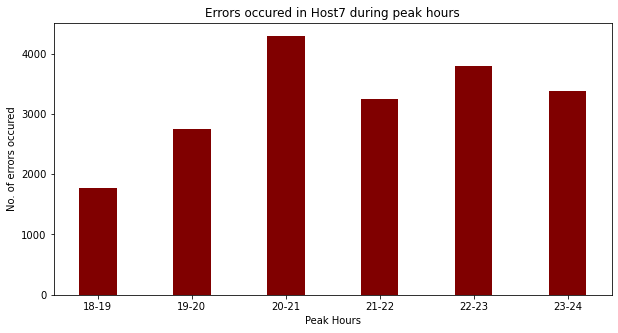

In [88]:
import matplotlib.pyplot as plt

data = {'18-19':1771, '19-20':2757, '20-21':4292, '21-22':3251, '22-23':3800, '23-24':3375}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Peak Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host7 during peak hours")
plt.show()

In [37]:
df_filecaching = df[df['host'] == 13]

In [38]:
df_filecaching.head()

,statuscode,contenttype,protocol,osfamily,cachecontrol,uamajor,uafamily,devicefamily,@timestamp,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,cachename
2,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T09:39:05.000Z,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
5,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T10:33:59.000Z,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
9,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T16:41:05.000Z,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
72,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T08:22:29.000Z,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0
201,404,application/octet-stream,HTTP/1.1,0.0,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T21:05:00.000Z,NaN,1.0,NaN,NaN,NaN,13.0,GET,NaN,0


In [39]:
df_filecaching=df_filecaching.drop(labels=["contentpackage","livechannel","assetnumber"],axis=1)

In [40]:
df_filecaching=df_filecaching.drop(labels=["protocol","osfamily","cachecontrol", "devicemodel", "devicebrand", "host"],axis=1)

In [41]:
df_filecaching.head()

,statuscode,contenttype,uamajor,uafamily,devicefamily,@timestamp,coordinates,method,cachename
2,404,application/octet-stream,14.0,21.0,0.0,2088-05-13T09:39:05.000Z,1.0,GET,0
5,404,application/octet-stream,14.0,21.0,0.0,2088-05-13T10:33:59.000Z,1.0,GET,0
9,404,application/octet-stream,14.0,21.0,0.0,2088-05-13T16:41:05.000Z,1.0,GET,0
72,404,application/octet-stream,14.0,21.0,0.0,2088-05-13T08:22:29.000Z,1.0,GET,0
201,404,application/octet-stream,14.0,21.0,0.0,2088-05-13T21:05:00.000Z,1.0,GET,0


In [42]:
df_filecaching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    11658 non-null  int64  
 1   contenttype   11658 non-null  object 
 2   uamajor       11644 non-null  float64
 3   uafamily      11658 non-null  float64
 4   devicefamily  11658 non-null  float64
 5   @timestamp    11658 non-null  object 
 6   coordinates   11658 non-null  float64
 7   method        11658 non-null  object 
 8   cachename     11658 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 910.8+ KB


In [43]:
df_filecaching=df_filecaching.drop(labels=["uamajor","devicefamily","coordinates", "cachename"],axis=1)

In [44]:
df_filecaching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   11658 non-null  int64  
 1   contenttype  11658 non-null  object 
 2   uafamily     11658 non-null  float64
 3   @timestamp   11658 non-null  object 
 4   method       11658 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 546.5+ KB


In [45]:
df_filecaching.drop_duplicates(subset=None, keep='first', inplace=True)

In [46]:
df_filecaching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8978 entries, 2 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   8978 non-null   int64  
 1   contenttype  8978 non-null   object 
 2   uafamily     8978 non-null   float64
 3   @timestamp   8978 non-null   object 
 4   method       8978 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 420.8+ KB


In [47]:
df_jiiiii = df_filecaching['@timestamp']  

In [48]:
from datetime import datetime
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
ph=[]
for i in df_jiiiii:
    date = datetime.strptime(i, format_data)
    ph.append(date.hour)

In [18]:
count1=0;
count2=0;
count3=0;
for i in ph:
    if(i>=18 and i<24):
        count1 = count1 + 1;
    elif(i>=24 or i<6):
        count2 = count2 + 1;
    else:
        count3 = count3 + 1;

In [19]:
count1

2249

In [20]:
count2

2587

In [21]:
count3

4142

In [105]:
count18=0;
count19=0;
count20=0;
count21=0;
count22=0;
count23=0;
for i in ph:
    if(i>=18 and i<24):
        if(i==18):
            count18 = count18 + 1;
        elif(i==19):
            count19 = count19 + 1;
        elif(i==20):
            count20 = count20 + 1;
        elif(i==21):
            count21 = count21 + 1;
        elif(i==22):
            count22 = count22 + 1;
        else:
            count23 = count23 + 1;
            continue;

In [106]:
count18

418

In [107]:
count19

412

In [108]:
count20

274

In [109]:
count21

392

In [110]:
count22

331

In [111]:
count23

422

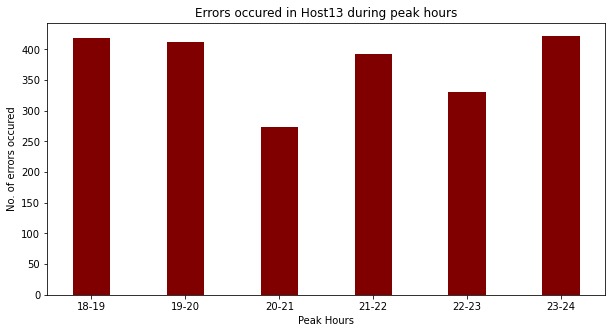

In [112]:
import matplotlib.pyplot as plt

data = {'18-19':418, '19-20':412, '20-21':274, '21-22':392, '22-23':331, '23-24':422}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Peak Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host13 during peak hours")
plt.show()

In [66]:
df_website = df[df['host'] == 3]

In [67]:
df_website=df_website.drop(labels=["contentpackage","livechannel","assetnumber"],axis=1)

In [68]:
df_website=df_website.drop(labels=["cachecontrol"],axis=1)

In [69]:
df_website=df_website.drop(labels=["protocol","host"],axis=1)

In [70]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    1660 non-null   int64  
 1   contenttype   1660 non-null   object 
 2   osfamily      1660 non-null   float64
 3   uamajor       1377 non-null   float64
 4   uafamily      1660 non-null   float64
 5   devicefamily  1660 non-null   float64
 6   @timestamp    1660 non-null   object 
 7   coordinates   1631 non-null   float64
 8   devicemodel   1477 non-null   float64
 9   devicebrand   1477 non-null   float64
 10  method        1660 non-null   object 
 11  cachename     1660 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 168.6+ KB


In [71]:
df_website=df_website.drop(labels=["osfamily","devicefamily","coordinates", "devicemodel", "devicebrand", "method", "cachename"],axis=1)

In [72]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1660 non-null   int64  
 1   contenttype  1660 non-null   object 
 2   uamajor      1377 non-null   float64
 3   uafamily     1660 non-null   float64
 4   @timestamp   1660 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 77.8+ KB


In [73]:
df_website.drop_duplicates(subset=None, keep='first', inplace=True)

In [74]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 76 to 286567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1160 non-null   int64  
 1   contenttype  1160 non-null   object 
 2   uamajor      1001 non-null   float64
 3   uafamily     1160 non-null   float64
 4   @timestamp   1160 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 54.4+ KB


In [75]:
df_jiiiiiiii = df_website['@timestamp']  

In [76]:
from datetime import datetime
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
lh=[]
for i in df_jiiiiiiii:
    date = datetime.strptime(i, format_data)
    lh.append(date.hour)

In [124]:
count1=0;
count2=0;
count3=0;
for i in lh:
    if(i>=18 and i<24):
        count1 = count1 + 1;
    elif(i>=24 or i<6):
        count2 = count2 + 1;
    else:
        count3 = count3 + 1;

In [125]:
count1

336

In [126]:
count2

57

In [127]:
count3

767

In [130]:
count18=0;
count19=0;
count20=0;
count21=0;
count22=0;
count23=0;
for i in lh:
    if(i>=18 and i<24):
        if(i==18):
            count18 = count18 + 1;
        elif(i==19):
            count19 = count19 + 1;
        elif(i==20):
            count20 = count20 + 1;
        elif(i==21):
            count21 = count21 + 1;
        elif(i==22):
            count22 = count22 + 1;
        else:
            count23 = count23 + 1;

In [131]:
count18

73

In [132]:
count19

58

In [133]:
count20

47

In [134]:
count21

64

In [135]:
count22

63

In [136]:
count23

31

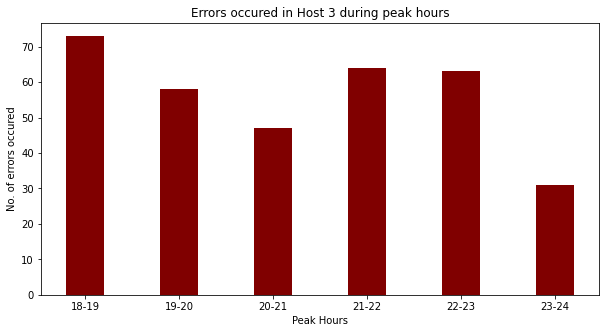

In [138]:
import matplotlib.pyplot as plt

data = {'18-19':73, '19-20':58, '20-21':47, '21-22':64, '22-23':63, '23-24':31}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Peak Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 3 during peak hours")
plt.show()

In [167]:
count01=0;
count02=0;
count03=0;
count04=0;
count05=0;
count06=0;
for i in lh:
    if(i>=24 or i<6):
        if(i==1):
            count01 = count01 + 1;
        elif(i==2):
            count02 = count02 + 1;
        elif(i==3):
            count03 = count03 + 1;
        elif(i==4):
            count04 = count04 + 1;
        elif(i==5):
            count05 = count05 + 1;
        else:
            count06 = count06 + 1;

In [168]:
count01

12

In [169]:
count02

11

In [142]:
count03

6

In [143]:
count04

9

In [144]:
count05

6

In [145]:
count06

13

In [146]:
count6=0;
count7=0;
count8=0;
count9=0;
count10=0;
count11=0;
count12=0;
count13=0;
count14=0;
count15=0;
count16=0;
count17=0;
for i in lh:
    if(i>=6 and i<18):
        if(i==6):
            count6 = count6 + 1;
        elif(i==7):
            count7 = count7 + 1;
        elif(i==8):
            count8 = count8 + 1;
        elif(i==9):
            count9 = count9 + 1;
        elif(i==10):
            count10 = count10 + 1;
        elif(i==11):
            count11 = count11 + 1;
        elif(i==12):
            count12 = count12 + 1;
        elif(i==13):
            count13 = count13 + 1;
        elif(i==14):
            count14 = count14 + 1;
        elif(i==15):
            count15 = count15 + 1;
        elif(i==16):
            count16 = count16 + 1;
        else:
            count17 = count17 + 1;

In [147]:
count6

30

In [148]:
count7

33

In [149]:
count8

54

In [150]:
count9

72

In [151]:
count10

52

In [152]:
count11

71

In [153]:
count12

72

In [154]:
count13

86

In [155]:
count14

72

In [156]:
count15

65

In [157]:
count16

79

In [158]:
count17

81

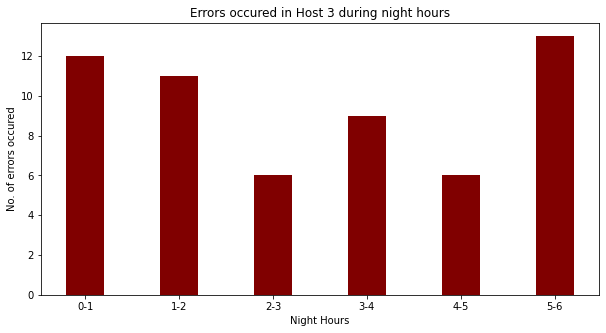

In [159]:
import matplotlib.pyplot as plt

data = {'0-1':12, '1-2':11, '2-3':6, '3-4':9, '4-5':6, '5-6':13}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Night Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 3 during night hours")
plt.show()

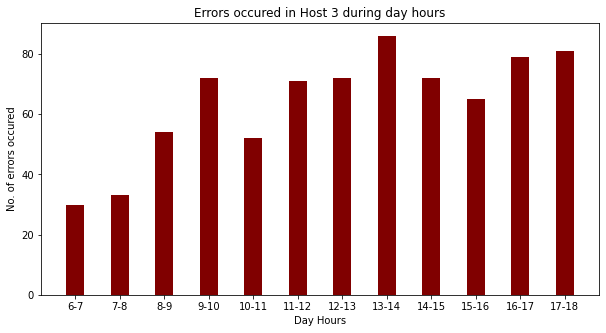

In [160]:
import matplotlib.pyplot as plt

data = {'6-7':30, '7-8':33, '8-9':54, '9-10':72, '10-11':52, '11-12':71, '12-13':72, '13-14':86, '14-15':72, '15-16':65, '16-17':79, '17-18':81}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Day Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 3 during day hours")
plt.show()

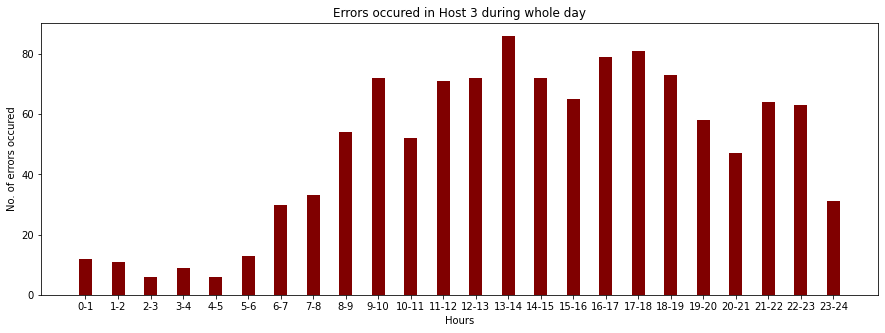

In [115]:
import matplotlib.pyplot as plt

data = {'0-1':12, '1-2':11, '2-3':6, '3-4':9, '4-5':6, '5-6':13,'6-7':30, '7-8':33, '8-9':54, '9-10':72, '10-11':52, '11-12':71, '12-13':72, '13-14':86, '14-15':72, '15-16':65, '16-17':79, '17-18':81, '18-19':73, '19-20':58, '20-21':47, '21-22':64, '22-23':63, '23-24':31}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 3 during whole day")
plt.savefig('errorshost3.png', bbox_inches='tight')
plt.show()

In [171]:
count01=0;
count02=0;
count03=0;
count04=0;
count05=0;
count06=0;
for i in ph:
    if(i>=24 or i<6):
        if(i==1):
            count01 = count01 + 1;
        elif(i==2):
            count02 = count02 + 1;
        elif(i==3):
            count03 = count03 + 1;
        elif(i==4):
            count04 = count04 + 1;
        elif(i==5):
            count05 = count05 + 1;
        else:
            count06 = count06 + 1;

In [172]:
count01

370

In [173]:
count02

466

In [174]:
count03

554

In [175]:
count04

482

In [176]:
count05

382

In [177]:
count06

333

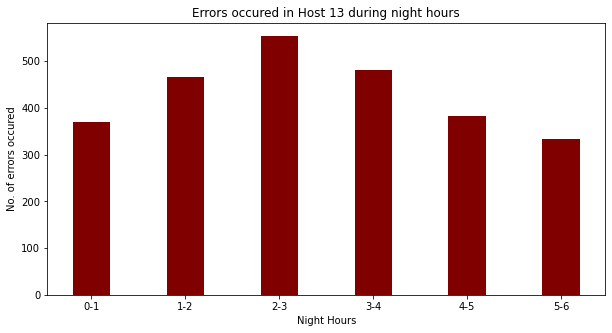

In [178]:
import matplotlib.pyplot as plt

data = {'0-1':370, '1-2':466, '2-3':554, '3-4':482, '4-5':382, '5-6':333}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Night Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 13 during night hours")
plt.show()

In [179]:
count6=0;
count7=0;
count8=0;
count9=0;
count10=0;
count11=0;
count12=0;
count13=0;
count14=0;
count15=0;
count16=0;
count17=0;
for i in ph:
    if(i>=6 and i<18):
        if(i==6):
            count6 = count6 + 1;
        elif(i==7):
            count7 = count7 + 1;
        elif(i==8):
            count8 = count8 + 1;
        elif(i==9):
            count9 = count9 + 1;
        elif(i==10):
            count10 = count10 + 1;
        elif(i==11):
            count11 = count11 + 1;
        elif(i==12):
            count12 = count12 + 1;
        elif(i==13):
            count13 = count13 + 1;
        elif(i==14):
            count14 = count14 + 1;
        elif(i==15):
            count15 = count15 + 1;
        elif(i==16):
            count16 = count16 + 1;
        else:
            count17 = count17 + 1;

In [180]:
count6

284

In [181]:
count7

368

In [182]:
count8

334

In [183]:
count9

302

In [184]:
count10

327

In [185]:
count11

469

In [186]:
count12

338

In [187]:
count13

329

In [188]:
count14

364

In [189]:
count15

336

In [190]:
count16

375

In [191]:
count17

316

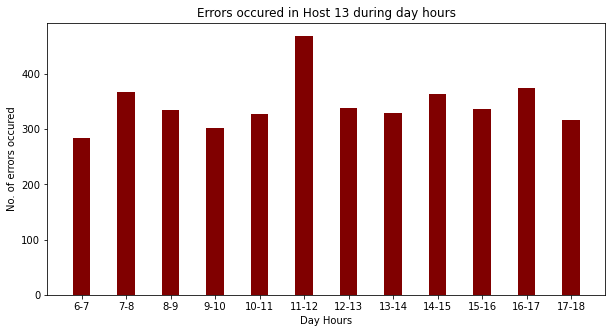

In [192]:
import matplotlib.pyplot as plt

data = {'6-7':284, '7-8':368, '8-9':334, '9-10':302, '10-11':327, '11-12':469, '12-13':338, '13-14':329, '14-15':364, '15-16':336, '16-17':375, '17-18':316}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Day Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 13 during day hours")
plt.show()

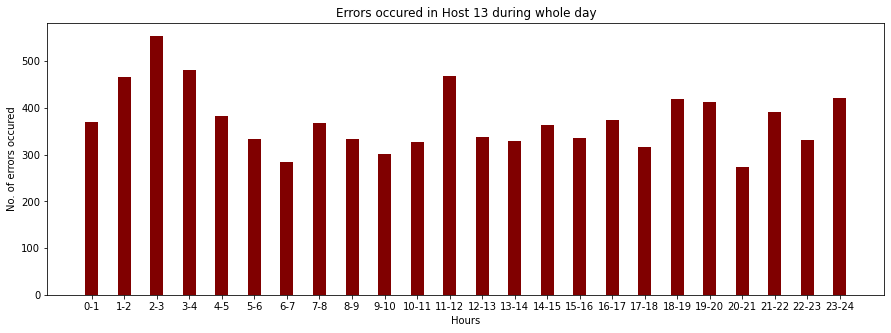

In [116]:
import matplotlib.pyplot as plt

data = {'0-1':370, '1-2':466, '2-3':554, '3-4':482, '4-5':382, '5-6':333,'6-7':284, '7-8':368, '8-9':334, '9-10':302, '10-11':327, '11-12':469, '12-13':338, '13-14':329, '14-15':364, '15-16':336, '16-17':375, '17-18':316, '18-19':418, '19-20':412, '20-21':274, '21-22':392, '22-23':331, '23-24':422}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 13 during whole day")
plt.savefig('errorshost13.png', bbox_inches='tight')
plt.show()

In [195]:
count01=0;
count02=0;
count03=0;
count04=0;
count05=0;
count06=0;
for i in gh:
    if(i>=24 or i<6):
        if(i==1):
            count01 = count01 + 1;
        elif(i==2):
            count02 = count02 + 1;
        elif(i==3):
            count03 = count03 + 1;
        elif(i==4):
            count04 = count04 + 1;
        elif(i==5):
            count05 = count05 + 1;
        else:
            count06 = count06 + 1;

In [196]:
count01

879

In [197]:
count02

393

In [198]:
count03

760

In [199]:
count04

806

In [200]:
count05

611

In [201]:
count06

1859

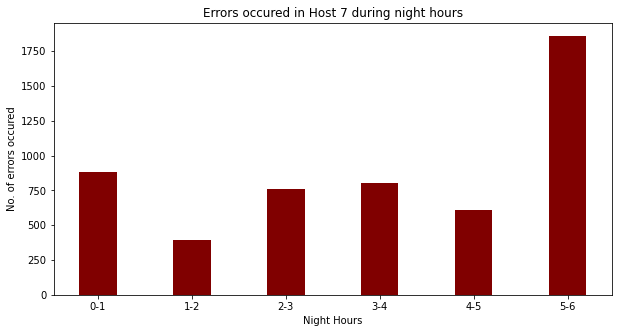

In [203]:
import matplotlib.pyplot as plt

data = {'0-1':879, '1-2':393, '2-3':760, '3-4':806, '4-5':611, '5-6':1859}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Night Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 7 during night hours")
plt.show()

In [204]:
count6=0;
count7=0;
count8=0;
count9=0;
count10=0;
count11=0;
count12=0;
count13=0;
count14=0;
count15=0;
count16=0;
count17=0;
for i in gh:
    if(i>=6 and i<18):
        if(i==6):
            count6 = count6 + 1;
        elif(i==7):
            count7 = count7 + 1;
        elif(i==8):
            count8 = count8 + 1;
        elif(i==9):
            count9 = count9 + 1;
        elif(i==10):
            count10 = count10 + 1;
        elif(i==11):
            count11 = count11 + 1;
        elif(i==12):
            count12 = count12 + 1;
        elif(i==13):
            count13 = count13 + 1;
        elif(i==14):
            count14 = count14 + 1;
        elif(i==15):
            count15 = count15 + 1;
        elif(i==16):
            count16 = count16 + 1;
        else:
            count17 = count17 + 1;

In [205]:
count6

358

In [206]:
count7

691

In [207]:
count8

1059

In [208]:
count9

1230

In [209]:
count10

1511

In [210]:
count11

962

In [211]:
count12

808

In [212]:
count13

1157

In [213]:
count14

1430

In [214]:
count15

1757

In [215]:
count16

2000

In [216]:
count17

1934

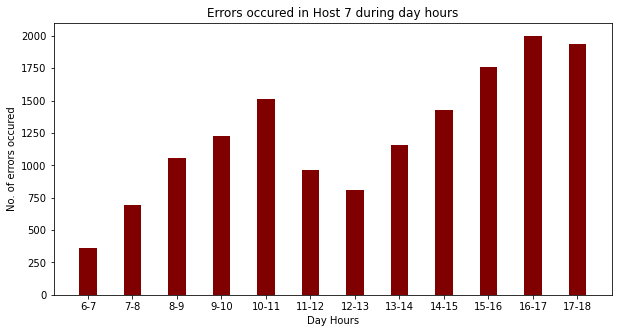

In [218]:
import matplotlib.pyplot as plt

data = {'6-7':358, '7-8':691, '8-9':1059, '9-10':1230, '10-11':1511, '11-12':962, '12-13':808, '13-14':1157, '14-15':1430, '15-16':1757, '16-17':2000, '17-18':1934}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Day Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 7 during day hours")
plt.show()

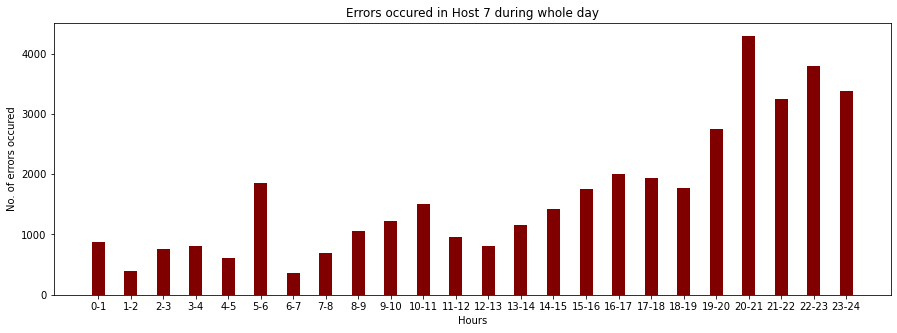

In [117]:
import matplotlib.pyplot as plt

data = {'0-1':879, '1-2':393, '2-3':760, '3-4':806, '4-5':611, '5-6':1859,'6-7':358, '7-8':691, '8-9':1059, '9-10':1230, '10-11':1511, '11-12':962, '12-13':808, '13-14':1157, '14-15':1430, '15-16':1757, '16-17':2000, '17-18':1934, '18-19':1771, '19-20':2757, '20-21':4292, '21-22':3251, '22-23':3800, '23-24':3375}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Hours")
plt.ylabel("No. of errors occured")
plt.title("Errors occured in Host 7 during whole day")
plt.savefig('errorshost7.png', bbox_inches='tight')
plt.show()

In [220]:
df_pop = df_livetv['statuscode']

In [221]:
bh=[]
for i in df_pop:
    bh.append(i)

In [222]:
bh

[400,
 400,
 400,
 400,
 412,
 400,
 404,
 412,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 412,
 412,
 400,
 400,
 412,
 412,
 412,
 400,
 400,
 412,
 400,
 400,
 400,
 412,
 400,
 404,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 412,
 400,
 400,
 412,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 412,
 412,
 412,
 412,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 412,
 400,
 412,
 412,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 400,
 400,
 400,
 412,
 412,
 412,
 400,
 400,
 412,
 404,
 400,
 400,
 400,
 400,
 412,
 412,
 412,
 400,
 412,
 400,
 400,
 400,
 412,
 412,
 400,
 400,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 400,
 412,
 400,
 400,
 400,
 412,
 400

In [223]:
lop=[];
for i in bh:
    if(i==400):
        lop.append(gh[i])

In [227]:

# Program to find most frequent
# element in a list
 
def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num
 


In [228]:
print(most_frequent(lop))

19


In [231]:
cop=[];
for i in bh:
    if(i==403):
        cop.append(gh[i])

In [232]:
vop=[];
for i in bh:
    if(i==404):
        vop.append(gh[i])

In [233]:
bop=[];
for i in bh:
    if(i==412):
        bop.append(gh[i])

In [234]:
uop=[];
for i in bh:
    if(i==503):
        uop.append(gh[i])

In [235]:
print(most_frequent(cop))

21


In [236]:
print(most_frequent(vop))

14


In [237]:
print(most_frequent(bop))

19


In [238]:
print(most_frequent(uop))

15


In [239]:
df_pol = df_filecaching['statuscode']

In [240]:
gpj=[]
for i in df_pol:
    gpj.append(i)

In [241]:
gpj

[404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404,
 404

In [242]:
mun=[];
for i in gpj:
    if(i==401):
        mun.append(ph[i])

In [243]:
nun=[];
for i in gpj:
    if(i==403):
        nun.append(ph[i])

In [244]:
sun=[];
for i in gpj:
    if(i==404):
        sun.append(ph[i])

In [245]:
dun=[];
for i in gpj:
    if(i==405):
        dun.append(ph[i])

In [246]:
print(most_frequent(mun))

16


In [247]:
print(most_frequent(nun))

15


In [248]:
print(most_frequent(sun))

19


In [249]:
print(most_frequent(dun))

15


In [250]:
df_kkkk = df_website['statuscode']

In [251]:
jjjjj=[]
for i in df_kkkk:
    jjjjj.append(i)

In [252]:
jjjjj

[403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 405,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 405,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 405,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 405,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403,
 403

In [253]:
mmmm=[];
for i in jjjjj:
    if(i==403):
        mmmm.append(lh[i])

In [254]:
nnnn=[];
for i in jjjjj:
    if(i==405):
        nnnn.append(lh[i])

In [255]:
print(most_frequent(mmmm))

21


In [256]:
print(most_frequent(nnnn))

22


In [257]:
timeclass = [];
for i in gh:
    if(i>=18 and i<24):
        timeclass.append(1);
    elif(i>=24 or i<6):
        timeclass.append(2);
    else:
        timeclass.append(3);

In [258]:
timeclass

[3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [259]:
df_livetv['timeclass'] = timeclass

In [20]:
df_livetv['hour'] = gh

In [165]:
df_livetv['minute'] = ml

In [21]:
df_livetv.head()

,statuscode,contenttype,uafamily,@timestamp,livechannel,hour
70,400,text/html; charset=utf-8,12.0,2088-05-13T07:18:16.000Z,NaN,7
73,400,text/html; charset=utf-8,12.0,2088-05-13T07:25:04.000Z,NaN,7
74,400,text/html; charset=utf-8,12.0,2088-05-13T07:54:31.000Z,NaN,7
75,400,text/html; charset=utf-8,12.0,2088-05-13T08:27:31.000Z,NaN,8
79,412,text/html,12.0,2088-05-13T16:42:10.000Z,60.0,16


In [22]:
df_livetv_1 = df_livetv.copy()

In [23]:
df_livetv_1.head()

,statuscode,contenttype,uafamily,@timestamp,livechannel,hour
70,400,text/html; charset=utf-8,12.0,2088-05-13T07:18:16.000Z,NaN,7
73,400,text/html; charset=utf-8,12.0,2088-05-13T07:25:04.000Z,NaN,7
74,400,text/html; charset=utf-8,12.0,2088-05-13T07:54:31.000Z,NaN,7
75,400,text/html; charset=utf-8,12.0,2088-05-13T08:27:31.000Z,NaN,8
79,412,text/html,12.0,2088-05-13T16:42:10.000Z,60.0,16


In [24]:
df_livetv_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39451 entries, 70 to 286973
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   39451 non-null  int64  
 1   contenttype  39189 non-null  object 
 2   uafamily     36477 non-null  float64
 3   @timestamp   39451 non-null  object 
 4   livechannel  13419 non-null  float64
 5   hour         39451 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.1+ MB


In [25]:
df_livetv_1=df_livetv_1.drop(labels=["@timestamp"],axis=1)

In [26]:
df_livetv_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39451 entries, 70 to 286973
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   39451 non-null  int64  
 1   contenttype  39189 non-null  object 
 2   uafamily     36477 non-null  float64
 3   livechannel  13419 non-null  float64
 4   hour         39451 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ MB


In [27]:
df_livetv_1['uafamily']=df_livetv_1['uafamily'].fillna(df_livetv_1['uafamily'].mode()[0])
df_livetv_1['contenttype']=df_livetv_1['contenttype'].fillna(df_livetv_1['contenttype'].mode()[0])
df_livetv_1['livechannel']=df_livetv_1['livechannel'].fillna(df_livetv_1['livechannel'].mode()[0])

In [28]:
df_livetv_1.nunique()

statuscode      5
contenttype     2
uafamily        4
livechannel     7
hour           24
dtype: int64

In [29]:
df_livetv_1.drop_duplicates(subset=None, keep='first', inplace=True)

In [30]:
df_livetv_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 70 to 283104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   105 non-null    int64  
 1   contenttype  105 non-null    object 
 2   uafamily     105 non-null    float64
 3   livechannel  105 non-null    float64
 4   hour         105 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.9+ KB


In [31]:
n = df_livetv_1.copy()

In [32]:
n_1 = pd.get_dummies(n, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel', 'hour'])
print(n_1)

        statuscode_400  statuscode_403  statuscode_404  statuscode_412  \
70                   1               0               0               0   
75                   1               0               0               0   
79                   0               0               0               1   
82                   1               0               0               0   
85                   0               0               1               0   
...                ...             ...             ...             ...   
248648               0               0               1               0   
250429               0               0               0               0   
277570               0               0               1               0   
281453               0               0               1               0   
283104               0               0               1               0   

        statuscode_503  contenttype_text/html  \
70                   0                      0   
75           

For 2 clusters the average silhouette_score is : 0.23747963981348202
For 3 clusters the average silhouette_score is : 0.3139034489292564
For 4 clusters the average silhouette_score is : 0.2661142907946412
For 5 clusters the average silhouette_score is : 0.22814338407619705


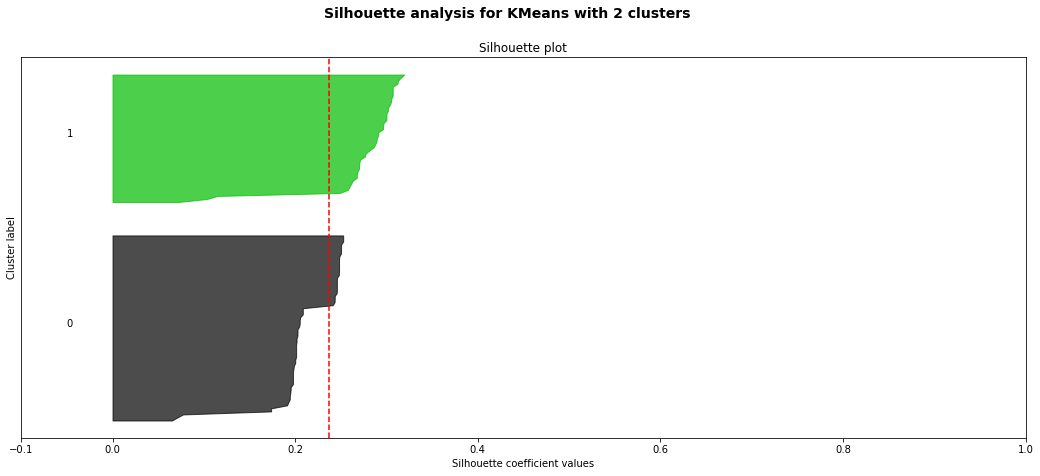

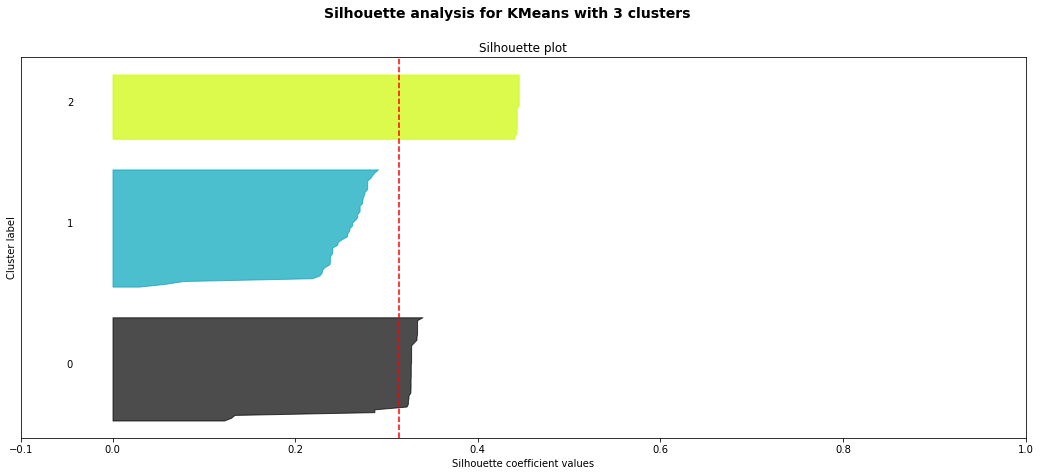

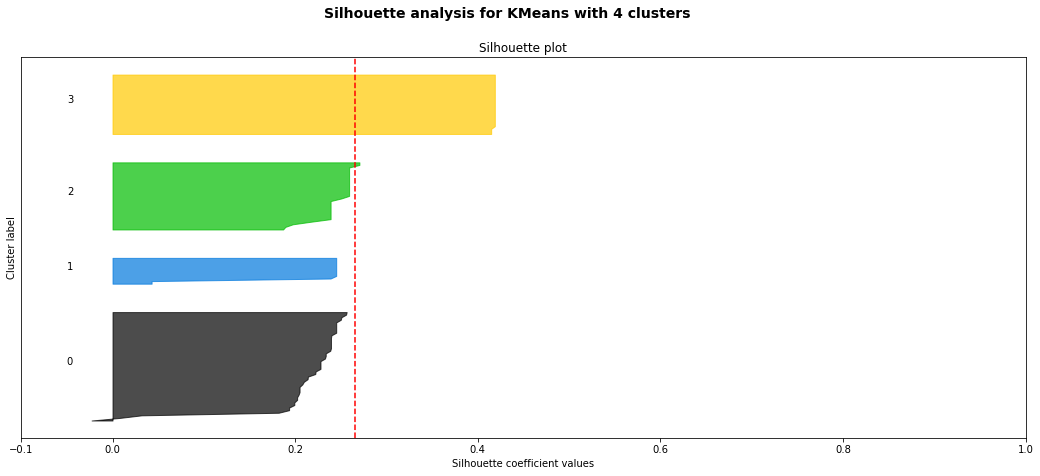

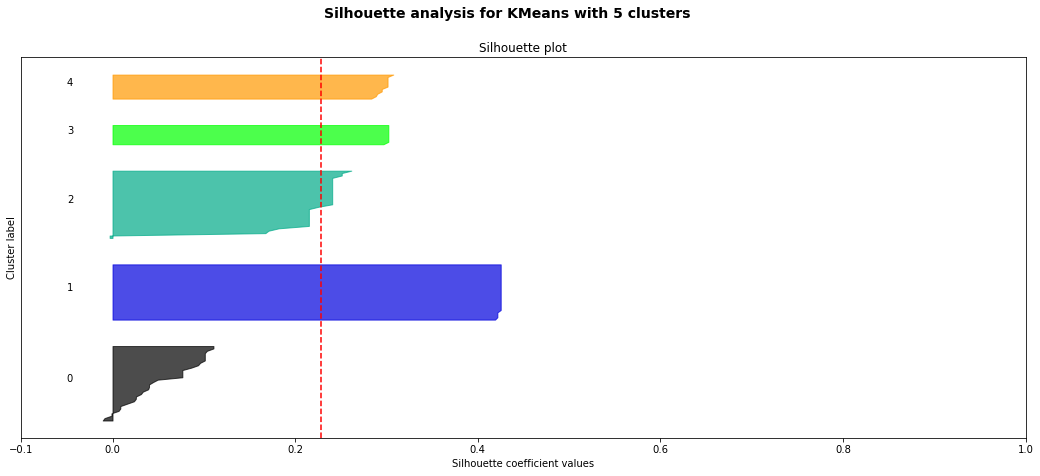

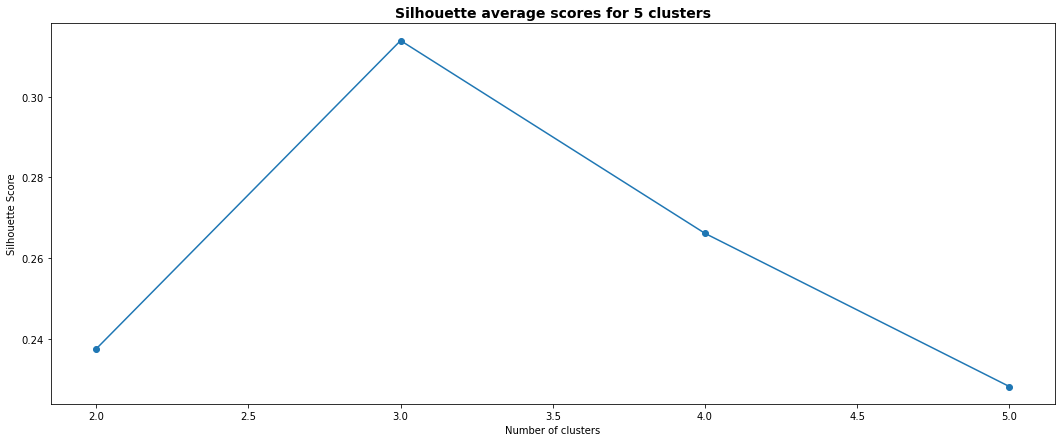

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(n_1)

    labels_pred = kmeans.predict(n_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(n_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(n_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.savefig('silhouttekmeanshost7.png', bbox_inches='tight')
plt.show()


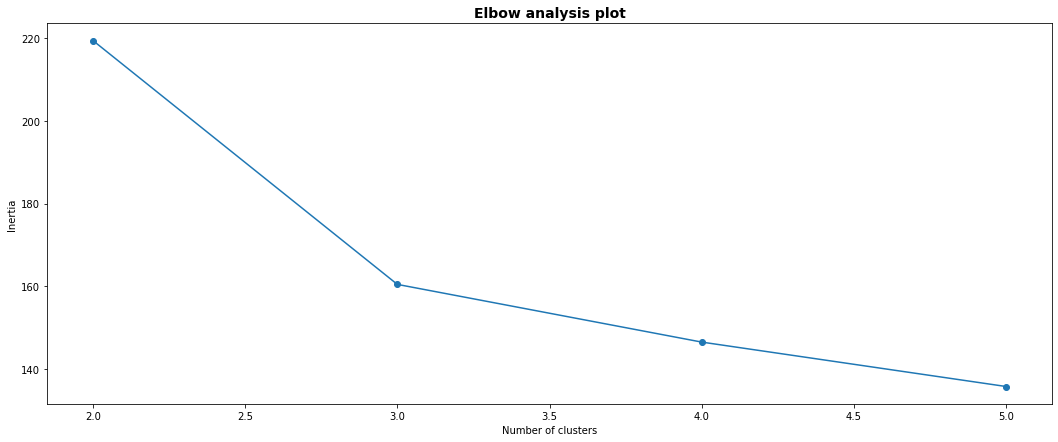

In [35]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.savefig('elbowkmeanshost7.png', bbox_inches='tight')
plt.show()

In [36]:
from kmodes.kmodes import KModes

In [37]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(n_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 366.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 278.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 182.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 171.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 150.0


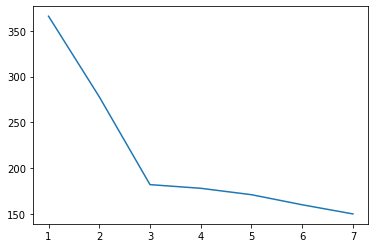

In [38]:
y = np.array([i for i in range(1,8,1)])
plt.savefig('elbowkmodeshost7.png', bbox_inches='tight')
plt.plot(y,cost)

In [35]:
from sklearn.cluster import KMeans
from sklearn import metrics
for i in range(2, 7):
    result = KMeans(n_clusters=i, random_state=100).fit(n_1)
    labels = result.labels_
    print(metrics.calinski_harabasz_score(n_1, labels))

34.99568636915715
42.396710094064254
33.84872036723784
29.09425882982317
26.282635863101287


In [36]:
from sklearn.metrics import davies_bouldin_score
for i in range(2, 7):
    result = KMeans(n_clusters=i, random_state=100).fit(n_1)
    labels = result.labels_
    print(davies_bouldin_score(n_1, labels))

1.6574809067094314
1.3365607436539655
1.4145054101127437
1.5796981831705494
1.5162258144255487


In [39]:
kmeans = KMeans(n_clusters=3, random_state=100)
cluster_labels = kmeans.fit_predict(n_1)
n['Clusterkmeans'] = cluster_labels

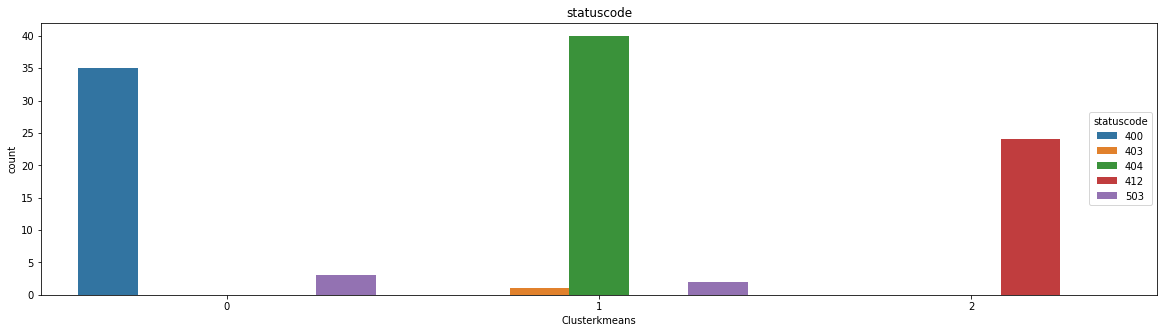

In [40]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="statuscode", data = n)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('statuscodekmeanshost7.png', bbox_inches='tight')
plt.show()

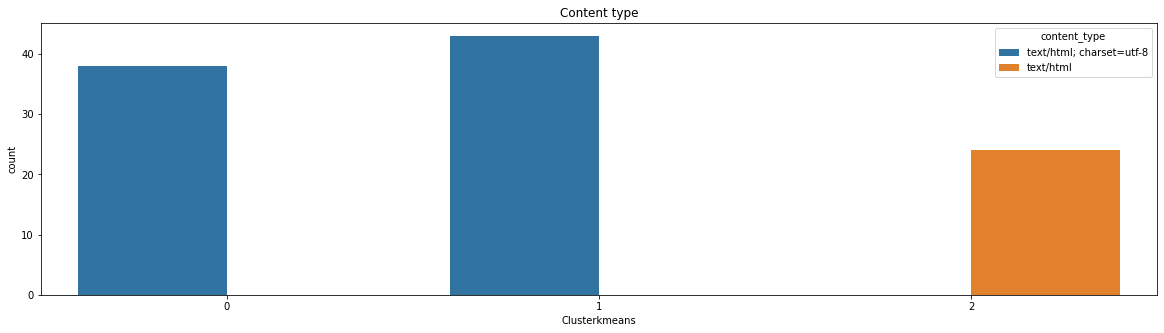

In [41]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="contenttype", data = n)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.savefig('contenttypekmeanshost7.png', bbox_inches='tight')
plt.show()

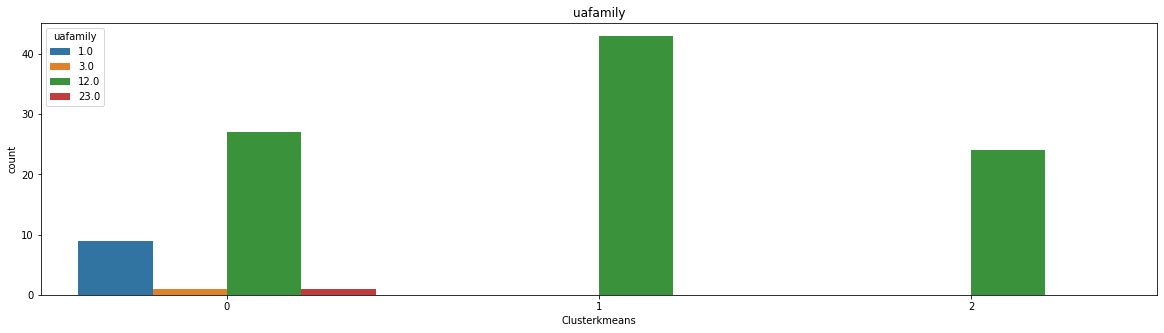

In [42]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="uafamily", data = n)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.savefig('uafamilykmeanshost7.png', bbox_inches='tight')
plt.show()

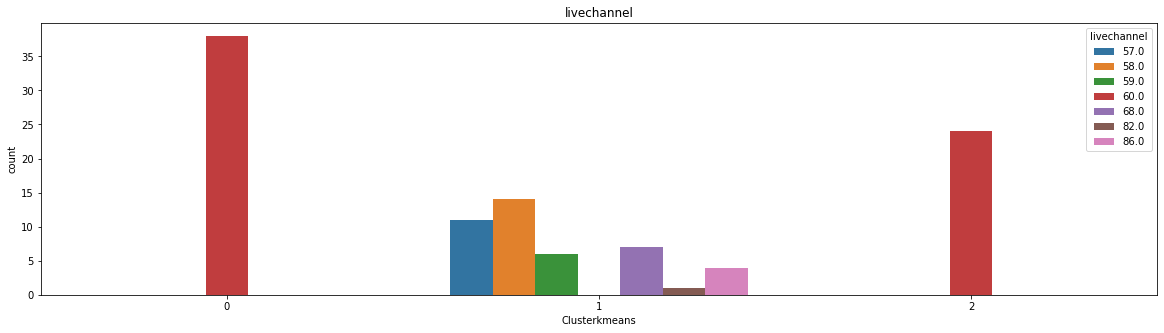

In [43]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="livechannel", data = n)
ax.set_title('livechannel')
ax.legend(loc='best', title="livechannel")
plt.savefig('livechannelkmeanshost7.png', bbox_inches='tight')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 142.0


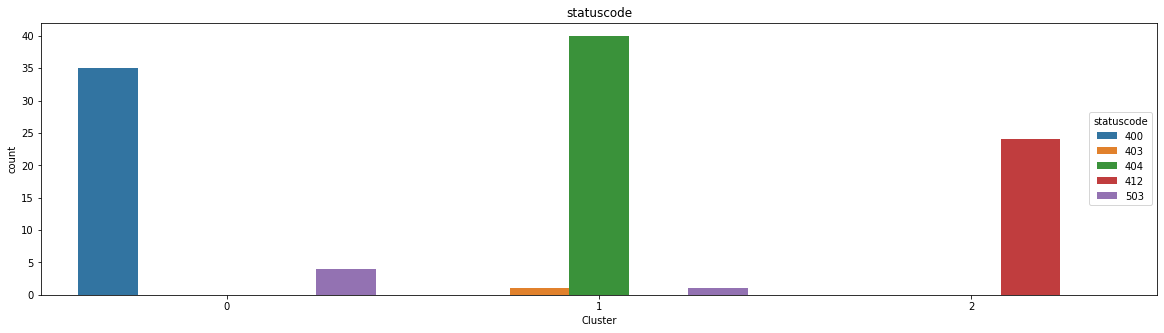

In [44]:
km = KModes(n_clusters=3, init = "Cao", verbose=1)
cluster_labels = km.fit_predict(n)
n['Cluster'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = n)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('statuscodekmodeshost7.png', bbox_inches='tight')
plt.show()

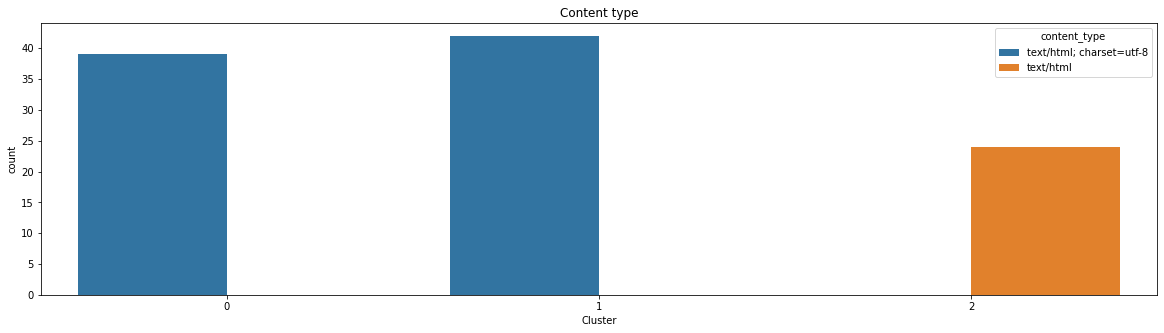

In [45]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = n)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.savefig('contenttypekmodeshost7.png', bbox_inches='tight')
plt.show()

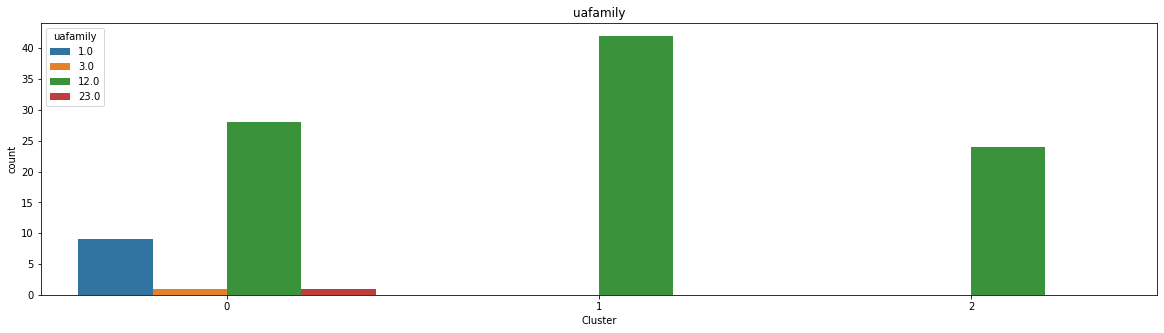

In [46]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = n)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.savefig('uafamilykmodeshost7.png', bbox_inches='tight')
plt.show()

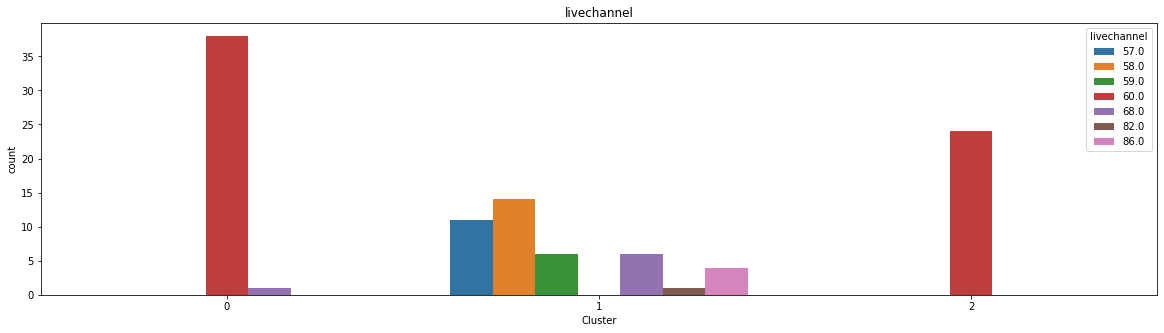

In [47]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="livechannel", data = n)
ax.set_title('livechannel')
ax.legend(loc='best', title="livechannel")
plt.savefig('livechannelkmodeshost7.png', bbox_inches='tight')
plt.show()

In [289]:
df_livetv_2 = df_livetv[df_livetv['timeclass'] == 2]

In [291]:
df_livetv_2.head()

,statuscode,contenttype,uafamily,@timestamp,livechannel,timeclass,hour
309,400,text/html; charset=utf-8,12.0,2088-05-14T00:02:01.000Z,60.0,2,0
310,400,text/html; charset=utf-8,12.0,2088-05-14T00:54:03.000Z,60.0,2,0
460,400,text/html; charset=utf-8,12.0,2088-05-14T03:51:30.000Z,60.0,2,3
615,400,text/html; charset=utf-8,12.0,2088-05-14T00:41:35.000Z,60.0,2,0
619,400,text/html; charset=utf-8,12.0,2088-05-14T00:59:21.000Z,60.0,2,0


In [292]:
df_livetv_2=df_livetv_2.drop(labels=["timeclass","@timestamp"],axis=1)

In [293]:
df_livetv_2.drop_duplicates(subset=None, keep='first', inplace=True)

In [294]:
df_livetv_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 309 to 245482
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   21 non-null     int64  
 1   contenttype  21 non-null     object 
 2   uafamily     21 non-null     float64
 3   livechannel  21 non-null     float64
 4   hour         21 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1008.0+ bytes


In [295]:
n2 = df_livetv_2.copy()

In [296]:
n_2 = pd.get_dummies(n2, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel', 'hour'])
print(n_2)

        statuscode_400  statuscode_404  statuscode_412  contenttype_text/html  \
309                  1               0               0                      0   
460                  1               0               0                      0   
955                  1               0               0                      0   
1097                 1               0               0                      0   
1148                 0               0               1                      1   
1158                 0               0               1                      1   
1190                 0               0               1                      1   
1197                 0               0               1                      1   
1198                 0               1               0                      0   
2744                 1               0               0                      0   
2895                 1               0               0                      0   
5619                 0      

For 2 clusters the average silhouette_score is : 0.271543816743158
For 3 clusters the average silhouette_score is : 0.35772064720333707
For 4 clusters the average silhouette_score is : 0.3077751554272333
For 5 clusters the average silhouette_score is : 0.2732906567521297


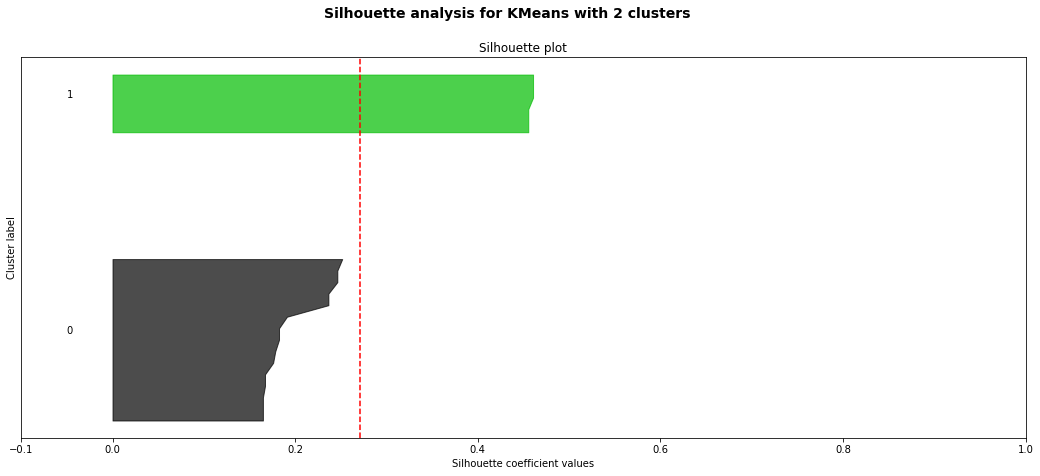

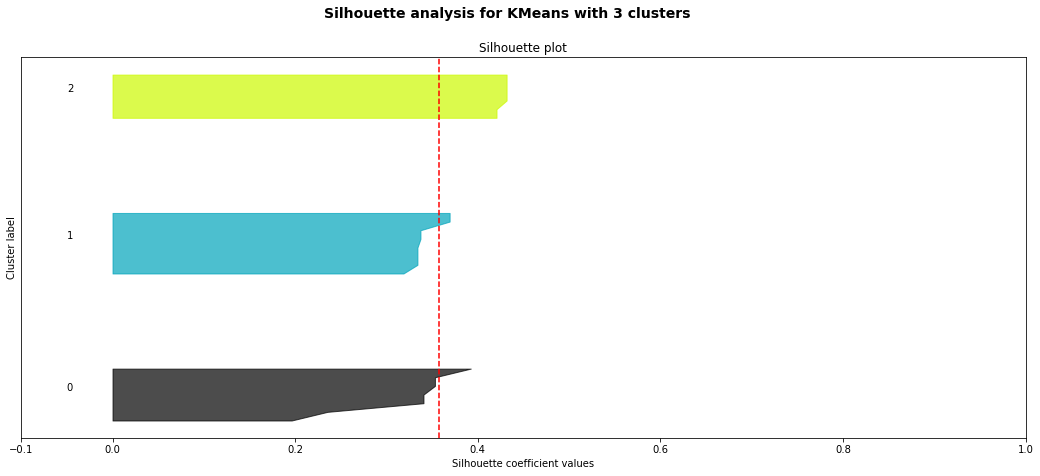

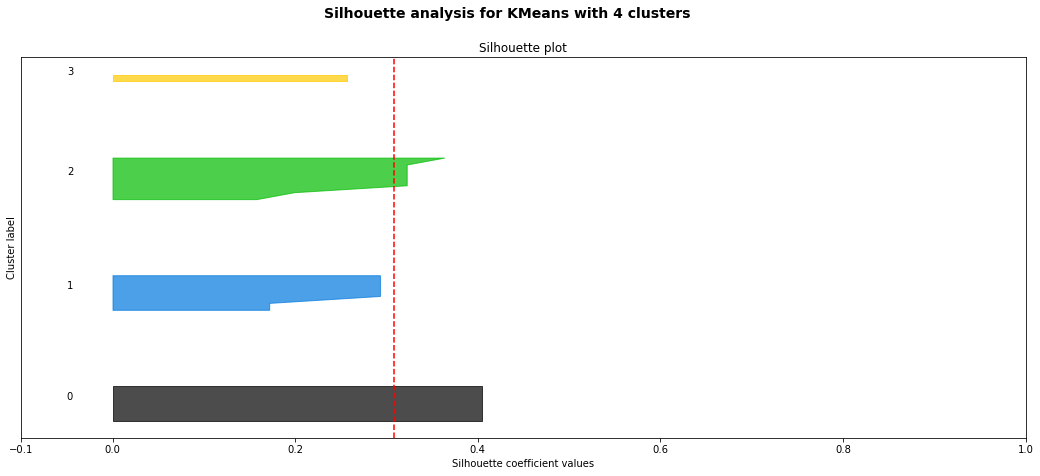

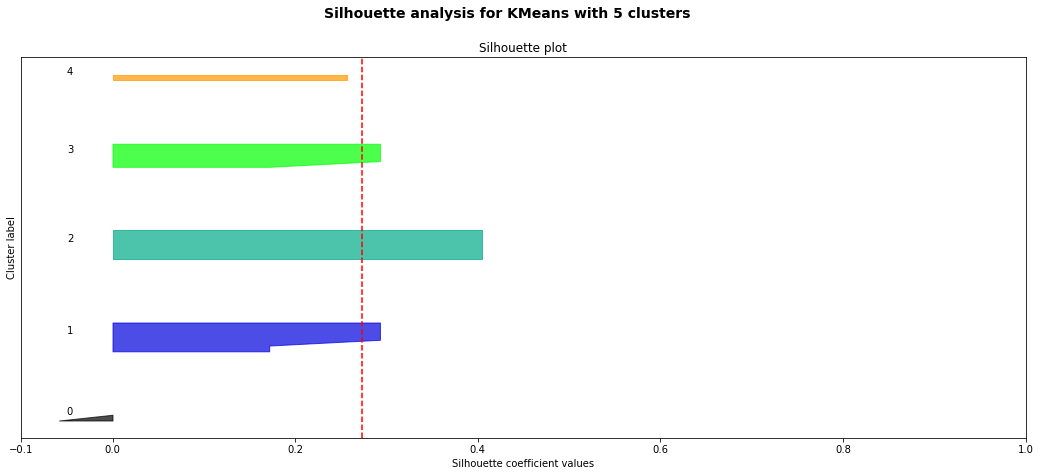

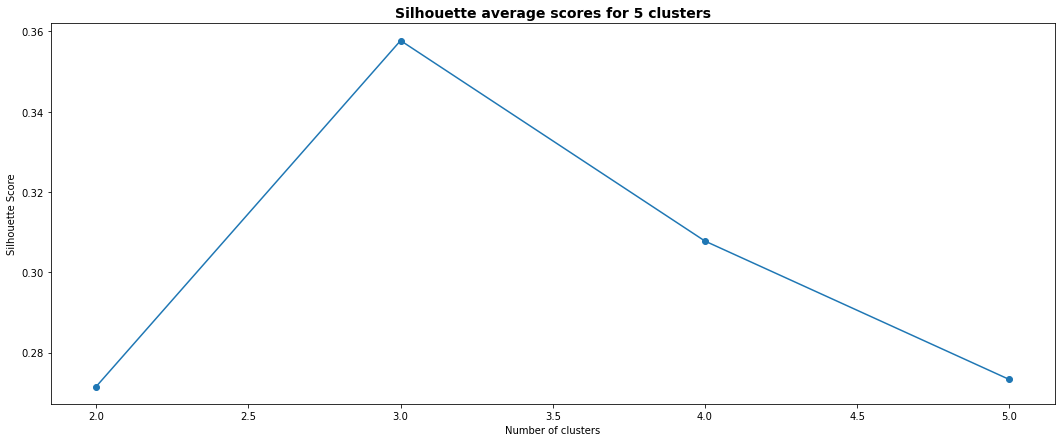

In [297]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(n_2)

    labels_pred = kmeans.predict(n_2)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(n_2, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(n_2, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

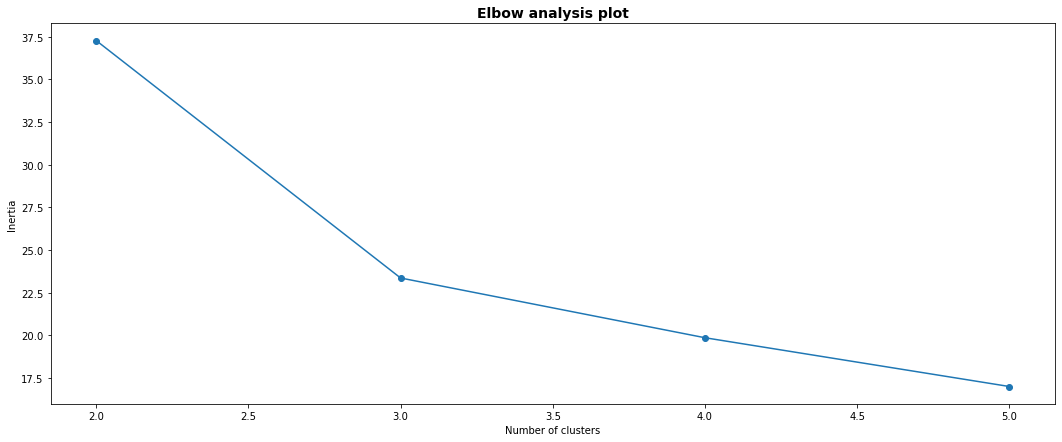

In [298]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [299]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(n_2)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 72.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 53.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 23.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 19.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 18.0


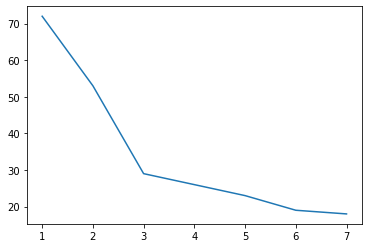

In [300]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [301]:
df_livetv_3 = df_livetv[df_livetv['timeclass'] == 3]

In [302]:
df_livetv_3.head()

,statuscode,contenttype,uafamily,@timestamp,livechannel,timeclass,hour
70,400,text/html; charset=utf-8,12.0,2088-05-13T07:18:16.000Z,60.0,3,7
73,400,text/html; charset=utf-8,12.0,2088-05-13T07:25:04.000Z,60.0,3,7
74,400,text/html; charset=utf-8,12.0,2088-05-13T07:54:31.000Z,60.0,3,7
75,400,text/html; charset=utf-8,12.0,2088-05-13T08:27:31.000Z,60.0,3,8
79,412,text/html,12.0,2088-05-13T16:42:10.000Z,60.0,3,16


In [303]:
df_livetv_3=df_livetv_3.drop(labels=["timeclass","@timestamp"],axis=1)

In [304]:
df_livetv_3.drop_duplicates(subset=None, keep='first', inplace=True)

In [305]:
df_livetv_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 70 to 283104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   48 non-null     int64  
 1   contenttype  48 non-null     object 
 2   uafamily     48 non-null     float64
 3   livechannel  48 non-null     float64
 4   hour         48 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.2+ KB


In [306]:
n3 = df_livetv_3.copy()

In [307]:
n_3 = pd.get_dummies(n3, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel', 'hour'])
print(n_3)

        statuscode_400  statuscode_404  statuscode_412  statuscode_503  \
70                   1               0               0               0   
75                   1               0               0               0   
79                   0               0               1               0   
82                   1               0               0               0   
577                  1               0               0               0   
578                  1               0               0               0   
588                  1               0               0               0   
589                  0               0               1               0   
598                  1               0               0               0   
722                  1               0               0               0   
725                  1               0               0               0   
739                  0               0               1               0   
740                  1               0

For 2 clusters the average silhouette_score is : 0.2503344784205852
For 3 clusters the average silhouette_score is : 0.323149869365246
For 4 clusters the average silhouette_score is : 0.26202192347518055
For 5 clusters the average silhouette_score is : 0.23456253518456852


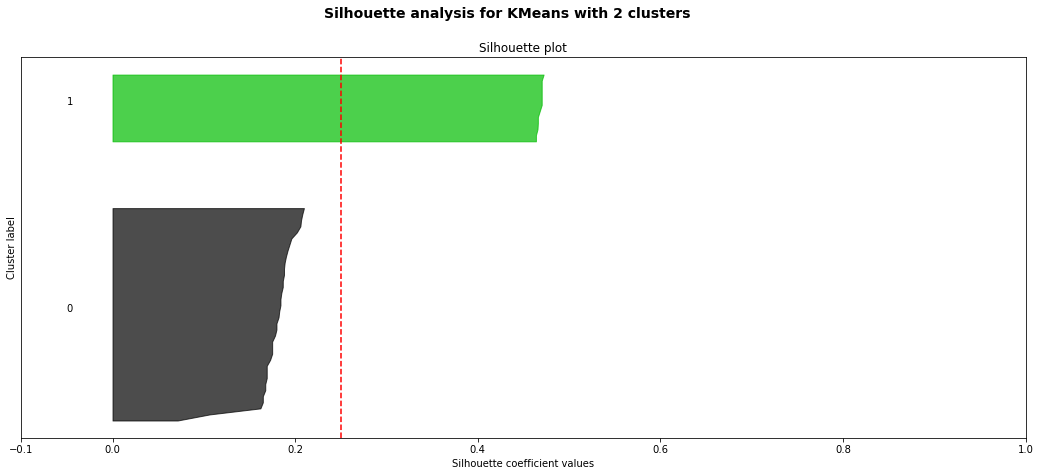

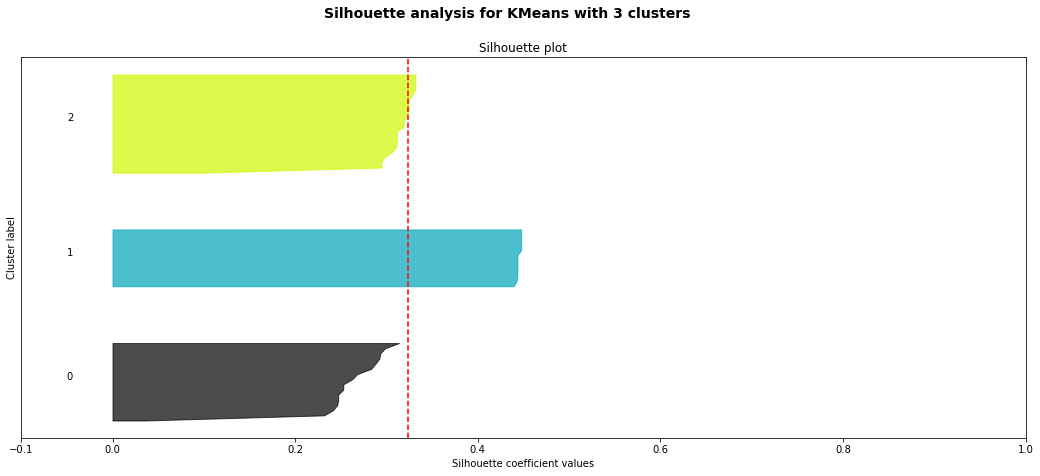

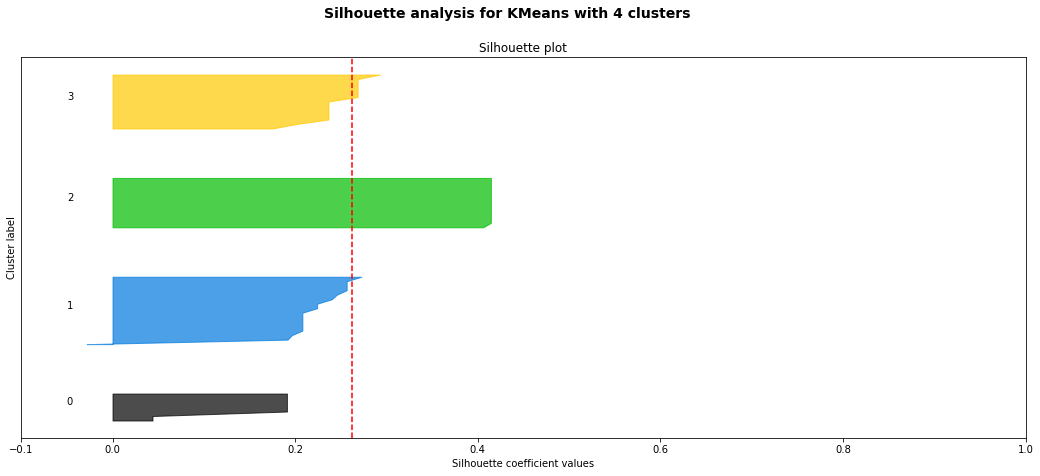

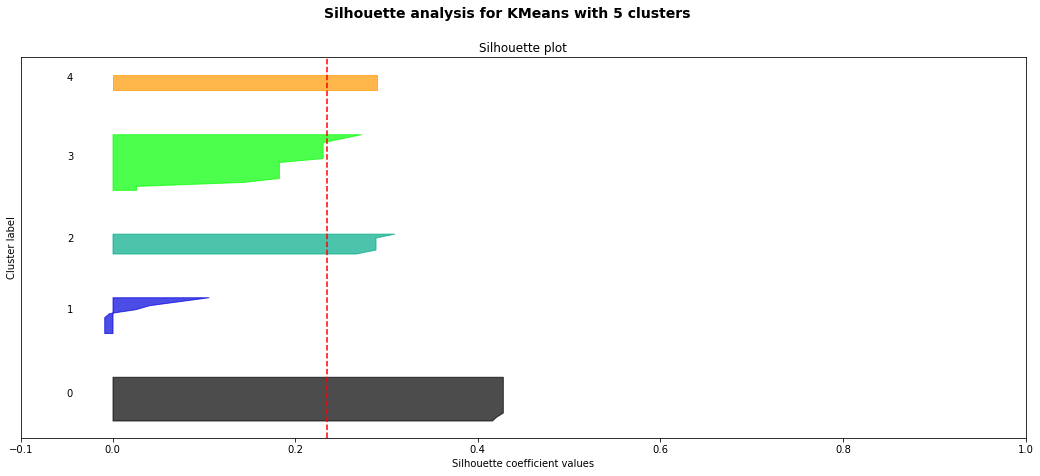

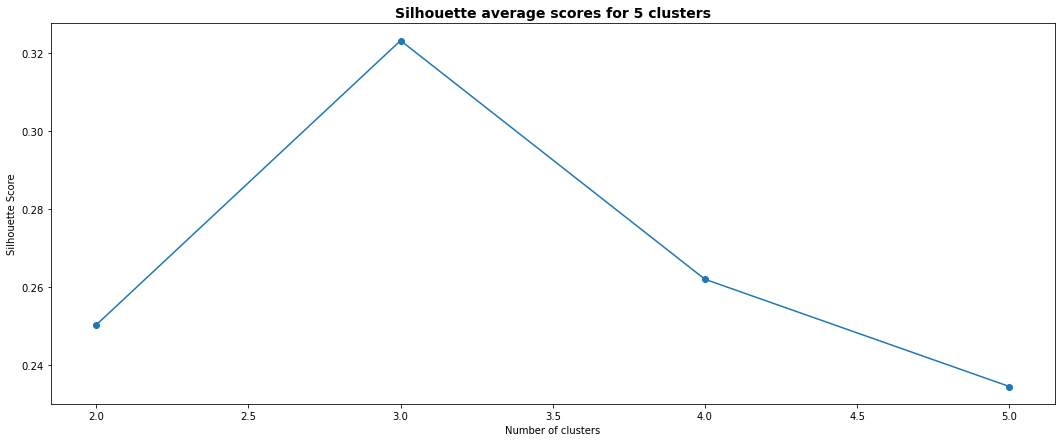

In [308]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(n_3)

    labels_pred = kmeans.predict(n_3)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(n_3, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(n_3, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

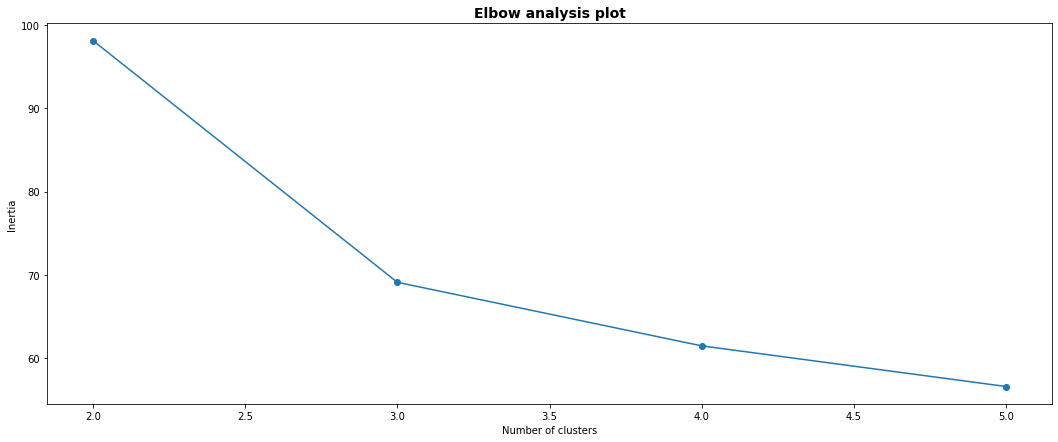

In [309]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [310]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(n_3)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 130.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 82.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 78.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 75.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 72.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 66.0


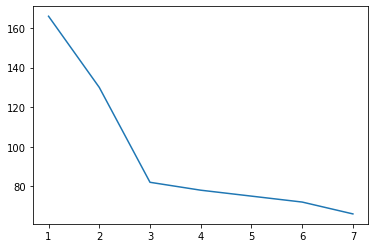

In [311]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [312]:
df_livetv.head()

,statuscode,contenttype,uafamily,@timestamp,livechannel,timeclass,hour
70,400,text/html; charset=utf-8,12.0,2088-05-13T07:18:16.000Z,60.0,3,7
73,400,text/html; charset=utf-8,12.0,2088-05-13T07:25:04.000Z,60.0,3,7
74,400,text/html; charset=utf-8,12.0,2088-05-13T07:54:31.000Z,60.0,3,7
75,400,text/html; charset=utf-8,12.0,2088-05-13T08:27:31.000Z,60.0,3,8
79,412,text/html,12.0,2088-05-13T16:42:10.000Z,60.0,3,16


In [313]:
n4 = df_livetv.copy()

In [314]:
n4=n4.drop(labels=["hour","@timestamp"],axis=1)

In [315]:
n4.head()

,statuscode,contenttype,uafamily,livechannel,timeclass
70,400,text/html; charset=utf-8,12.0,60.0,3
73,400,text/html; charset=utf-8,12.0,60.0,3
74,400,text/html; charset=utf-8,12.0,60.0,3
75,400,text/html; charset=utf-8,12.0,60.0,3
79,412,text/html,12.0,60.0,3


In [316]:
n4.drop_duplicates(subset=None, keep='first', inplace=True)

In [317]:
n4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 70 to 250429
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   29 non-null     int64  
 1   contenttype  29 non-null     object 
 2   uafamily     29 non-null     float64
 3   livechannel  29 non-null     float64
 4   timeclass    29 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ KB


In [318]:
n44 = n4.copy()

In [319]:
n_4 = pd.get_dummies(n44, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel', 'timeclass'])
print(n_4)

        statuscode_400  statuscode_403  statuscode_404  statuscode_412  \
70                   1               0               0               0   
79                   0               0               0               1   
85                   0               0               1               0   
196                  0               0               0               1   
197                  1               0               0               0   
309                  1               0               0               0   
917                  0               0               1               0   
1148                 0               0               0               1   
1198                 0               0               1               0   
3124                 0               0               1               0   
3183                 0               0               1               0   
4282                 0               0               1               0   
4297                 0               0

For 2 clusters the average silhouette_score is : 0.2161715597552171
For 3 clusters the average silhouette_score is : 0.258943428279206
For 4 clusters the average silhouette_score is : 0.21141825059980135
For 5 clusters the average silhouette_score is : 0.20792220995767746


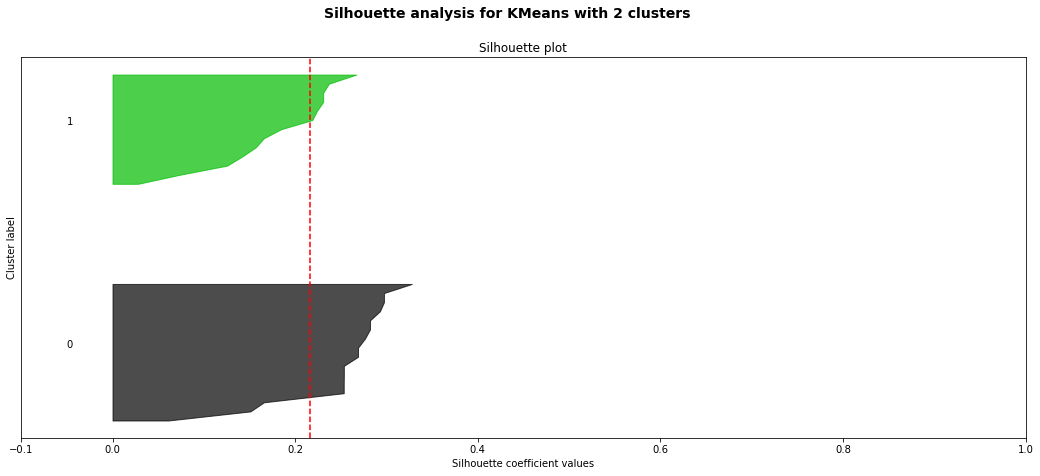

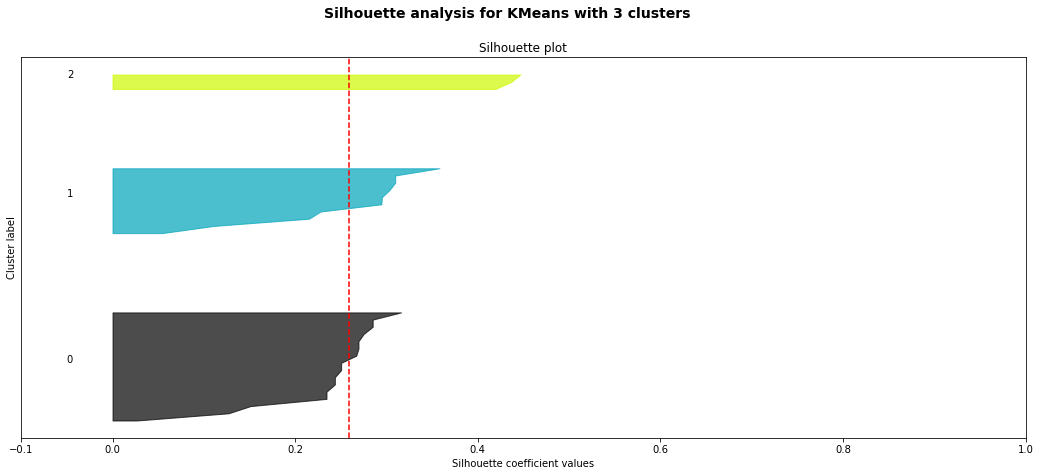

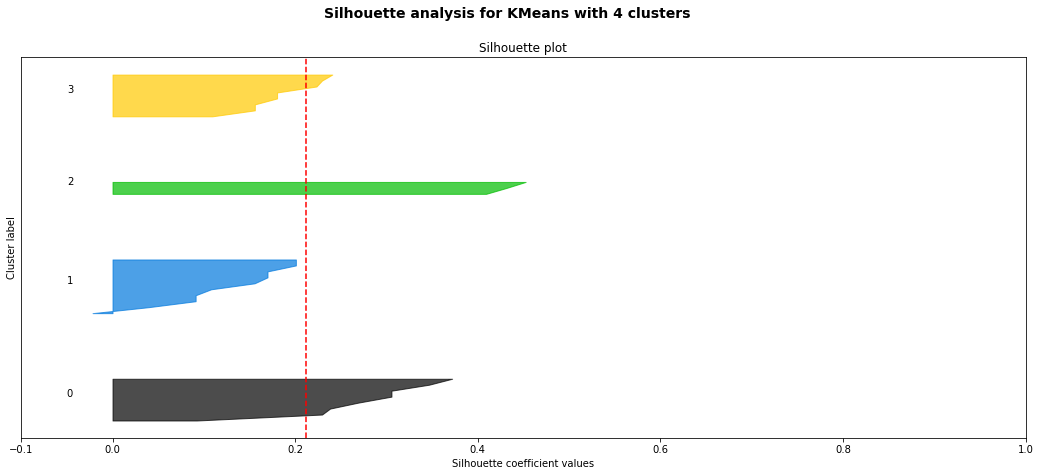

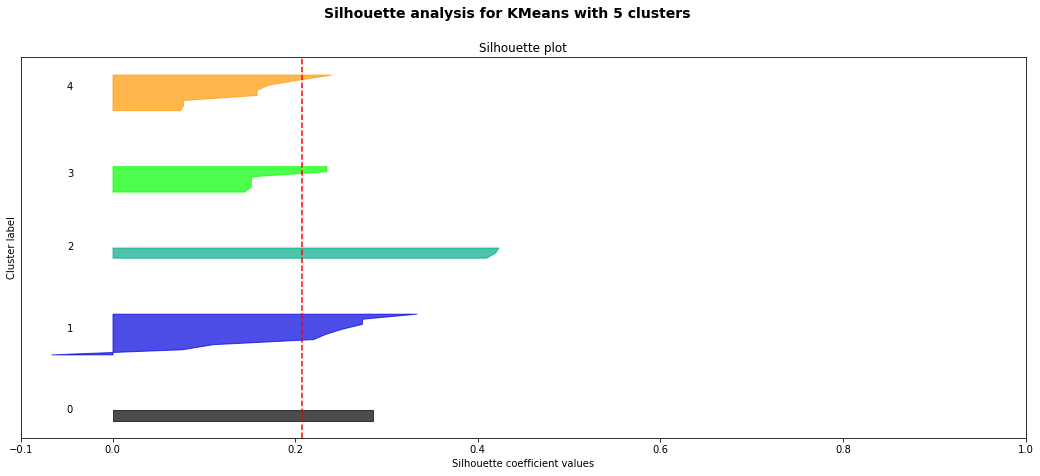

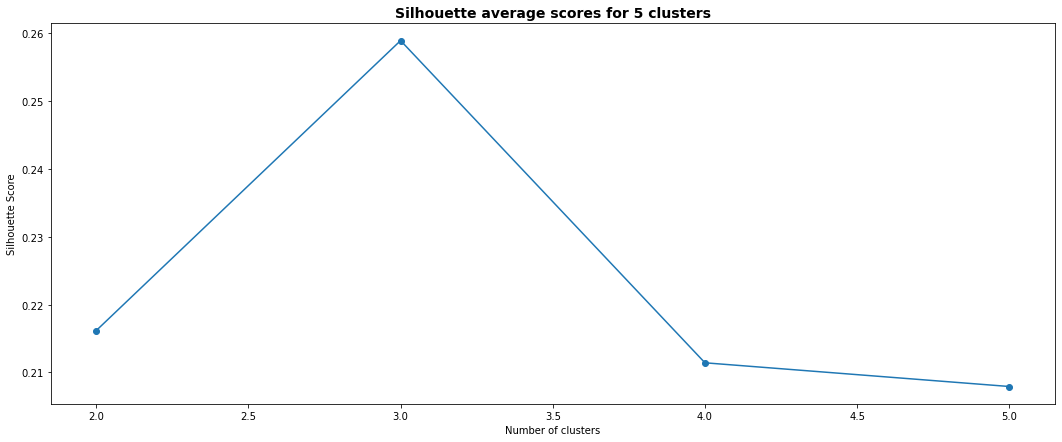

In [320]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(n_4)

    labels_pred = kmeans.predict(n_4)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(n_4, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(n_4, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

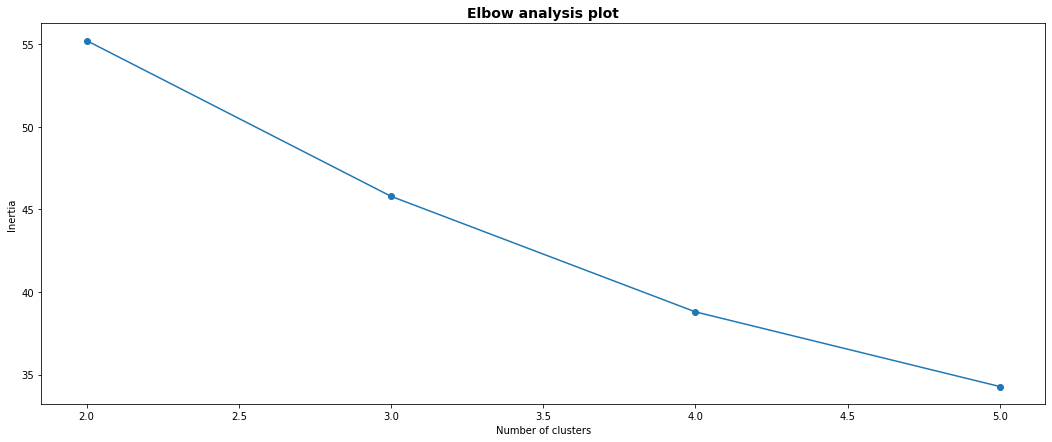

In [321]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [322]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(n_4)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 103.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 81.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 65.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 56.0
Run 1, iteration: 2/100, moves: 2, cost: 56.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 47.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 42.0
Run 1, iteration: 2/100, moves: 1, cost: 41.0
Run 1, iteration: 3/100, moves: 0, cost: 41.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, 

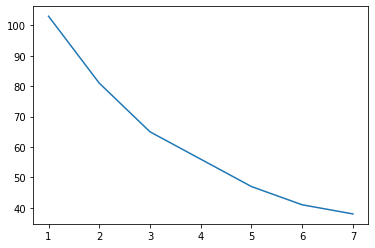

In [323]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [324]:
mk = n.copy()

In [325]:
mk.head()

,statuscode,contenttype,uafamily,livechannel,hour
85,404,text/html; charset=utf-8,12.0,68.0,18
196,412,text/html,12.0,60.0,19
197,400,text/html; charset=utf-8,12.0,60.0,20
200,400,text/html; charset=utf-8,12.0,60.0,21
213,400,text/html; charset=utf-8,12.0,60.0,19


In [326]:
mk=mk.drop(labels=["hour"],axis=1)

In [327]:
mk_1 = pd.get_dummies(mk, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel'])
print(mk_1)

        statuscode_400  statuscode_403  statuscode_404  statuscode_412  \
85                   0               0               1               0   
196                  0               0               0               1   
197                  1               0               0               0   
200                  1               0               0               0   
213                  1               0               0               0   
218                  1               0               0               0   
303                  1               0               0               0   
305                  0               0               0               1   
609                  1               0               0               0   
620                  0               0               0               1   
751                  0               0               0               1   
917                  0               0               1               0   
929                  0               0

For 2 clusters the average silhouette_score is : 0.4005620317744017
For 3 clusters the average silhouette_score is : 0.5363804501769722
For 4 clusters the average silhouette_score is : 0.5318785628991499
For 5 clusters the average silhouette_score is : 0.6342815667591375


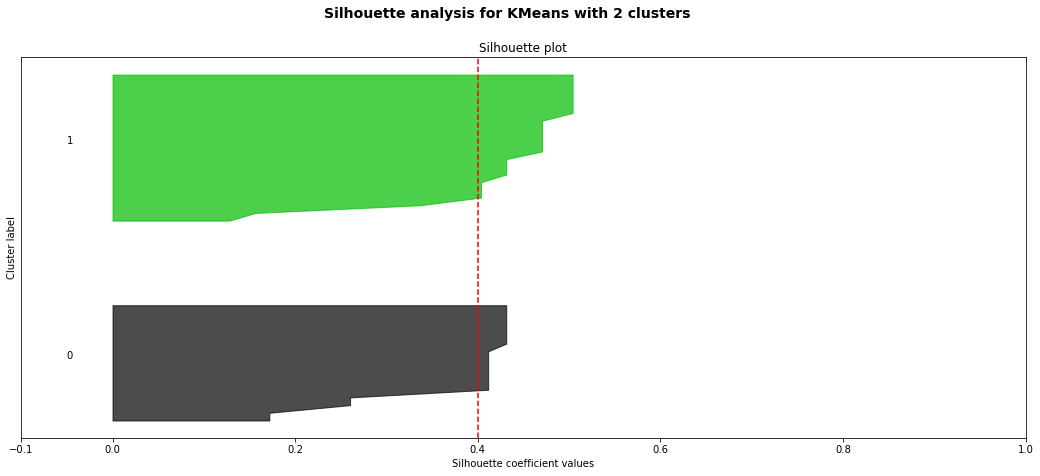

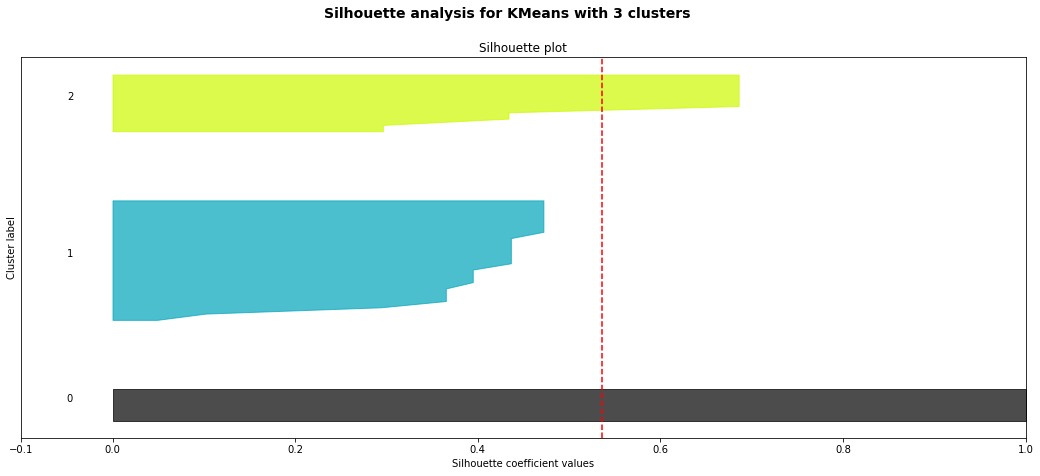

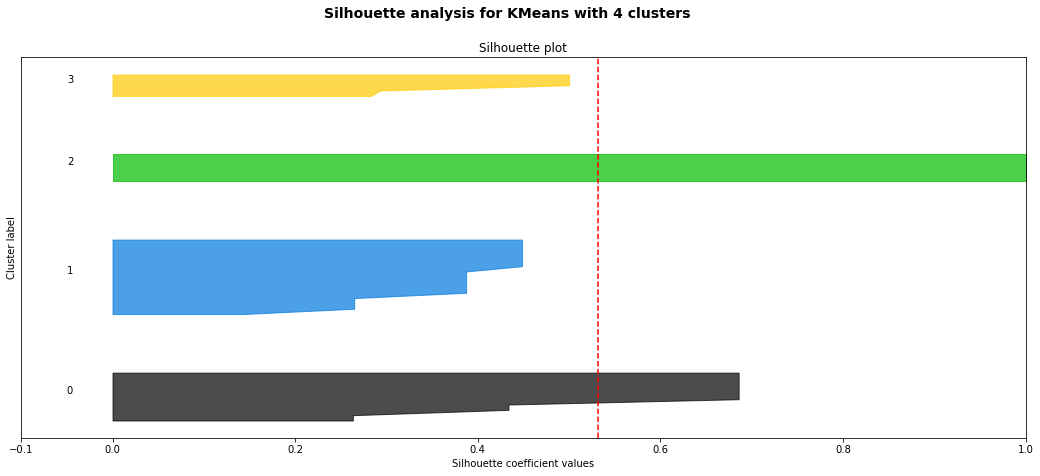

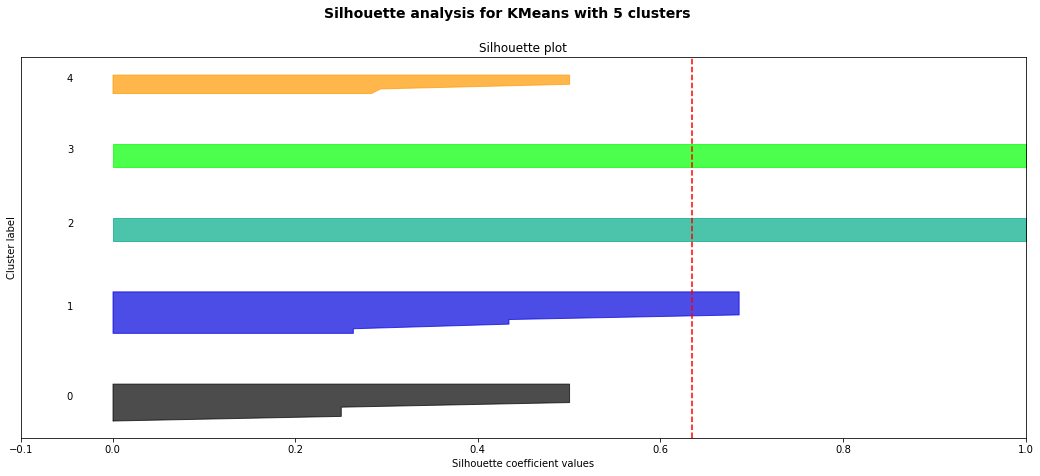

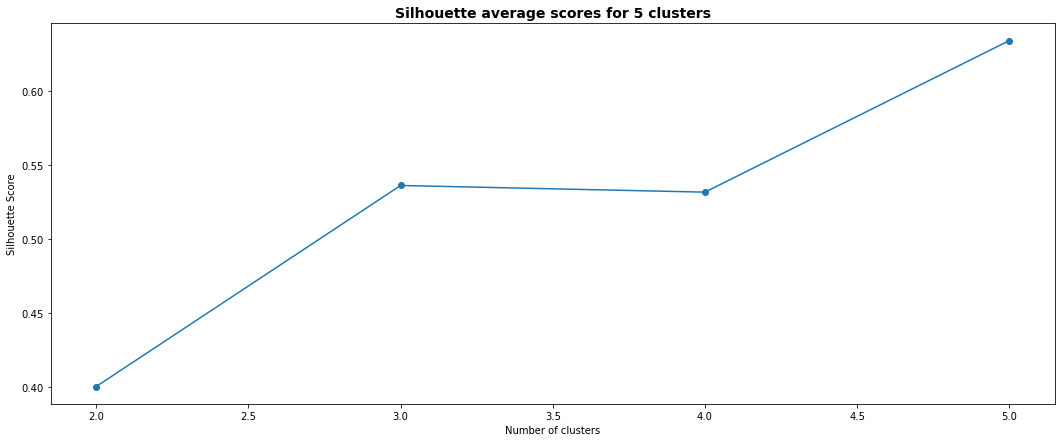

In [328]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(mk_1)

    labels_pred = kmeans.predict(mk_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(mk_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(mk_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

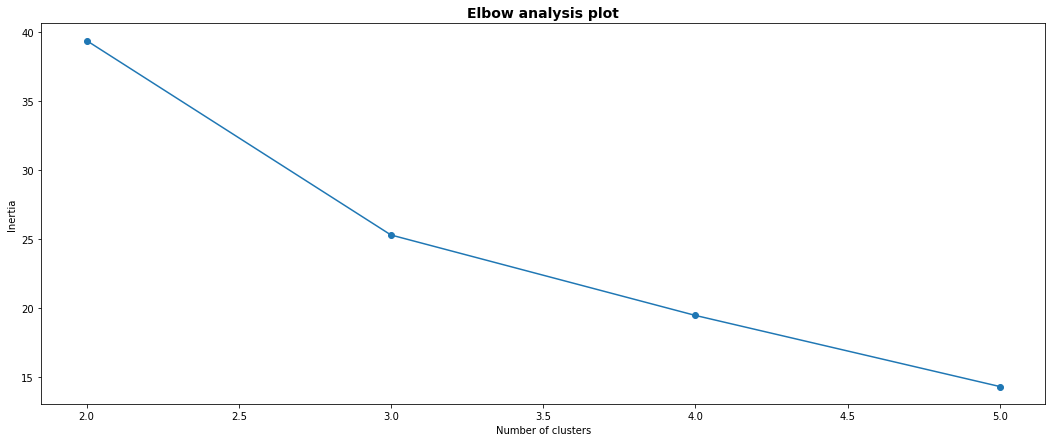

In [329]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [330]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(mk_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 88.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 56.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 52.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 28.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 25.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12.0


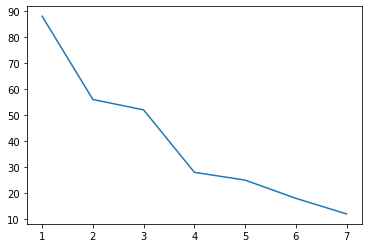

In [331]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [22]:
timeclass1 = [];
for i in ph:
    if(i>=18 and i<24):
        timeclass1.append(1);
    elif(i>=24 or i<6):
        timeclass1.append(2);
    else:
        timeclass1.append(3);

In [23]:
df_filecaching['timeclass1'] = timeclass1

In [49]:
df_filecaching['hour'] = ph

In [50]:
df_filecaching.head()

,statuscode,contenttype,uafamily,@timestamp,method,hour
2,404,application/octet-stream,21.0,2088-05-13T09:39:05.000Z,GET,9
5,404,application/octet-stream,21.0,2088-05-13T10:33:59.000Z,GET,10
9,404,application/octet-stream,21.0,2088-05-13T16:41:05.000Z,GET,16
72,404,application/octet-stream,21.0,2088-05-13T08:22:29.000Z,GET,8
201,404,application/octet-stream,21.0,2088-05-13T21:05:00.000Z,GET,21


In [59]:
p1 = df_filecaching.copy()

In [ ]:
df_filecaching=df_filecaching.drop(labels=["@timestamp"],axis=1)

In [60]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8978 entries, 2 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   8978 non-null   int64  
 1   contenttype  8978 non-null   object 
 2   uafamily     8978 non-null   float64
 3   method       8978 non-null   object 
 4   hour         8978 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 420.8+ KB


In [61]:
p1.drop_duplicates(subset=None, keep='first', inplace=True)

In [62]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 202563
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   58 non-null     int64  
 1   contenttype  58 non-null     object 
 2   uafamily     58 non-null     float64
 3   method       58 non-null     object 
 4   hour         58 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ KB


In [63]:
p_1 = pd.get_dummies(p1, columns = ['statuscode', 'contenttype', 'uafamily', 'method', 'hour'])
print(p_1)

        statuscode_401  statuscode_403  statuscode_404  statuscode_405  \
2                    0               0               1               0   
5                    0               0               1               0   
9                    0               0               1               0   
72                   0               0               1               0   
201                  0               0               1               0   
407                  0               0               1               0   
458                  0               0               1               0   
546                  0               0               1               0   
550                  0               0               1               0   
576                  0               0               1               0   
613                  0               0               1               0   
621                  0               0               1               0   
720                  0               0

For 2 clusters the average silhouette_score is : 0.3342541464266385
For 3 clusters the average silhouette_score is : 0.38876226265883657
For 4 clusters the average silhouette_score is : 0.3273086845129907
For 5 clusters the average silhouette_score is : 0.3058282808676793


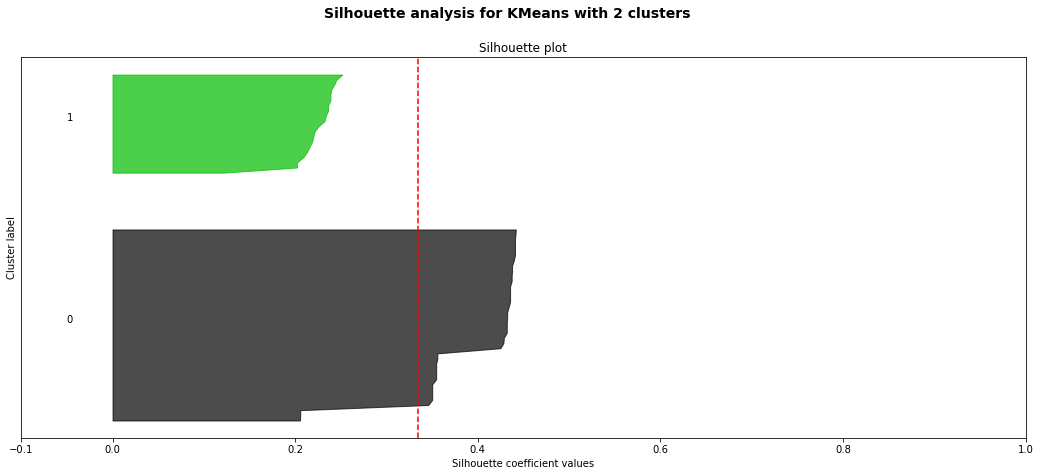

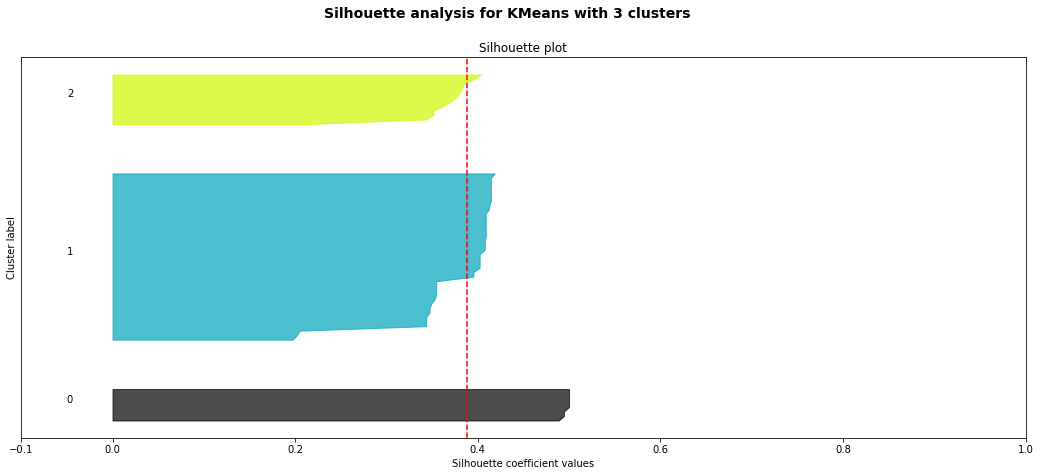

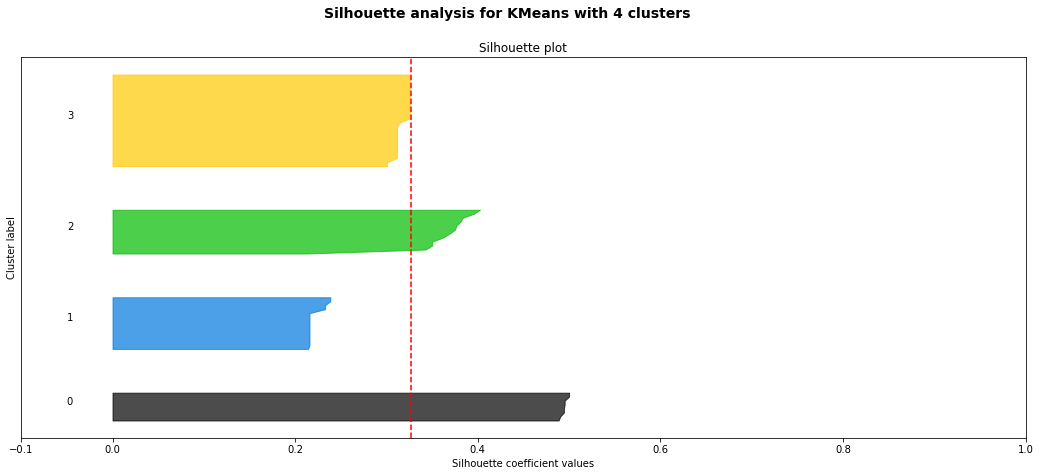

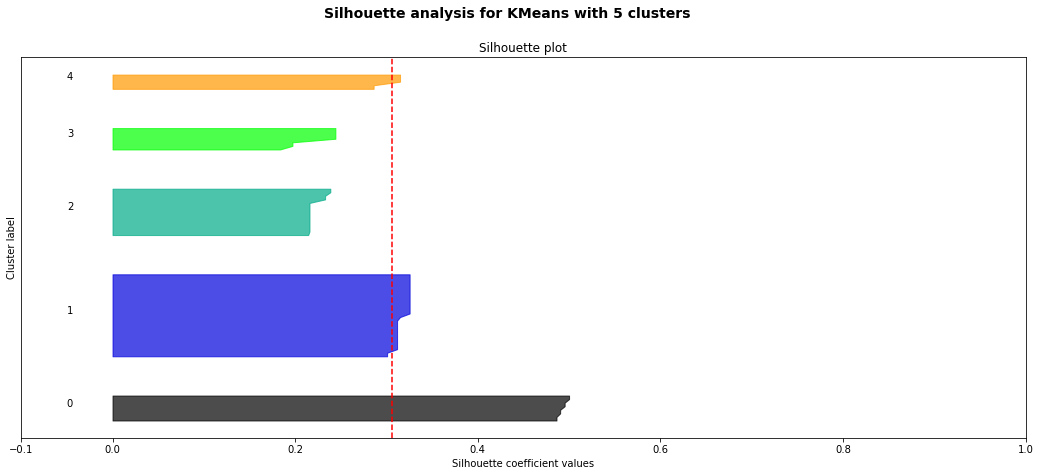

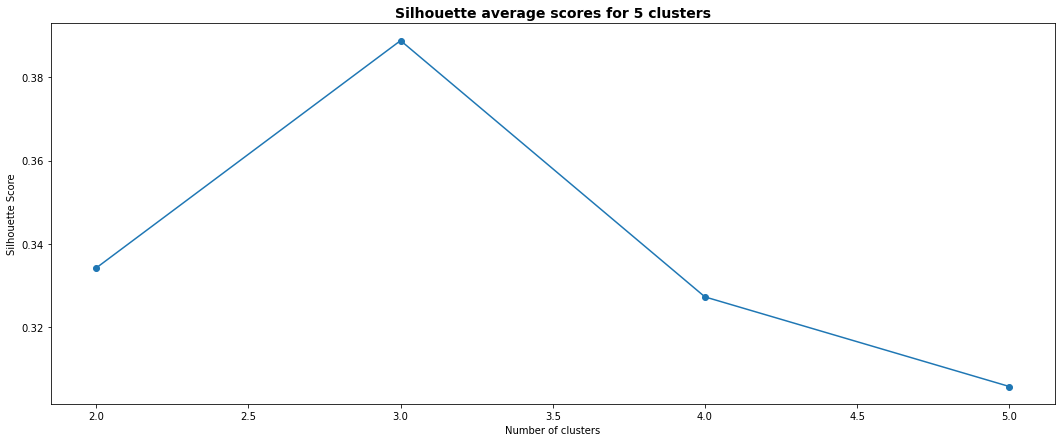

In [67]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(p_1)

    labels_pred = kmeans.predict(p_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(p_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(p_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')
plt.savefig('silhouttekmeanshost13.png', bbox_inches='tight')
plt.show()

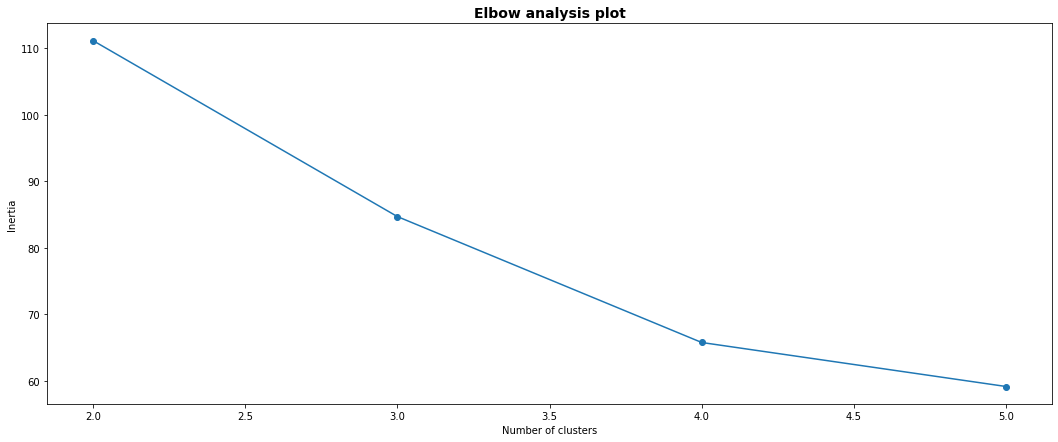

In [68]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.savefig('elbowkmeanshost13.png', bbox_inches='tight')
plt.show()

In [69]:
from kmodes.kmodes import KModes
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(p_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 162.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 92.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 70.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 60.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 57.0


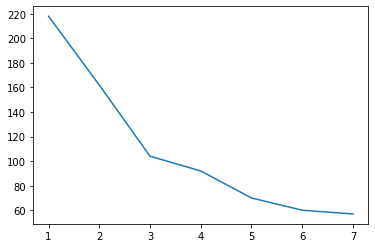

In [70]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [87]:
for i in range(2, 7):
    result = KMeans(n_clusters=i, random_state=100).fit(p_1)
    labels = result.labels_
    print(metrics.calinski_harabasz_score(p_1, labels))

26.7756335171271
28.211461166490896
27.757547004918973
24.202273863068463
21.96742479823917


In [65]:
for i in range(2, 7):
    result = KMeans(n_clusters=i, random_state=100).fit(p_1)
    labels = result.labels_
    print(davies_bouldin_score(p_1, labels))

1.3737311999591322
1.0519531735014065
1.1962485616289478
1.2486774833085739
1.2044835336698145


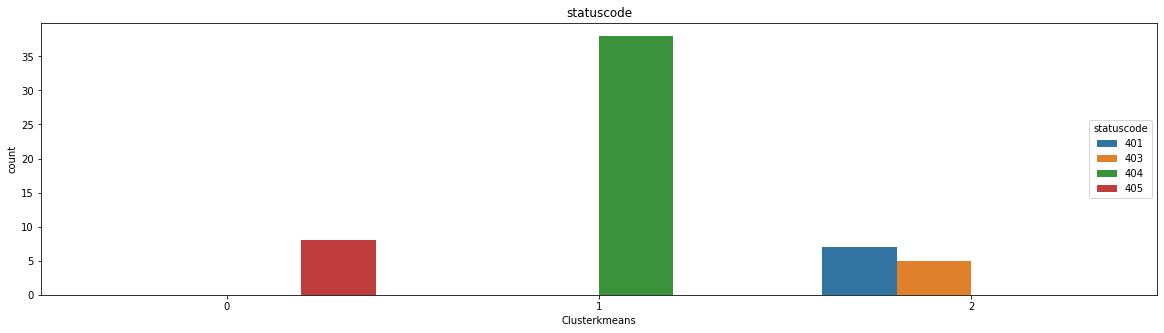

In [72]:
kmeans = KMeans(n_clusters=3, random_state=100)
cluster_labels = kmeans.fit_predict(p_1)
p1['Clusterkmeans'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="statuscode", data = p1)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('statuscodekmeanshost13.png', bbox_inches='tight')
plt.show()

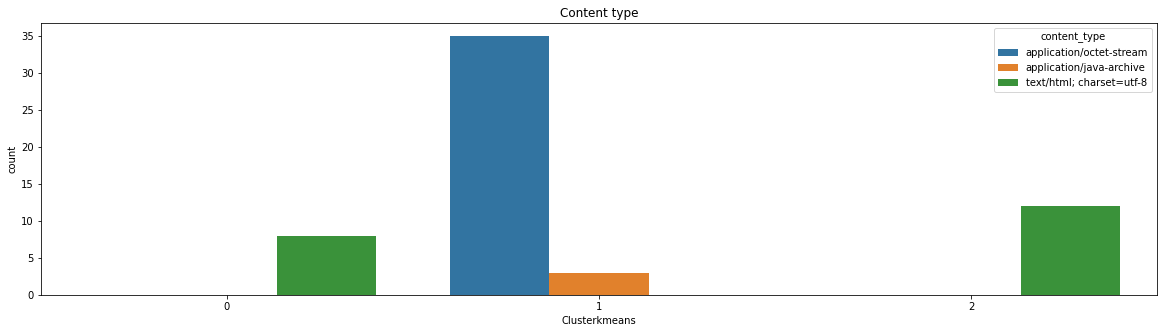

In [73]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="contenttype", data = p1)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.savefig('contenttypekmeanshost13.png', bbox_inches='tight')
plt.show()

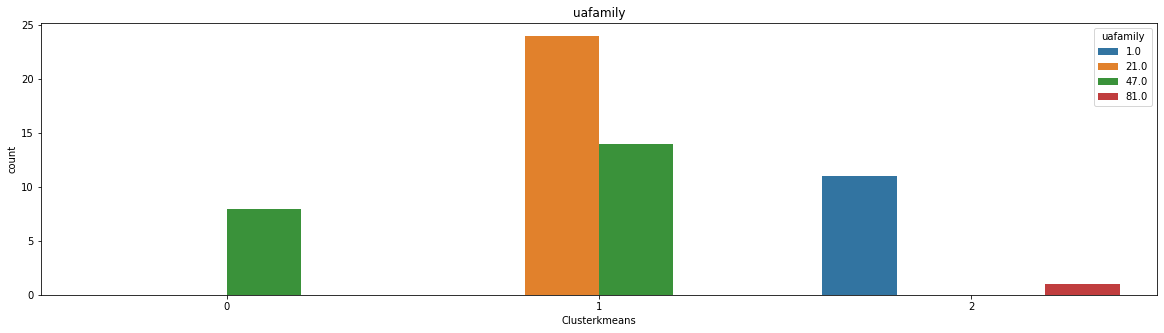

In [74]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="uafamily", data = p1)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.savefig('uafamilykmeanshost13.png', bbox_inches='tight')
plt.show()

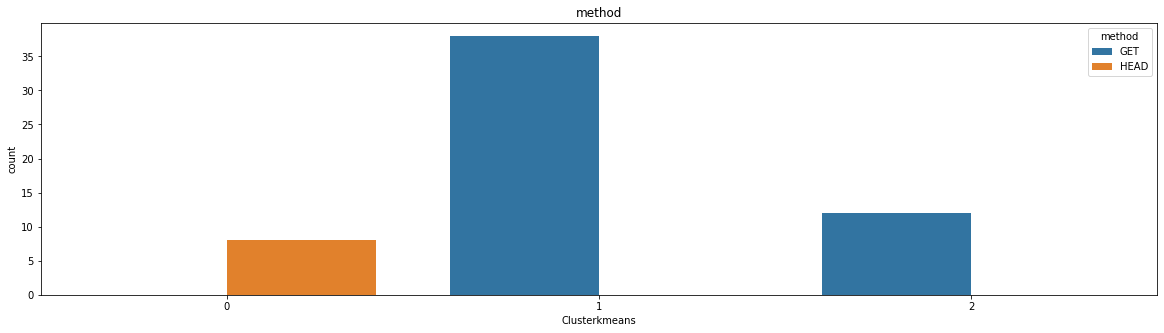

In [75]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="method", data = p1)
ax.set_title('method')
ax.legend(loc='best', title="method")
plt.savefig('methodkmeanshost13.png', bbox_inches='tight')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 104.0


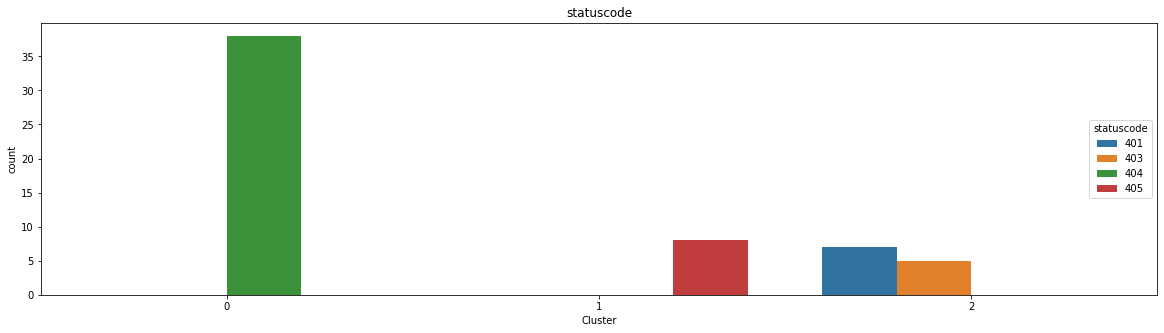

In [76]:
km = KModes(n_clusters=3, init = "Cao", verbose=1)
cluster_labels = km.fit_predict(p_1)
p1['Cluster'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = p1)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('statuscodekmodeshost13.png', bbox_inches='tight')
plt.show()

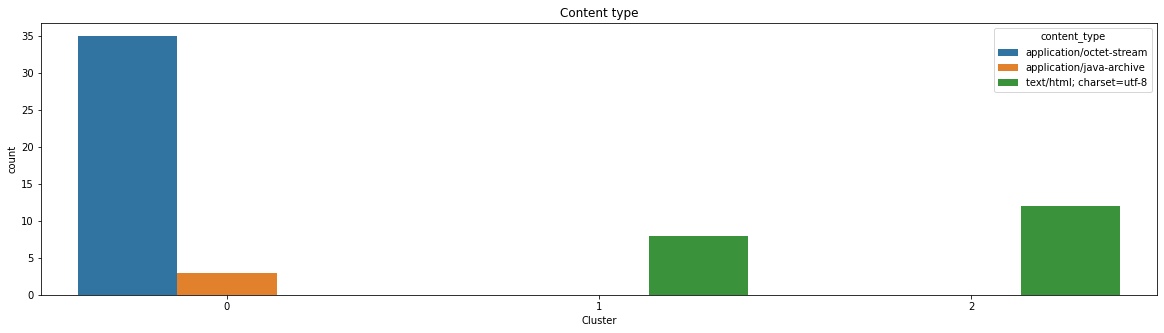

In [77]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = p1)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.savefig('contenttypekmodeshost13.png', bbox_inches='tight')
plt.show()

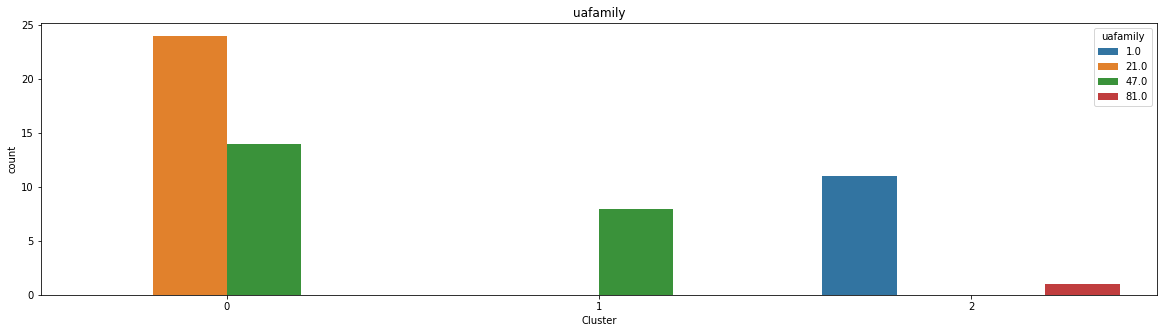

In [78]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = p1)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.savefig('uafamilykmodeshost13.png', bbox_inches='tight')
plt.show()

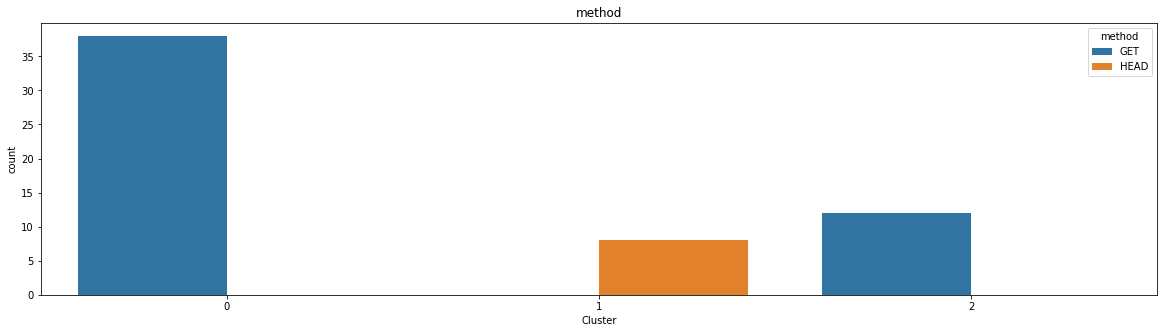

In [79]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="method", data = p1)
ax.set_title('method')
ax.legend(loc='best', title="method")
plt.savefig('methodkmodeshost13.png', bbox_inches='tight')
plt.show()

In [39]:
p2 = df_filecaching.copy()

In [40]:
p2=p2.drop(labels=["@timestamp"],axis=1)

In [41]:
p2 = p2[p2['timeclass1'] == 1]

In [43]:
p2.head()

,statuscode,contenttype,uafamily,method,timeclass1,hour1
201,404,application/octet-stream,21.0,GET,1,21
302,404,application/octet-stream,21.0,GET,1,21
458,404,application/octet-stream,21.0,GET,1,20
621,404,application/octet-stream,21.0,GET,1,23
720,404,application/octet-stream,21.0,GET,1,18


In [45]:
p2=p2.drop(labels=["timeclass1"],axis=1)

In [46]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249 entries, 201 to 286920
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   2249 non-null   int64  
 1   contenttype  2249 non-null   object 
 2   uafamily     2249 non-null   float64
 3   method       2249 non-null   object 
 4   hour1        2249 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 105.4+ KB


In [47]:
p2.drop_duplicates(subset=None, keep='first', inplace=True)

In [48]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 201 to 202563
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   16 non-null     int64  
 1   contenttype  16 non-null     object 
 2   uafamily     16 non-null     float64
 3   method       16 non-null     object 
 4   hour1        16 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 768.0+ bytes


In [49]:
p_2 = pd.get_dummies(p2, columns = ['statuscode', 'contenttype', 'uafamily', 'method', 'hour1'])
print(p_2)

        statuscode_401  statuscode_403  statuscode_404  statuscode_405  \
201                  0               0               1               0   
458                  0               0               1               0   
621                  0               0               1               0   
720                  0               0               1               0   
1538                 0               0               1               0   
3105                 0               0               1               0   
23995                0               0               0               1   
38058                0               0               1               0   
49610                0               1               0               0   
53452                0               0               0               1   
57513                0               0               0               1   
80875                0               0               1               0   
93911                0               1

For 2 clusters the average silhouette_score is : 0.33581842836305476
For 3 clusters the average silhouette_score is : 0.4317932344600604
For 4 clusters the average silhouette_score is : 0.3494065791843589
For 5 clusters the average silhouette_score is : 0.23024512085846013


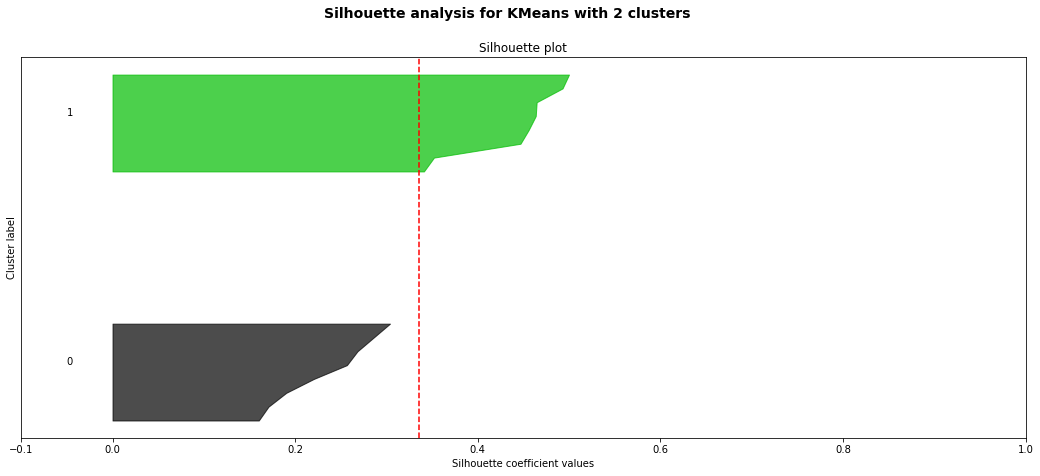

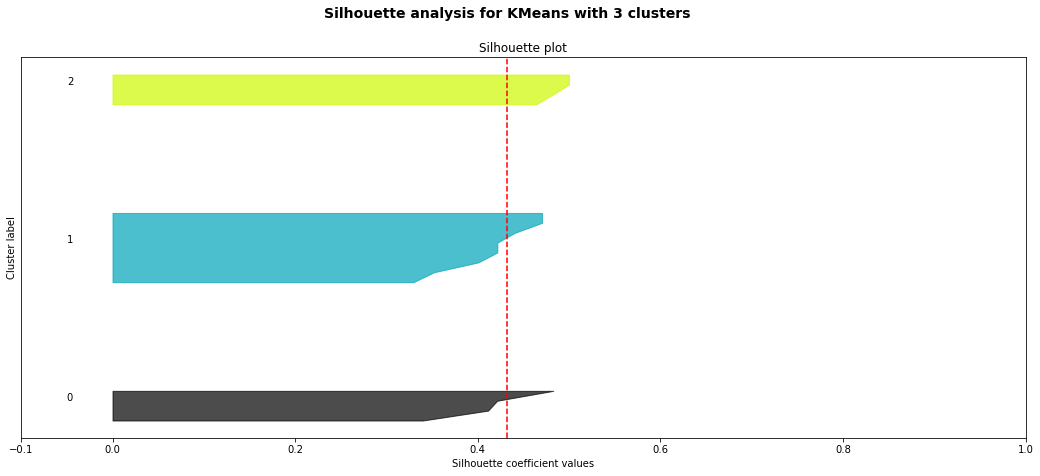

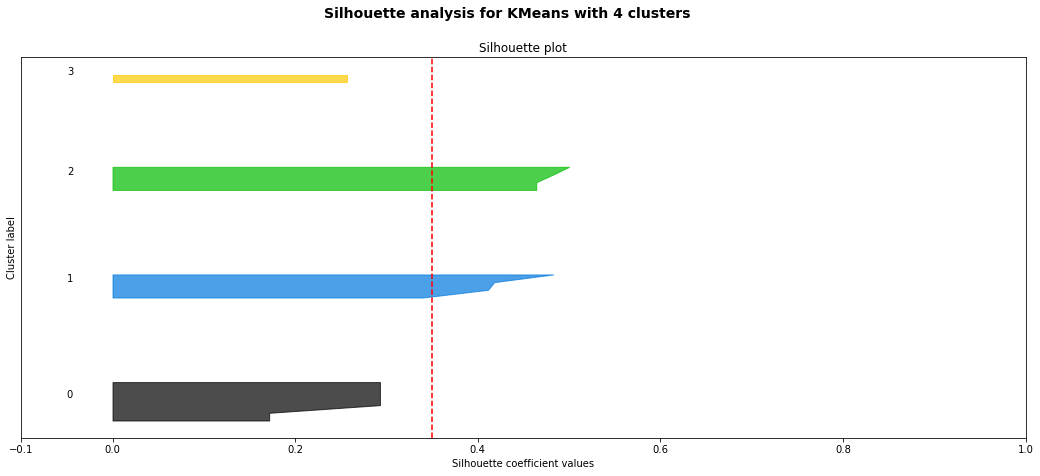

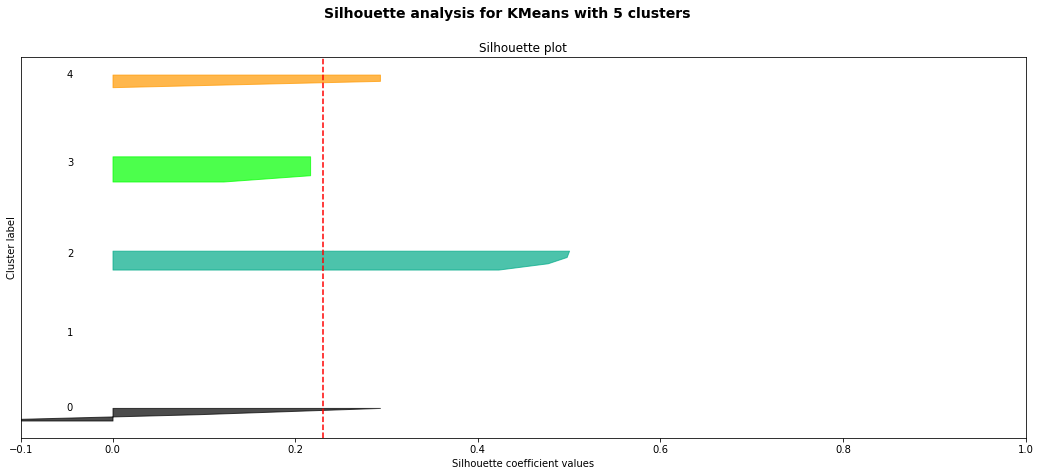

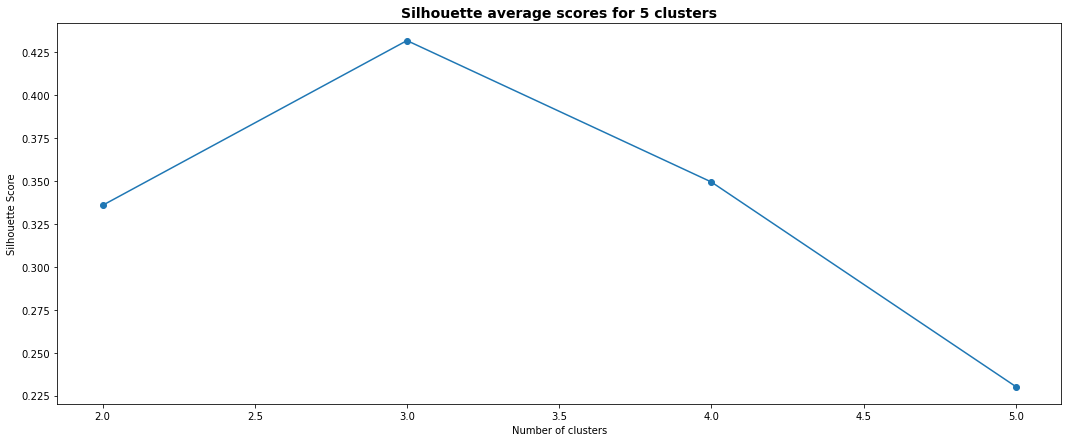

In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(p_2)

    labels_pred = kmeans.predict(p_2)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(p_2, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(p_2, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

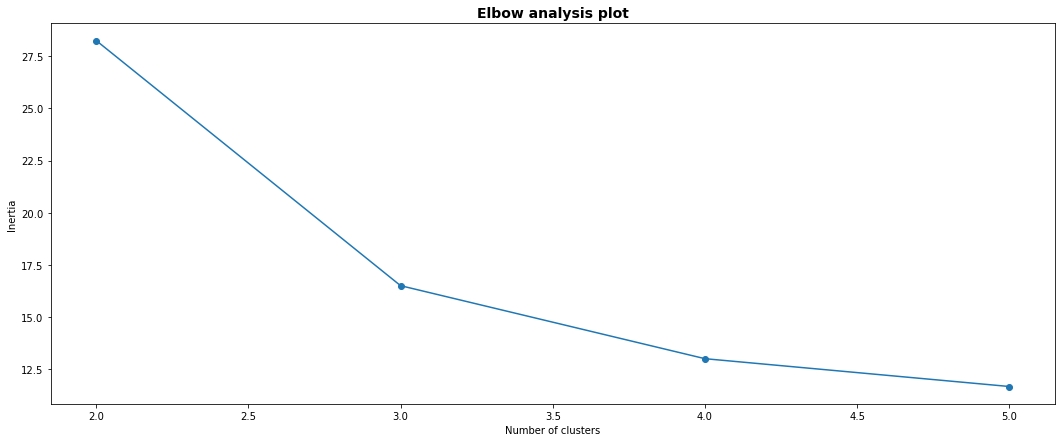

In [51]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [52]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(p_2)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 72.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 44.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 13.0


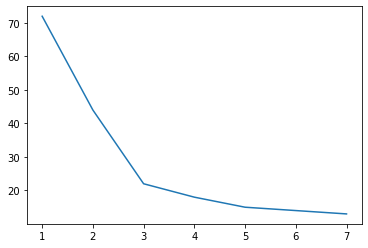

In [53]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [54]:
p3 = df_filecaching.copy()

In [55]:
p3=p3.drop(labels=["@timestamp"],axis=1)

In [56]:
p3 = p3[p3['timeclass1'] == 2]

In [57]:
p3=p3.drop(labels=["timeclass1"],axis=1)

In [58]:
p3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 407 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   2587 non-null   int64  
 1   contenttype  2587 non-null   object 
 2   uafamily     2587 non-null   float64
 3   method       2587 non-null   object 
 4   hour1        2587 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 121.3+ KB


In [59]:
p3.drop_duplicates(subset=None, keep='first', inplace=True)

In [60]:
p3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 407 to 199471
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   18 non-null     int64  
 1   contenttype  18 non-null     object 
 2   uafamily     18 non-null     float64
 3   method       18 non-null     object 
 4   hour1        18 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 864.0+ bytes


In [61]:
p_3 = pd.get_dummies(p3, columns = ['statuscode', 'contenttype', 'uafamily', 'method', 'hour1'])
print(p_3)

        statuscode_401  statuscode_404  statuscode_405  \
407                  0               1               0   
550                  0               1               0   
613                  0               1               0   
964                  0               1               0   
1098                 0               1               0   
1669                 0               1               0   
2224                 0               1               0   
4338                 0               1               0   
5523                 0               1               0   
10539                0               0               1   
53693                0               0               1   
55681                0               1               0   
85443                0               1               0   
105198               0               1               0   
121160               0               0               1   
134805               1               0               0   
140170        

For 2 clusters the average silhouette_score is : 0.3119525048496351
For 3 clusters the average silhouette_score is : 0.23614591812155128
For 4 clusters the average silhouette_score is : 0.31569135570858986
For 5 clusters the average silhouette_score is : 0.3133778642771069


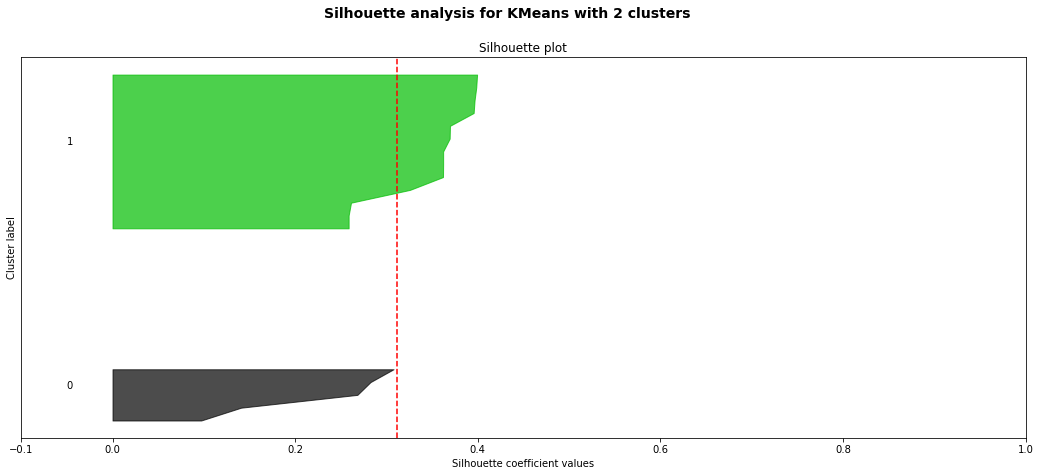

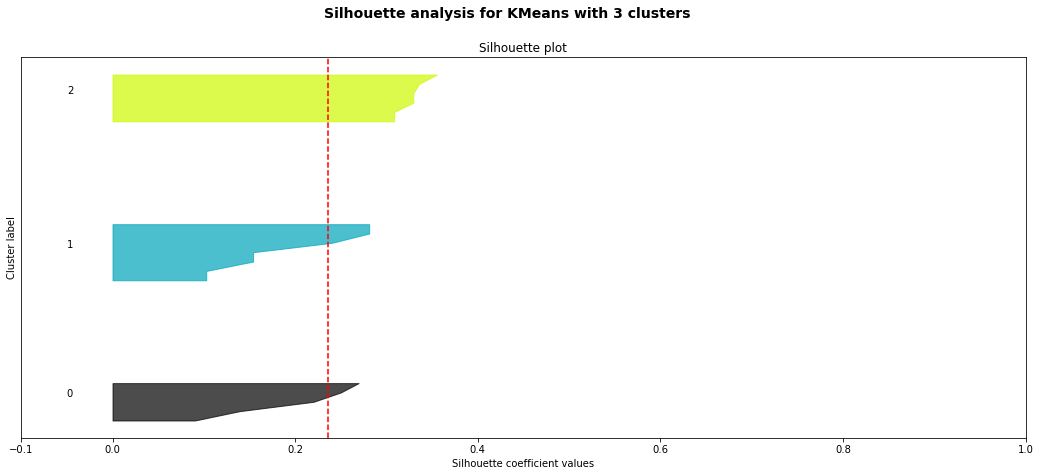

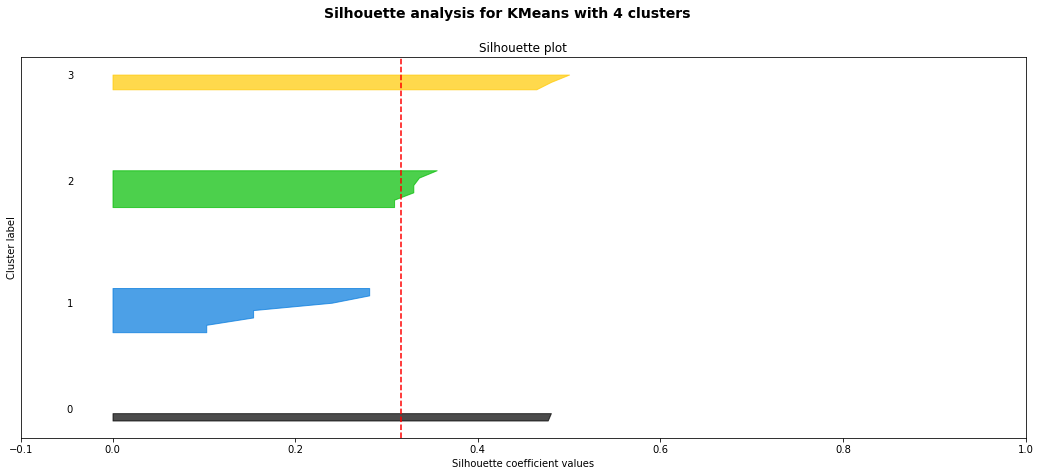

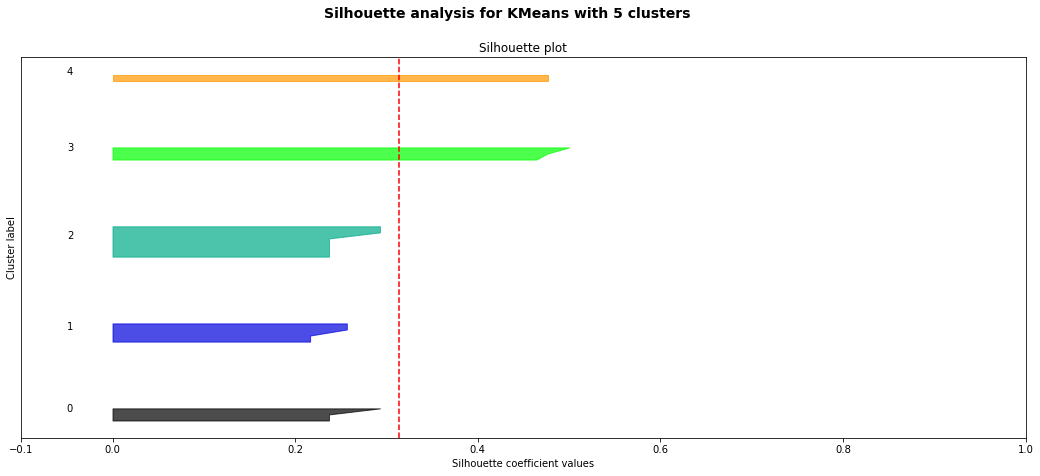

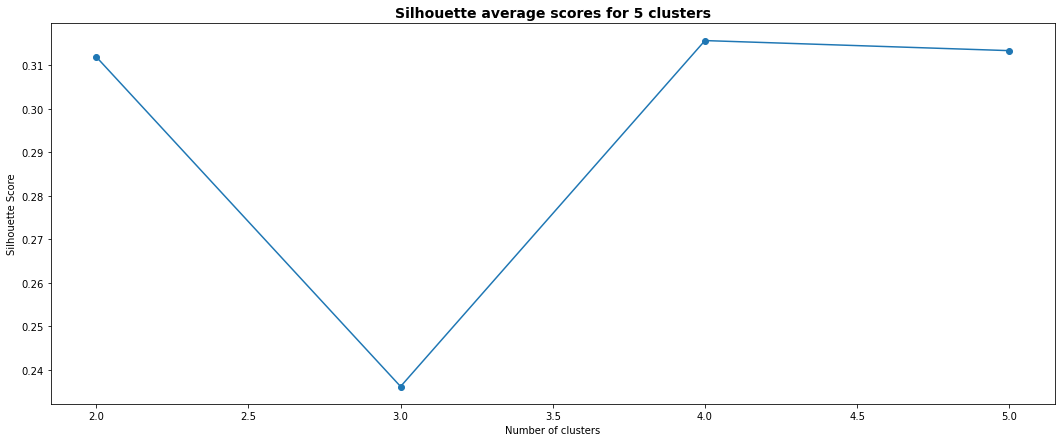

In [62]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(p_3)

    labels_pred = kmeans.predict(p_3)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(p_3, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(p_3, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

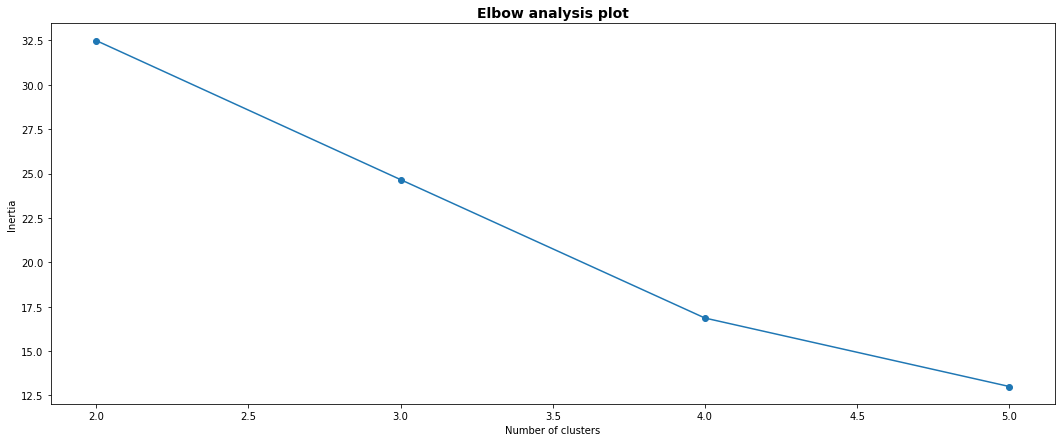

In [63]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [64]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(p_3)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 66.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 54.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 36.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 24.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 18.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 17.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 16.0


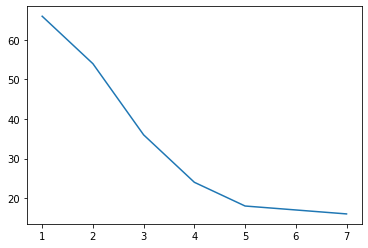

In [65]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [66]:
p4 = df_filecaching.copy()

In [67]:
p4=p4.drop(labels=["@timestamp"],axis=1)

In [68]:
p4 = p4[p4['timeclass1'] == 3]

In [69]:
p4=p4.drop(labels=["timeclass1"],axis=1)

In [70]:
p4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4142 entries, 2 to 286771
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   4142 non-null   int64  
 1   contenttype  4142 non-null   object 
 2   uafamily     4142 non-null   float64
 3   method       4142 non-null   object 
 4   hour1        4142 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 194.2+ KB


In [71]:
p4.drop_duplicates(subset=None, keep='first', inplace=True)

In [72]:
p4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 2 to 146341
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   24 non-null     int64  
 1   contenttype  24 non-null     object 
 2   uafamily     24 non-null     float64
 3   method       24 non-null     object 
 4   hour1        24 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


In [73]:
p_4 = pd.get_dummies(p4, columns = ['statuscode', 'contenttype', 'uafamily', 'method', 'hour1'])
print(p_4)

        statuscode_401  statuscode_403  statuscode_404  statuscode_405  \
2                    0               0               1               0   
5                    0               0               1               0   
9                    0               0               1               0   
72                   0               0               1               0   
546                  0               0               1               0   
576                  0               0               1               0   
721                  0               0               1               0   
1112                 0               0               1               0   
1154                 0               0               1               0   
1847                 0               0               1               0   
2308                 0               0               1               0   
2521                 0               0               1               0   
11752                0               0

For 2 clusters the average silhouette_score is : 0.3666016940362689
For 3 clusters the average silhouette_score is : 0.26145160625052727
For 4 clusters the average silhouette_score is : 0.2769940914951228
For 5 clusters the average silhouette_score is : 0.2463792904953653


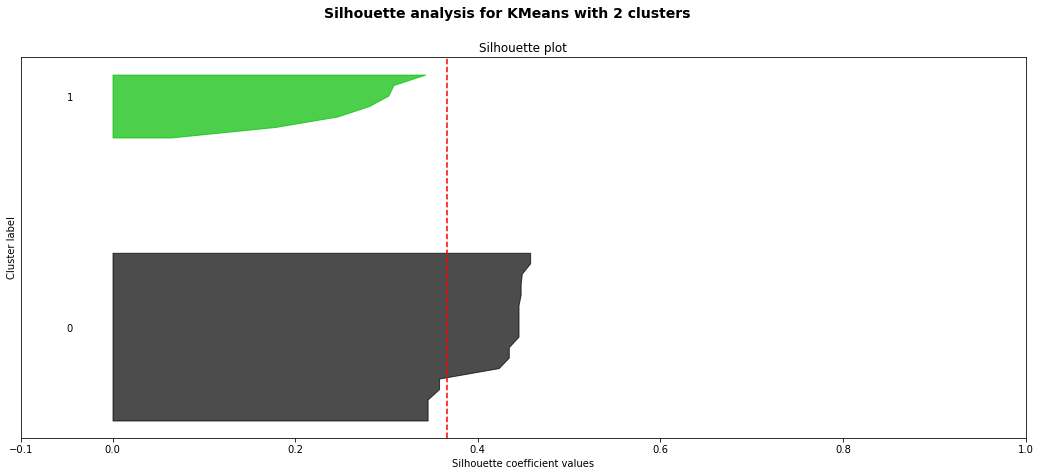

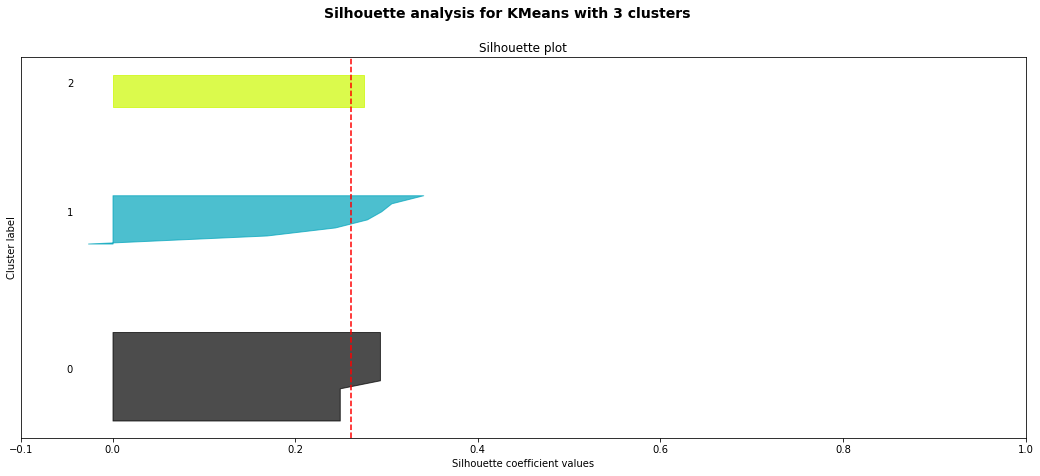

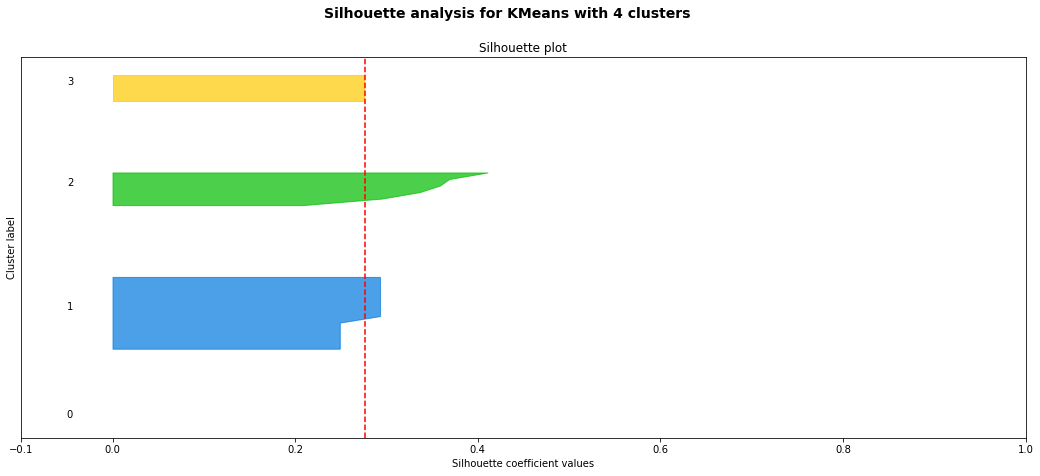

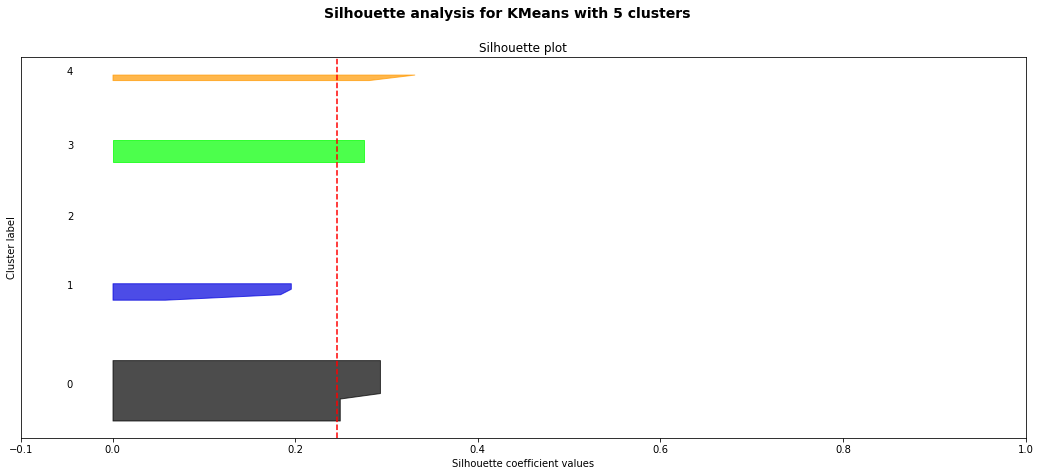

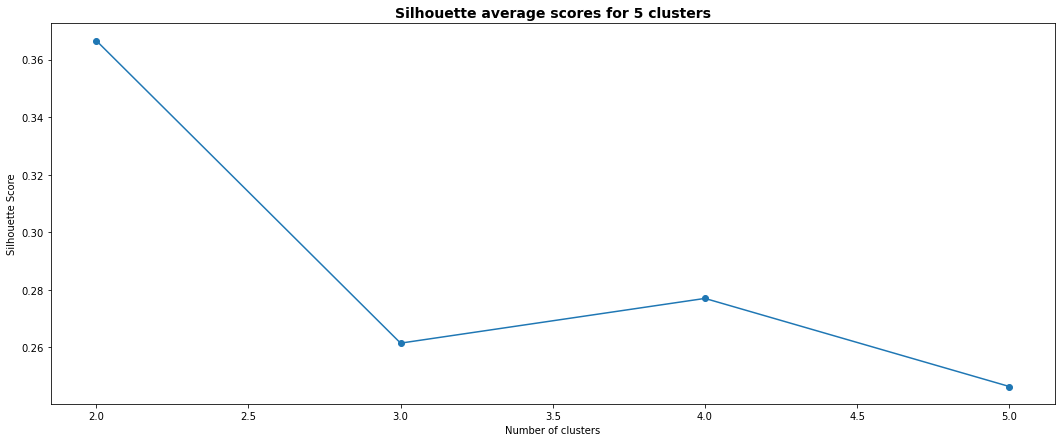

In [74]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(p_4)

    labels_pred = kmeans.predict(p_4)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(p_4, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(p_4, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

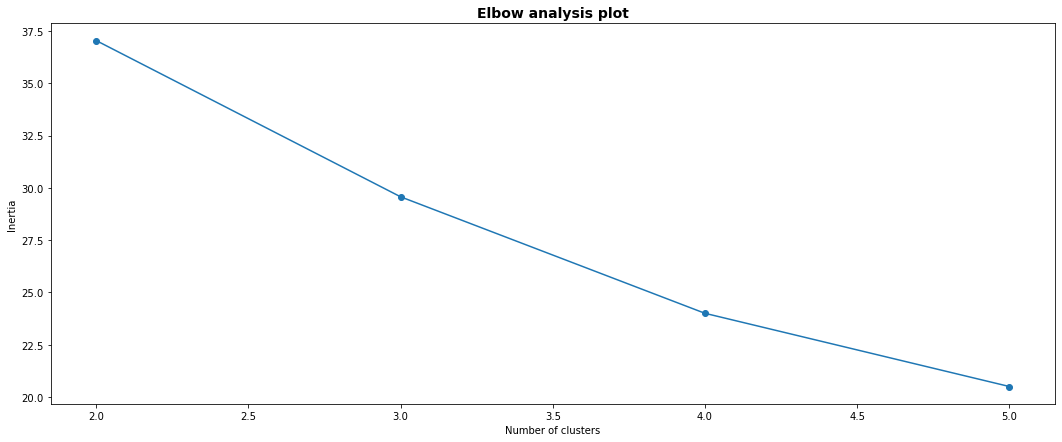

In [75]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [76]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(p_4)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 78.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 69.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 39.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 29.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 25.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 22.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 21.0


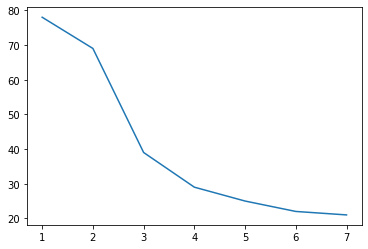

In [77]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [89]:
timeclass2 = [];
for i in lh:
    if(i>=18 and i<24):
        timeclass2.append(1);
    elif(i>=24 or i<6):
        timeclass2.append(2);
    else:
        timeclass2.append(3);

In [90]:
df_website['timeclass2'] = timeclass2

In [77]:
df_website['hour'] = lh

In [78]:
df_website=df_website.drop(labels=["@timestamp"],axis=1)

In [79]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 76 to 286567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1160 non-null   int64  
 1   contenttype  1160 non-null   object 
 2   uamajor      1001 non-null   float64
 3   uafamily     1160 non-null   float64
 4   hour         1160 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 54.4+ KB


In [80]:
df_website['uamajor']=df_website['uamajor'].fillna(df_website['uamajor'].mode()[0])

In [81]:
l1 = df_website.copy()

In [96]:
l1=l1.drop(labels=["hour2"],axis=1)

In [82]:
l1.drop_duplicates(subset=None, keep='first', inplace=True)

In [83]:
l1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 76 to 284303
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   340 non-null    int64  
 1   contenttype  340 non-null    object 
 2   uamajor      340 non-null    float64
 3   uafamily     340 non-null    float64
 4   hour         340 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.9+ KB


In [84]:
l_1 = pd.get_dummies(l1, columns = ['statuscode', 'contenttype', 'uafamily', 'uamajor'])
print(l_1)

        hour  statuscode_403  statuscode_405  contenttype_text/html  \
76         8               1               0                      1   
623        7               1               0                      1   
730        8               1               0                      1   
743       12               1               0                      1   
757       14               1               0                      1   
...      ...             ...             ...                    ...   
277881     9               1               0                      1   
278741     7               1               0                      1   
278847    12               1               0                      1   
279014    12               1               0                      1   
284303    11               1               0                      1   

        contenttype_text/html; charset=utf-8  uafamily_0.0  uafamily_1.0  \
76                                         0             0             

For 2 clusters the average silhouette_score is : 0.5081459392050522
For 3 clusters the average silhouette_score is : 0.44864066110452366
For 4 clusters the average silhouette_score is : 0.4037114859410934
For 5 clusters the average silhouette_score is : 0.36443211691467314


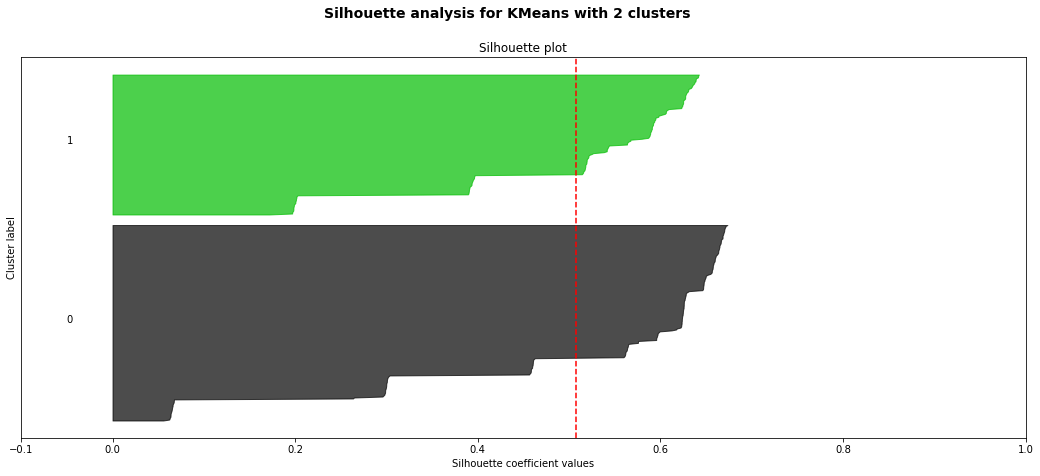

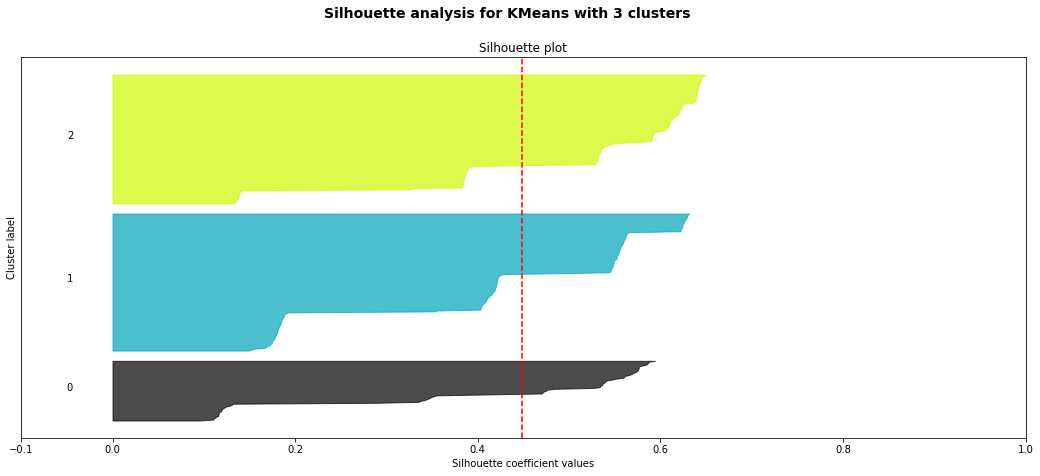

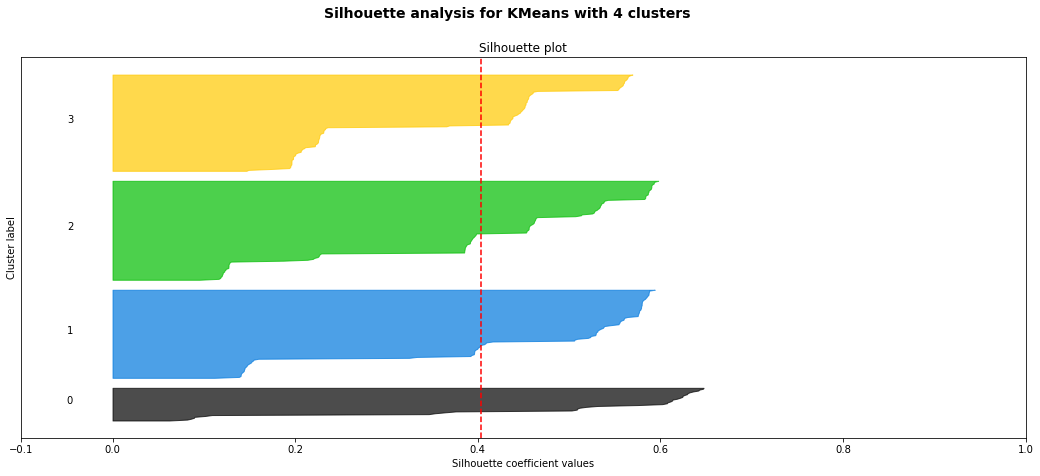

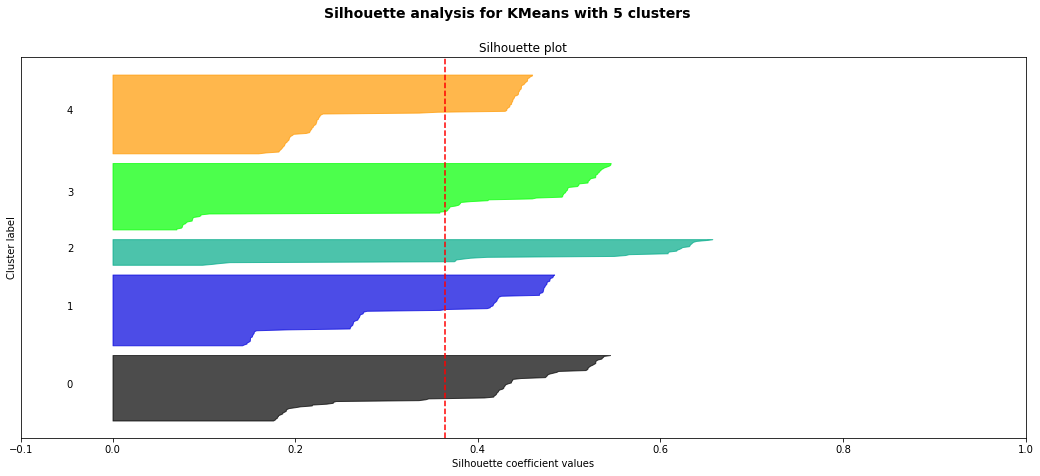

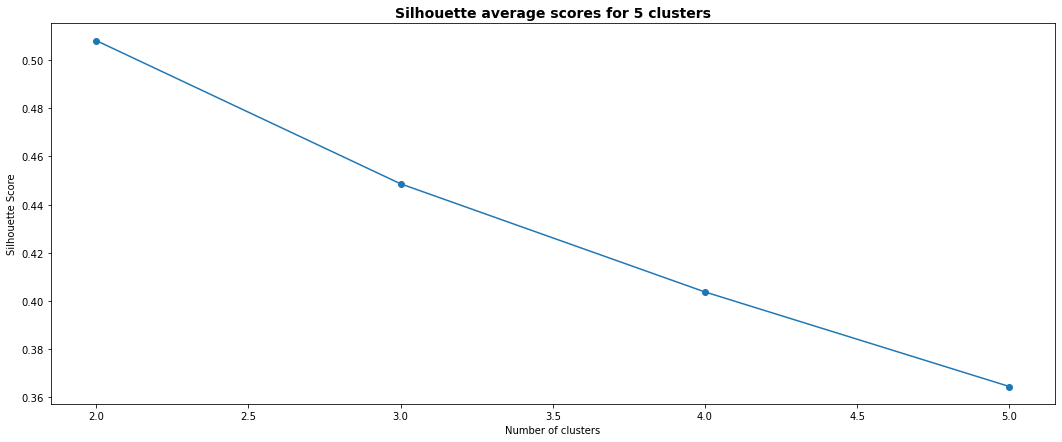

In [105]:
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(l_1)

    labels_pred = kmeans.predict(l_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(l_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(l_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.savefig('silhouttekmeanshost3.png', bbox_inches='tight')
plt.show()

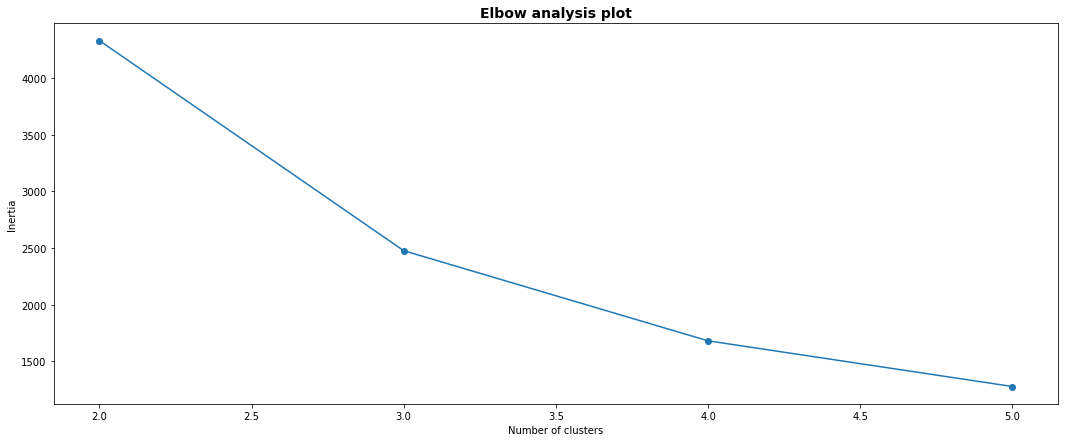

In [106]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.savefig('elbowkmeanshost3.png', bbox_inches='tight')
plt.show()

In [102]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(l_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 1029.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 989.0
Run 1, iteration: 2/100, moves: 0, cost: 989.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 56, cost: 956.0
Run 1, iteration: 2/100, moves: 0, cost: 956.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 75, cost: 923.0
Run 1, iteration: 2/100, moves: 0, cost: 923.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 82, cost: 885.0
Run 1, iteration: 2/100, moves: 0, cost: 885.0
Init: initializing centroids
Init: initializ

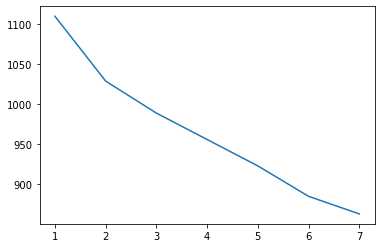

In [103]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [88]:
for i in range(2, 7):
    result = KMeans(n_clusters=i, random_state=100).fit(l_1)
    labels = result.labels_
    print(metrics.calinski_harabasz_score(l_1, labels))

685.1473414438263
672.8853894772142
632.5862622513777
640.552392976927
585.8582209083626


In [86]:
for i in range(2, 7):
    result = KMeans(n_clusters=i, random_state=100).fit(l_1)
    labels = result.labels_
    print(davies_bouldin_score(l_1, labels))

0.6769928779585436
0.7311338438053082
0.762727230451899
0.8389596503478659
0.9725495584237872


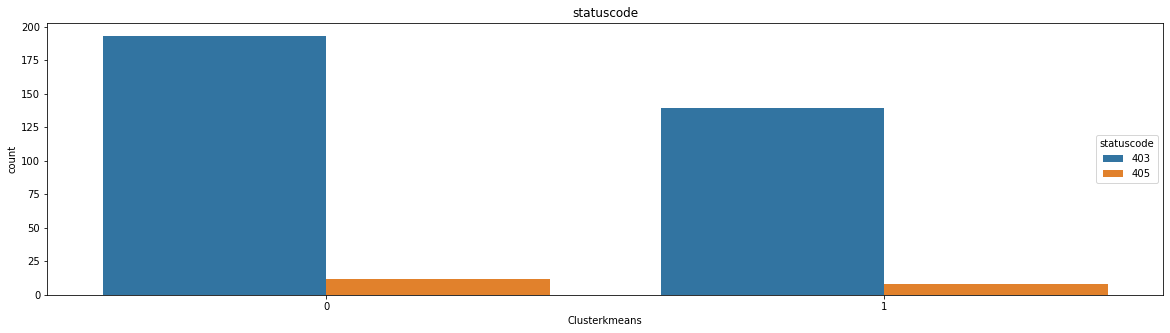

In [107]:
kmeans = KMeans(n_clusters=2, random_state=100)
cluster_labels = kmeans.fit_predict(l_1)
l1['Clusterkmeans'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="statuscode", data = l1)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('statuscodekmeanshost3.png', bbox_inches='tight')
plt.show()

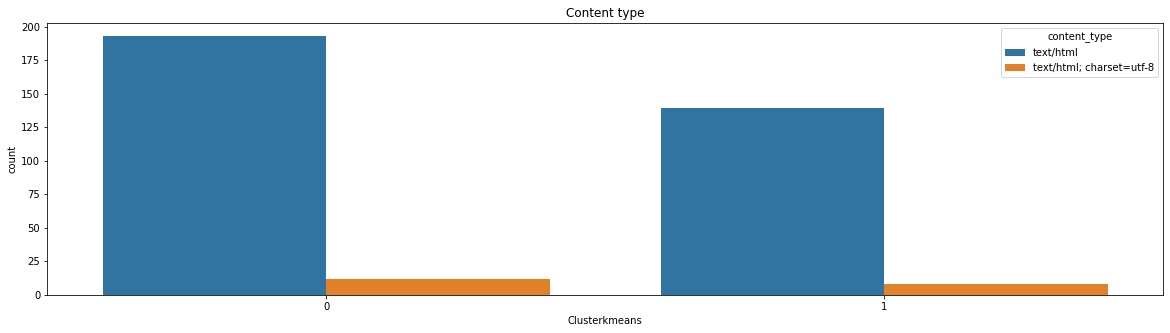

In [108]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="contenttype", data = l1)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.savefig('contenttypekmeanshost3.png', bbox_inches='tight')
plt.show()

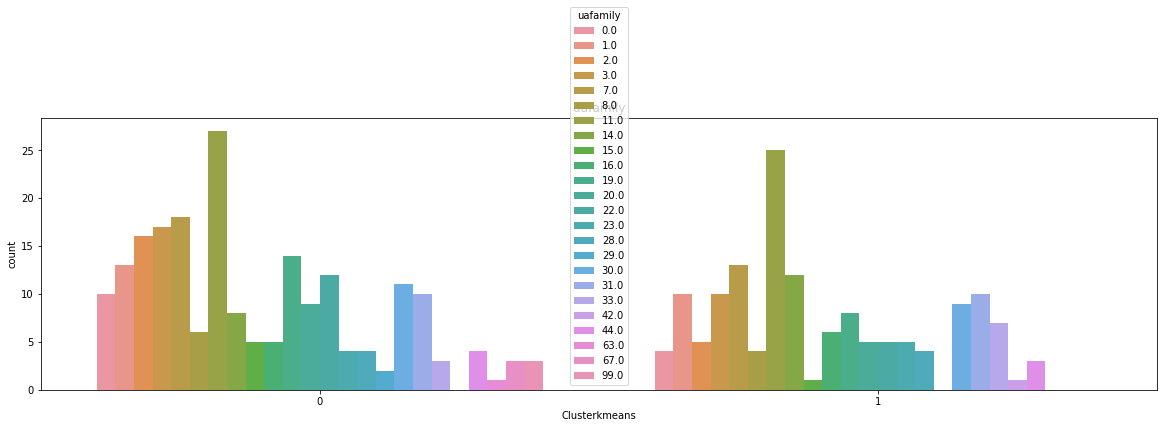

In [109]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="uafamily", data = l1)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.savefig('uafamilykmeanshost3.png', bbox_inches='tight')
plt.show()

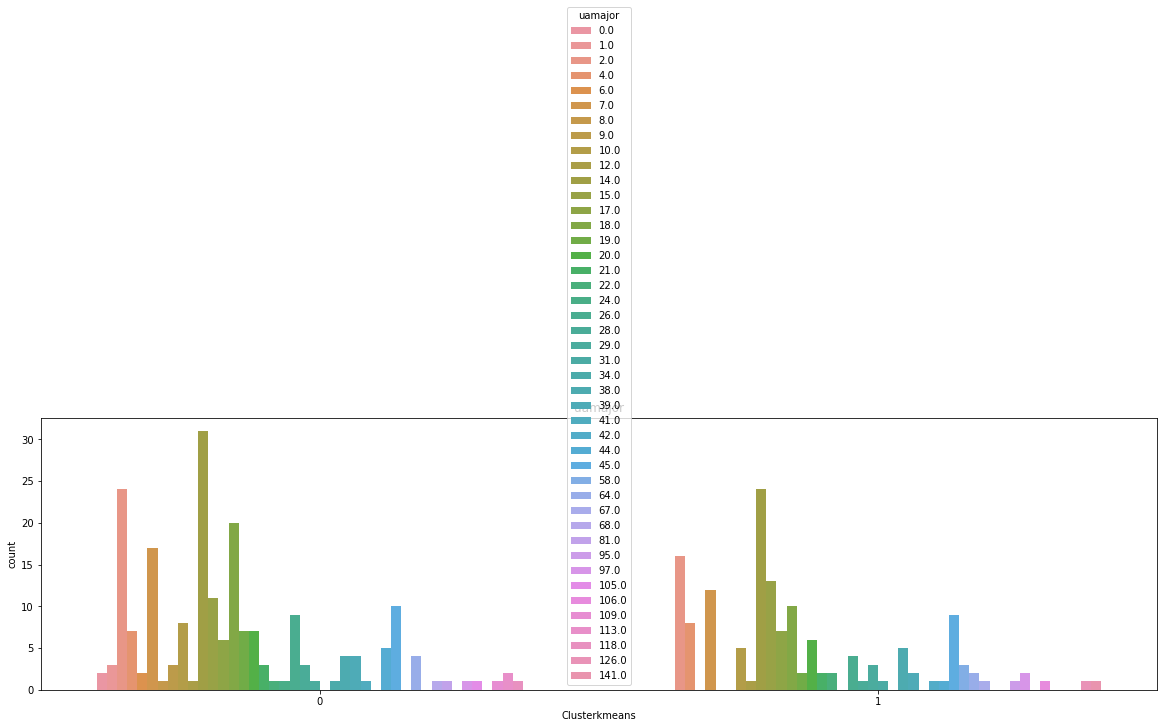

In [110]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Clusterkmeans',hue="uamajor", data = l1)
ax.set_title('uamajor')
ax.legend(loc='best', title="uamajor")
plt.savefig('uamajorkmeanshost3.png', bbox_inches='tight')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 1029.0


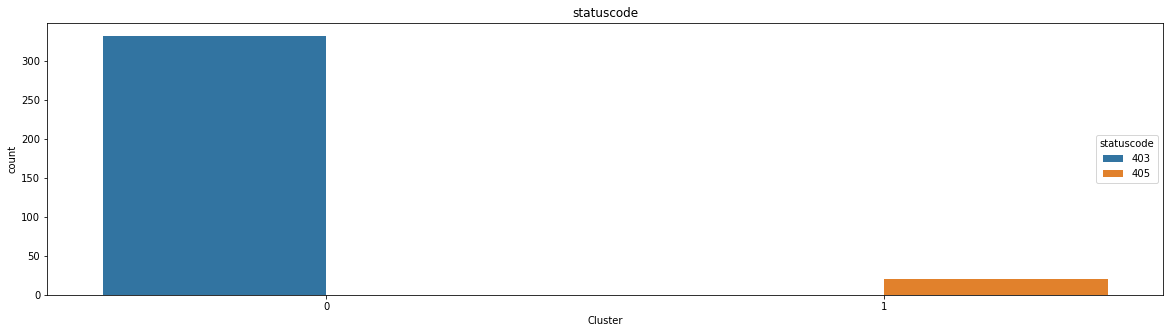

In [111]:
km = KModes(n_clusters=2, init = "Cao", verbose=1)
cluster_labels = km.fit_predict(l_1)
l1['Cluster'] = cluster_labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = l1)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('statuscodekmodeshost3.png', bbox_inches='tight')
plt.show()

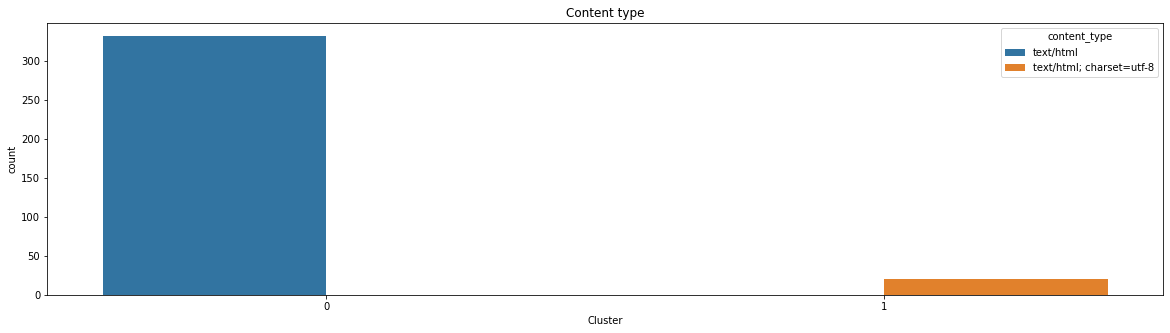

In [112]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = l1)
ax.set_title('Content type')
ax.legend(loc='best', title="content_type")
plt.savefig('contenttypekmodeshost3.png', bbox_inches='tight')
plt.show()

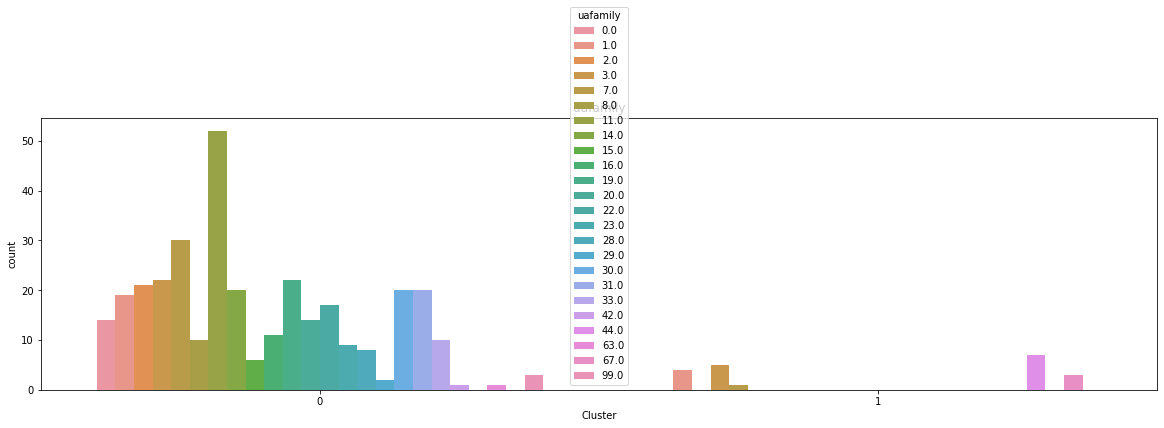

In [113]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = l1)
ax.set_title('uafamily')
ax.legend(loc='best', title="uafamily")
plt.savefig('uafamilykmodeshost3.png', bbox_inches='tight')
plt.show()

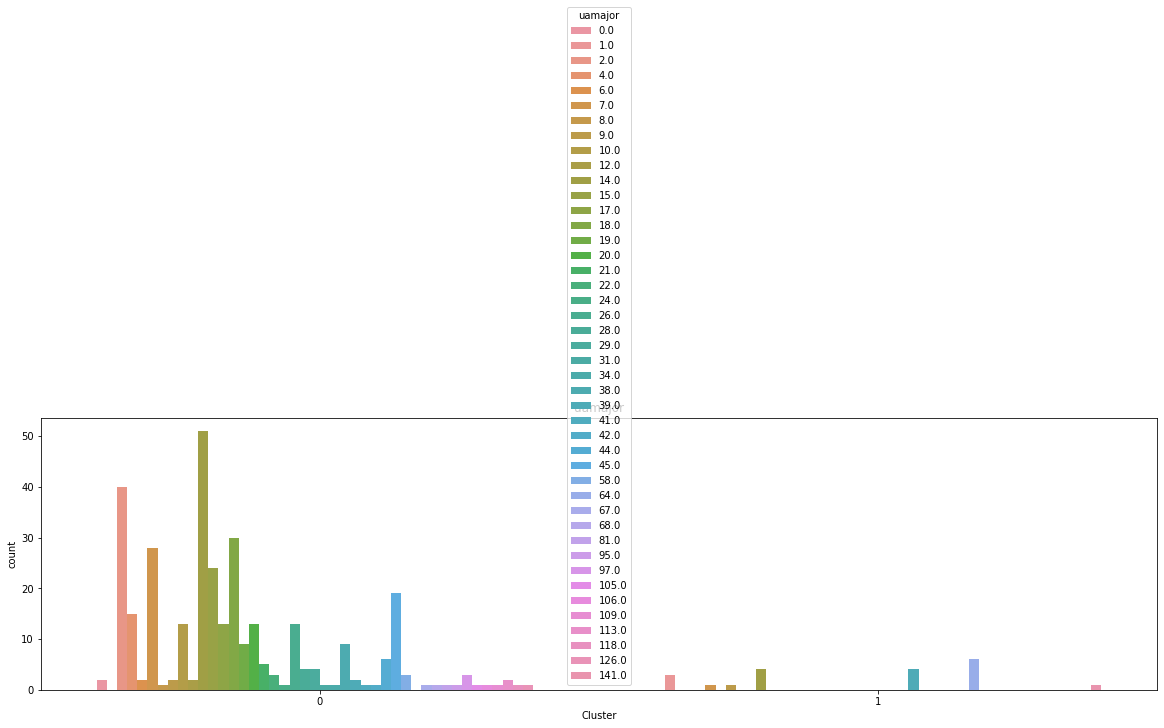

In [114]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uamajor", data = l1)
ax.set_title('uamajor')
ax.legend(loc='best', title="uamajor")
plt.savefig('uamajorkmodeshost3.png', bbox_inches='tight')
plt.show()

In [104]:
l2 = df_website.copy()

In [105]:
l2 = l2[l2['timeclass2'] == 1]

In [106]:
l2=l2.drop(labels=["timeclass2"],axis=1)

In [107]:
l2.drop_duplicates(subset=None, keep='first', inplace=True)

In [108]:
l2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 947 to 269061
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   93 non-null     int64  
 1   contenttype  93 non-null     object 
 2   uamajor      93 non-null     float64
 3   uafamily     93 non-null     float64
 4   hour2        93 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ KB


In [109]:
l_2 = pd.get_dummies(l2, columns = ['statuscode', 'contenttype', 'uafamily', 'uamajor', 'hour2'])
print(l_2)

        statuscode_403  statuscode_405  contenttype_text/html  \
947                  1               0                      1   
1118                 1               0                      1   
1218                 1               0                      1   
2017                 1               0                      1   
2101                 1               0                      1   
...                ...             ...                    ...   
208887               1               0                      1   
216755               0               1                      0   
224957               1               0                      1   
238147               1               0                      1   
269061               1               0                      1   

        contenttype_text/html; charset=utf-8  uafamily_0.0  uafamily_1.0  \
947                                        0             0             0   
1118                                       0             0         

For 2 clusters the average silhouette_score is : 0.251667374161065
For 3 clusters the average silhouette_score is : 0.06707172545798057
For 4 clusters the average silhouette_score is : 0.1055394451538573
For 5 clusters the average silhouette_score is : 0.1302961280500188


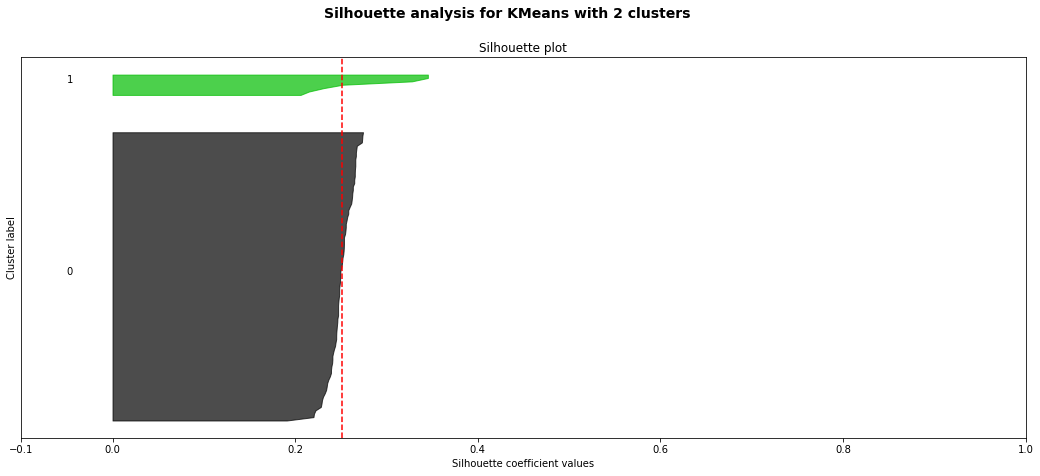

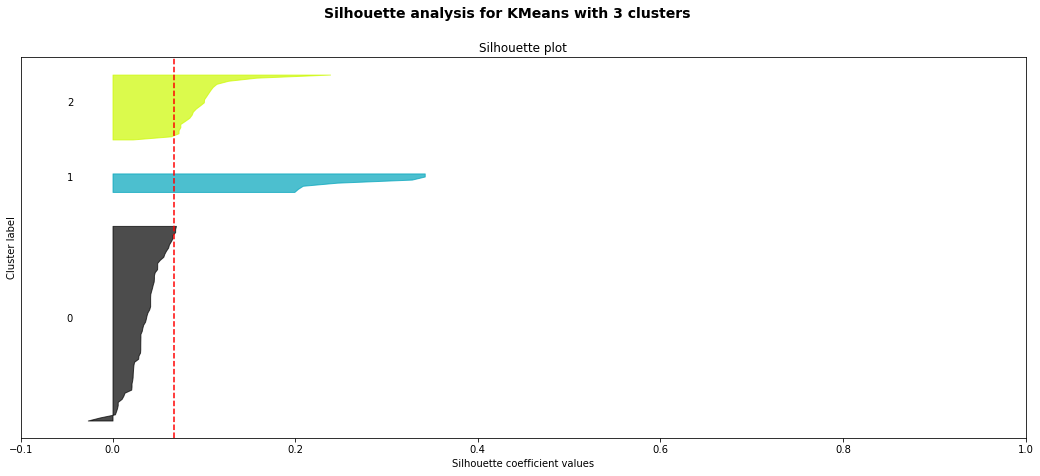

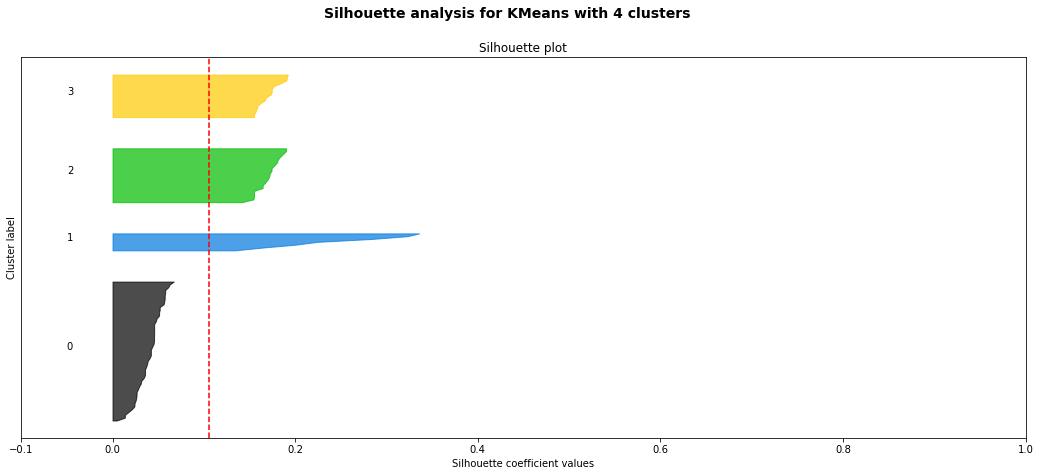

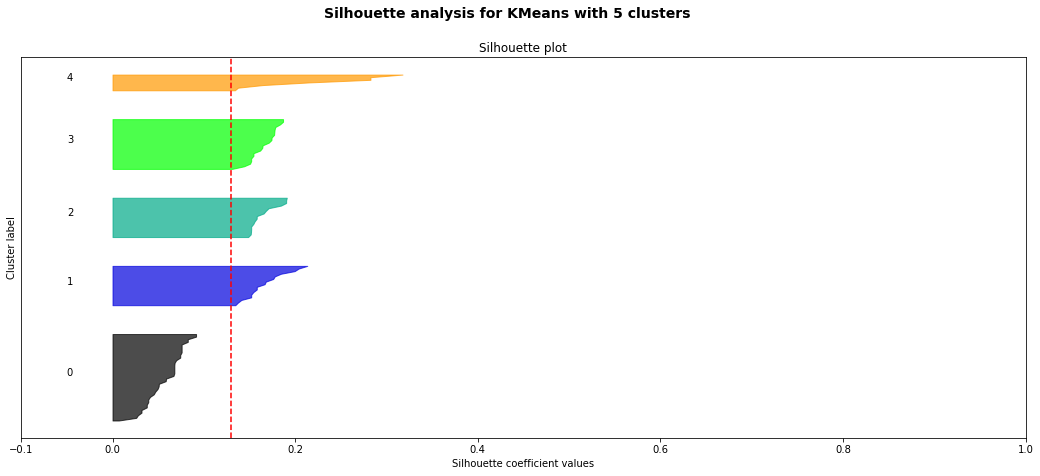

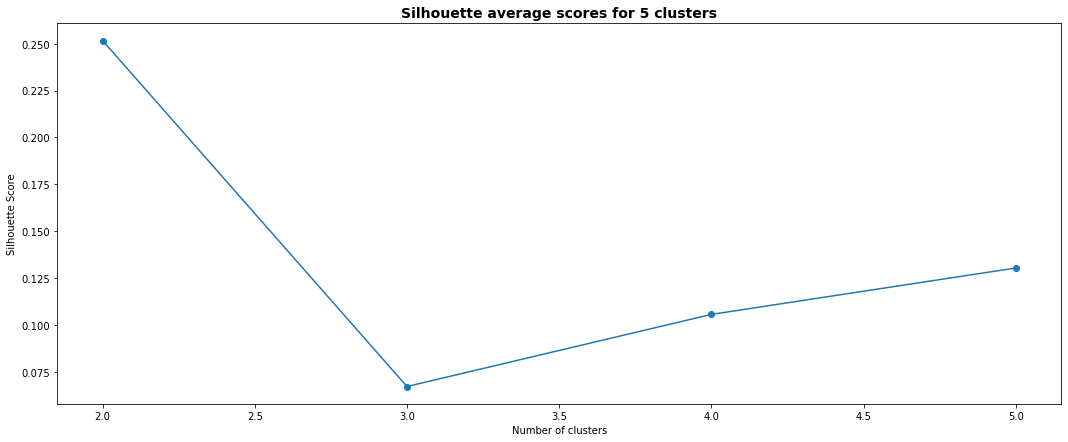

In [113]:
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 6
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(l_2)

    labels_pred = kmeans.predict(l_2)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(l_2, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(l_2, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

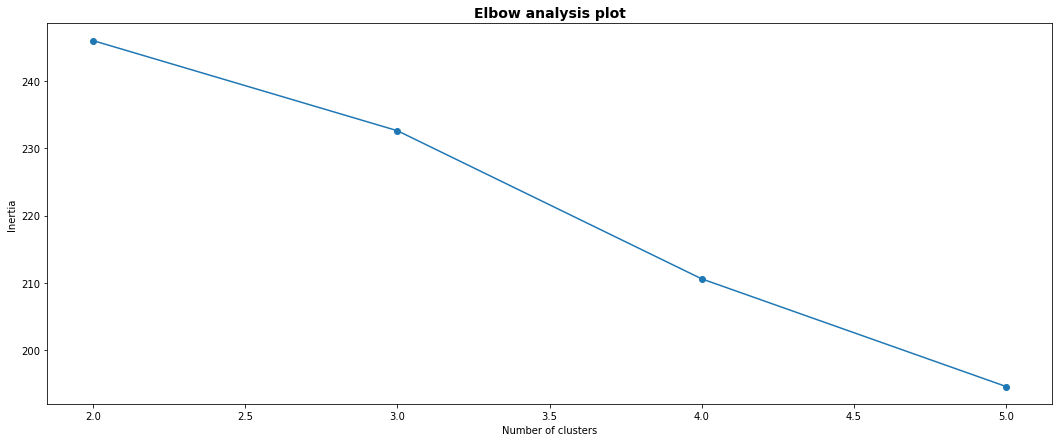

In [111]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [114]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(l_2)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 307.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 279.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 263.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18, cost: 247.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26, cost: 234.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 34, cost: 209.0
Run 1, iteration: 2/100, moves: 1, cost: 209.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35, cost: 201.0
Run 1, iteration: 2/100, moves: 0, cost: 201.0


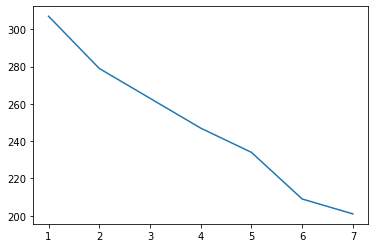

In [115]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [116]:
l3 = df_website.copy()

In [172]:
df_livetv_11 = df_livetv.copy()

In [173]:
df_livetv_11=df_livetv_11.drop(labels=["@timestamp"],axis=1)

In [1]:
df_livetv_11.head()

NameError: name 'df_livetv_11' is not defined

In [175]:
df_livetv_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   43670 non-null  int64  
 1   contenttype  42588 non-null  object 
 2   uafamily     38898 non-null  float64
 3   livechannel  16238 non-null  float64
 4   hour         43670 non-null  int64  
 5   minute       43670 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.3+ MB


In [176]:
df_livetv_11['uafamily']=df_livetv_11['uafamily'].fillna(df_livetv_11['uafamily'].mode()[0])
df_livetv_11['contenttype']=df_livetv_11['contenttype'].fillna(df_livetv_11['contenttype'].mode()[0])
df_livetv_11['livechannel']=df_livetv_11['livechannel'].fillna(df_livetv_11['livechannel'].mode()[0])

In [177]:
df_livetv_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43670 entries, 70 to 286974
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   43670 non-null  int64  
 1   contenttype  43670 non-null  object 
 2   uafamily     43670 non-null  float64
 3   livechannel  43670 non-null  float64
 4   hour         43670 non-null  int64  
 5   minute       43670 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.3+ MB


In [178]:
df_livetv_11.drop_duplicates(subset=None, keep='first', inplace=True)

In [179]:
df_livetv_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2691 entries, 70 to 286700
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   2691 non-null   int64  
 1   contenttype  2691 non-null   object 
 2   uafamily     2691 non-null   float64
 3   livechannel  2691 non-null   float64
 4   hour         2691 non-null   int64  
 5   minute       2691 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 147.2+ KB


In [150]:
df_livetv_11.uafamily.value_counts().sort_values()

3.0         2
23.0        2
1.0        13
12.0    38881
Name: uafamily, dtype: int64

In [157]:
df_livetv_11.contenttype.value_counts().sort_values()

text/html                   16065
text/html; charset=utf-8    27605
Name: contenttype, dtype: int64

In [159]:
df_livetv_11.livechannel.value_counts().sort_values()

86.0        7
59.0       26
57.0       78
58.0      129
82.0      169
68.0      843
60.0    14986
68.0    27432
Name: livechannel, dtype: int64

In [156]:
df_livetv_11['contenttype'].fillna("text/html", inplace = True)

In [158]:
df_livetv_11['livechannel'].fillna("68.0", inplace = True)

In [160]:
df_livetv_11['uafamily']=df_livetv_11['uafamily'].fillna(df_livetv_11['uafamily'].mode()[0])

In [180]:
mop = df_livetv_11.copy()

In [191]:
mop_1 = pd.get_dummies(mop, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel'])
print(mop_1)

        hour  minute  statuscode_400  statuscode_403  statuscode_404  \
70         7      18               1               0               0   
73         7      25               1               0               0   
74         7      54               1               0               0   
75         8      27               1               0               0   
79        16      42               0               0               0   
...      ...     ...             ...             ...             ...   
284282    14       5               0               0               0   
284502    17      57               0               0               1   
285532    19      23               0               0               0   
286400     1      15               0               0               0   
286700    14      45               0               0               0   

        statuscode_412  statuscode_503  contenttype_text/html  \
70                   0               0                      0   
73   

For 2 clusters the average silhouette_score is : 0.5174109618942708
For 3 clusters the average silhouette_score is : 0.4178255689648078
For 4 clusters the average silhouette_score is : 0.3390467781748507
For 5 clusters the average silhouette_score is : 0.3475301172923673


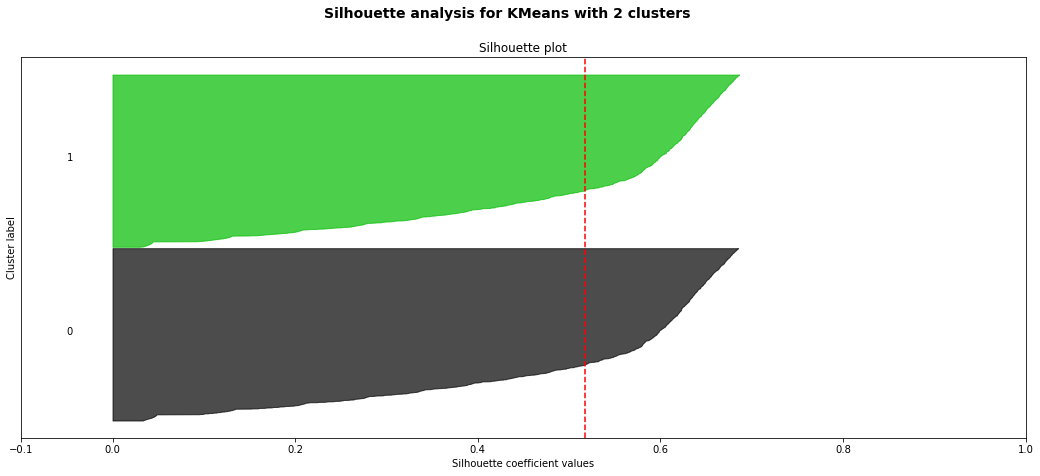

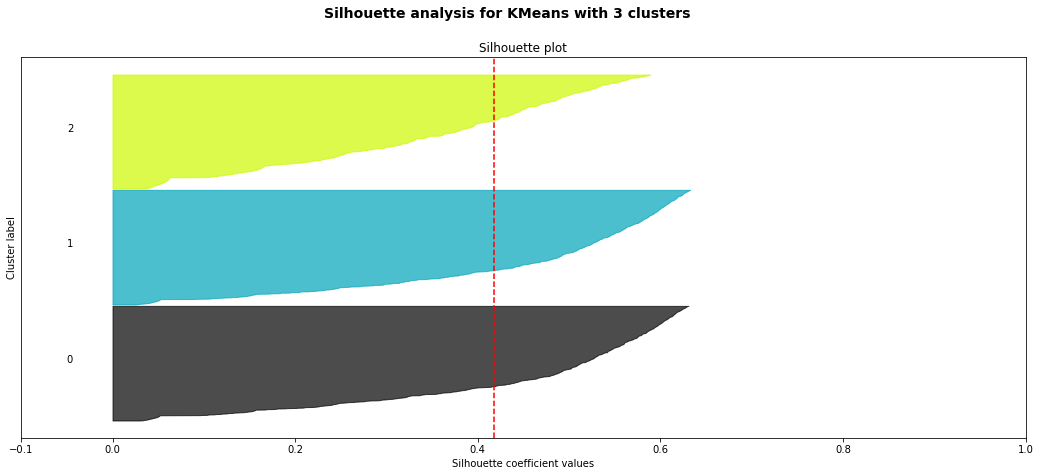

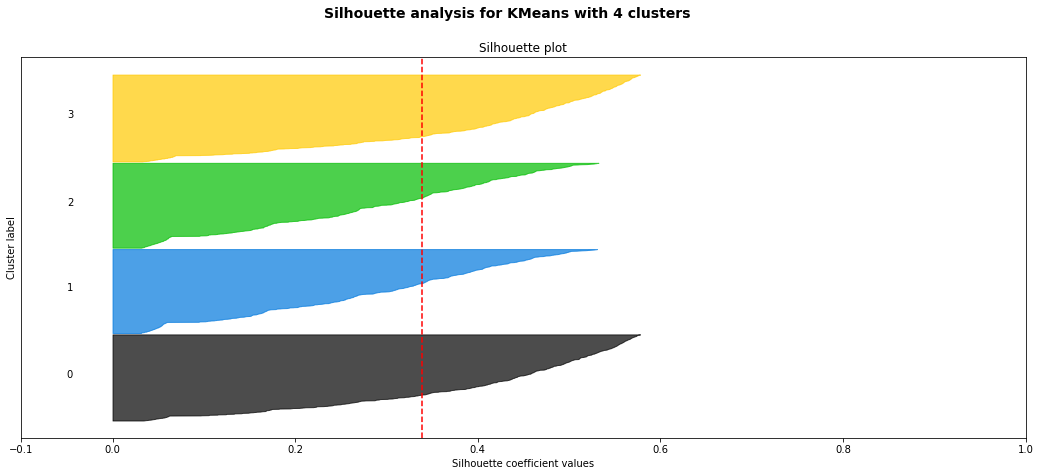

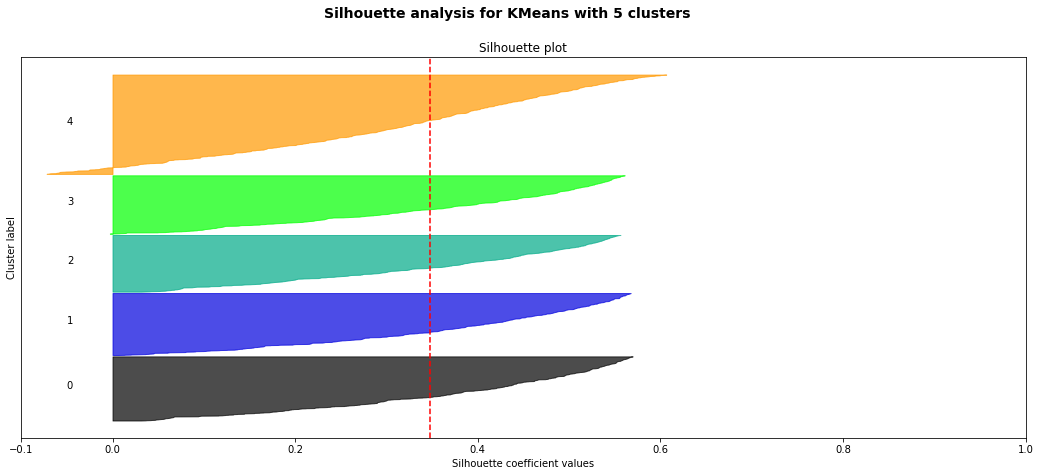

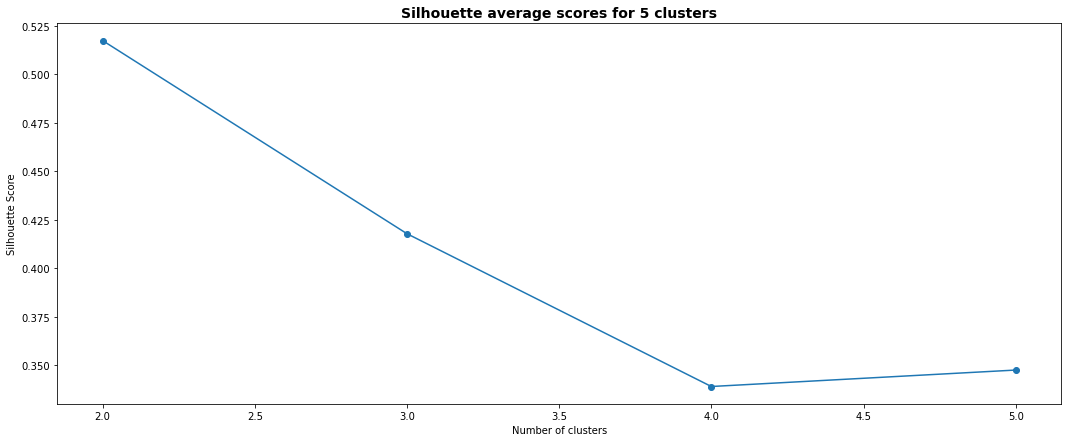

In [192]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(mop_1)

    labels_pred = kmeans.predict(mop_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(mop_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(mop_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

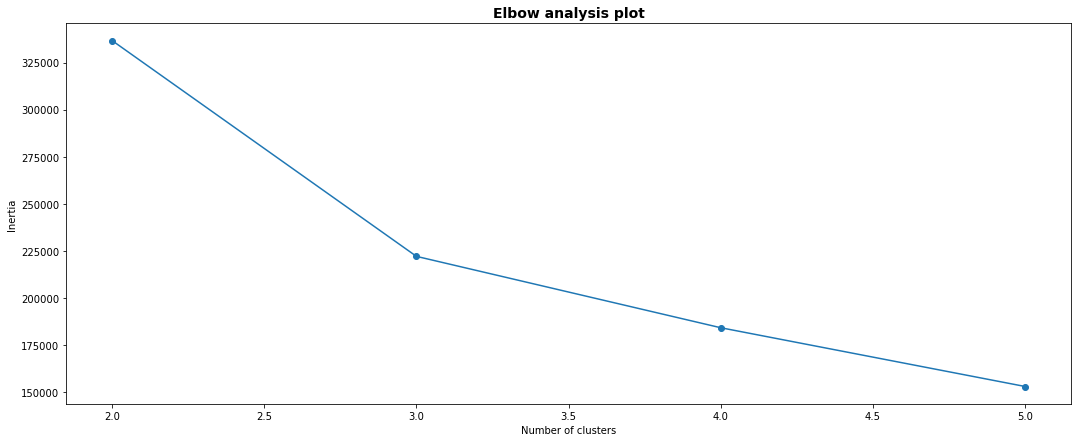

In [193]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [194]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(mop_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10294.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5559.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 5331.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 5323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5295.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5287.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5258.0


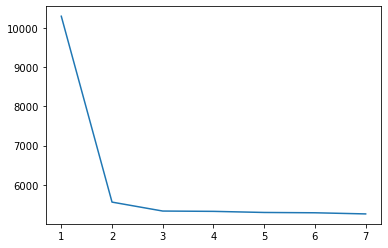

In [195]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [20]:
lpp = df_livetv.copy()

In [21]:
lpp.head()

,statuscode,contenttype,uafamily,@timestamp,livechannel,hour
70,400,text/html; charset=utf-8,12.0,2088-05-13T07:18:16.000Z,NaN,7
73,400,text/html; charset=utf-8,12.0,2088-05-13T07:25:04.000Z,NaN,7
74,400,text/html; charset=utf-8,12.0,2088-05-13T07:54:31.000Z,NaN,7
75,400,text/html; charset=utf-8,12.0,2088-05-13T08:27:31.000Z,NaN,8
79,412,text/html,12.0,2088-05-13T16:42:10.000Z,60.0,16


In [22]:
lpp=lpp.drop(labels=["@timestamp"],axis=1)

In [23]:
lpp['uafamily']=lpp['uafamily'].fillna(lpp['uafamily'].mode()[0])
lpp['contenttype']=lpp['contenttype'].fillna(lpp['contenttype'].mode()[0])
lpp['livechannel']=lpp['livechannel'].fillna(lpp['livechannel'].mode()[0])

In [24]:
lpp.drop_duplicates(subset=None, keep='first', inplace=True)

In [25]:
lpp_1 = pd.get_dummies(lpp, columns = ['statuscode', 'contenttype', 'uafamily', 'livechannel', 'hour'])
print(lpp_1)

        statuscode_400  statuscode_403  statuscode_404  statuscode_412  \
70                   1               0               0               0   
75                   1               0               0               0   
79                   0               0               0               1   
82                   1               0               0               0   
85                   0               0               1               0   
...                ...             ...             ...             ...   
248648               0               0               1               0   
250429               0               0               0               0   
277570               0               0               1               0   
281453               0               0               1               0   
283104               0               0               1               0   

        statuscode_503  contenttype_text/html  \
70                   0                      0   
75           

For 2 clusters the average silhouette_score is : 0.23747963981348202
For 3 clusters the average silhouette_score is : 0.3139034489292564
For 4 clusters the average silhouette_score is : 0.2661142907946412
For 5 clusters the average silhouette_score is : 0.22814338407619705


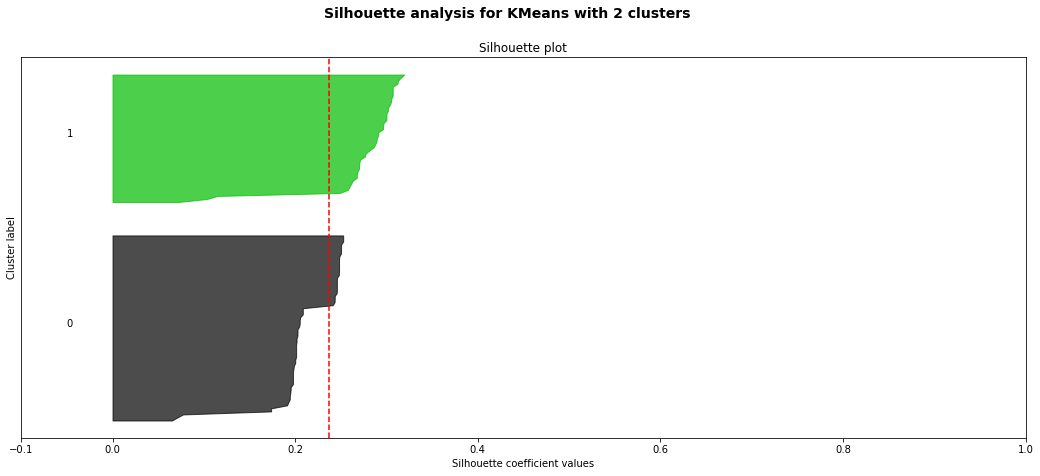

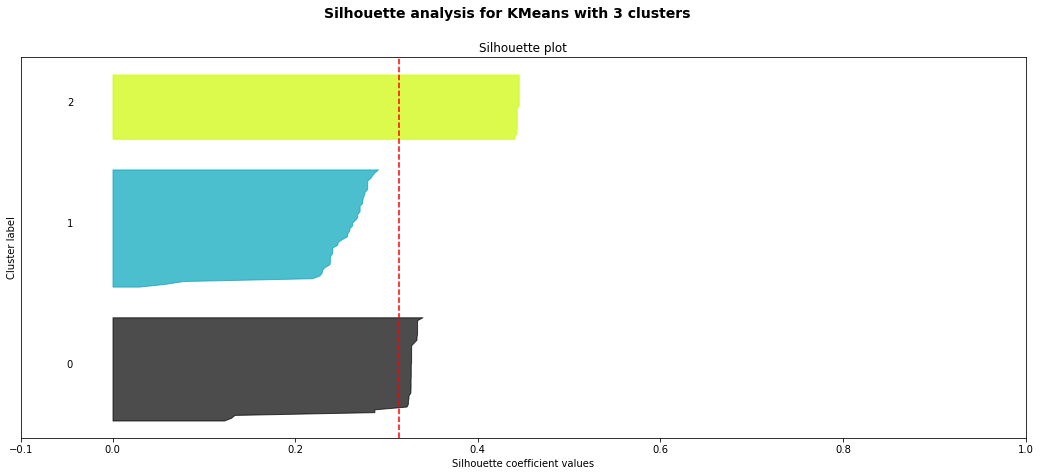

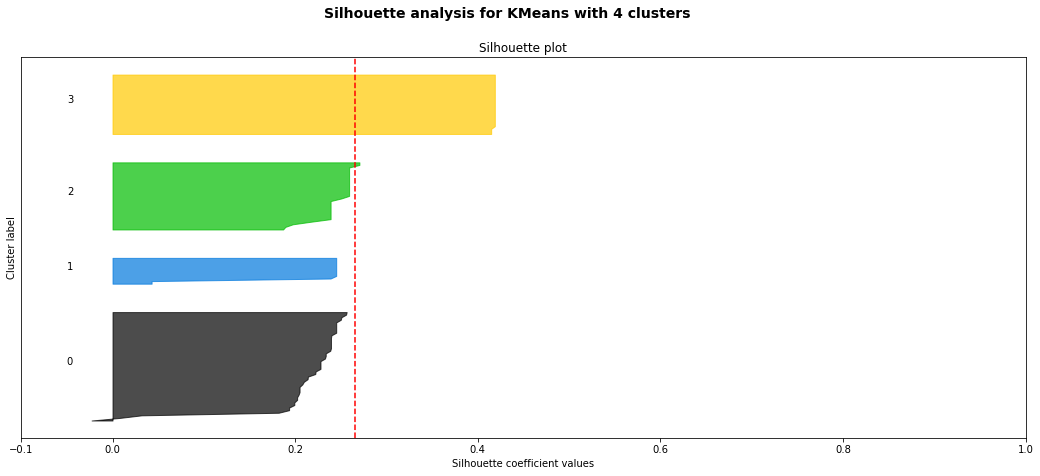

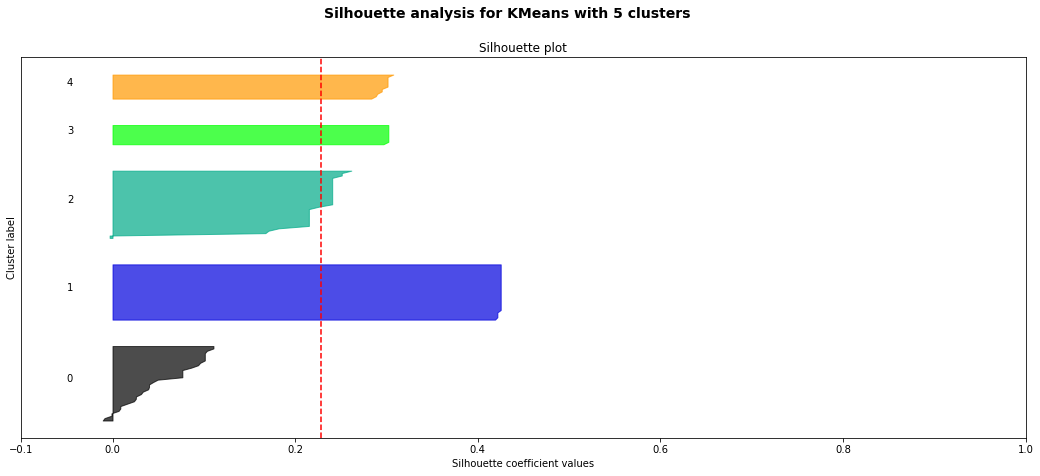

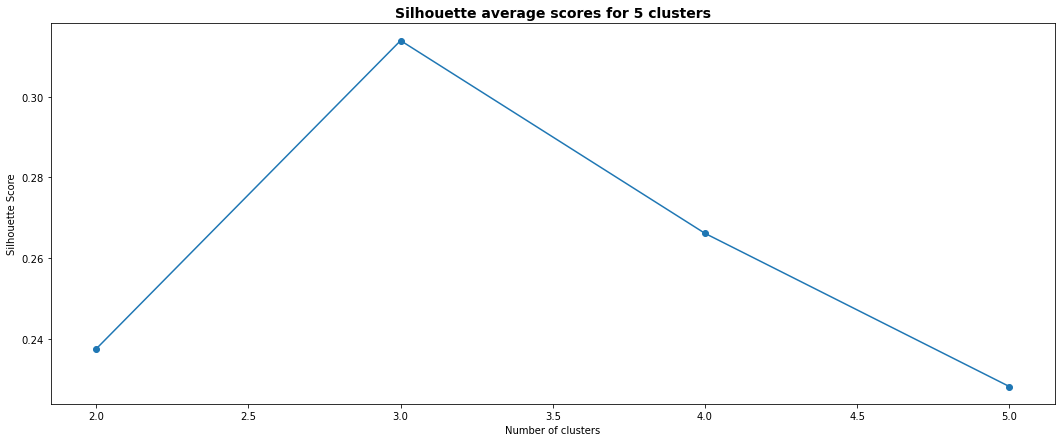

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(lpp_1)

    labels_pred = kmeans.predict(lpp_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(lpp_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(lpp_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

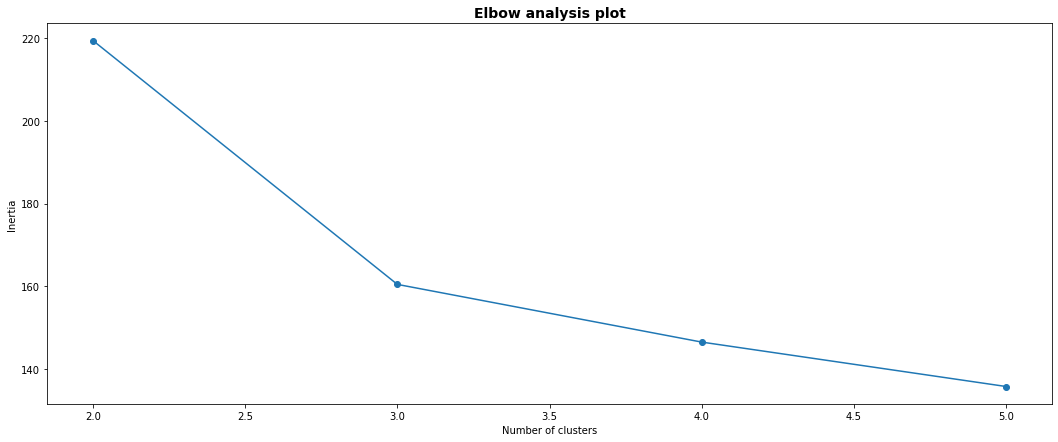

In [27]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [29]:
from kmodes.kmodes import KModes
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(lpp_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 366.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 278.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 182.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 171.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 150.0


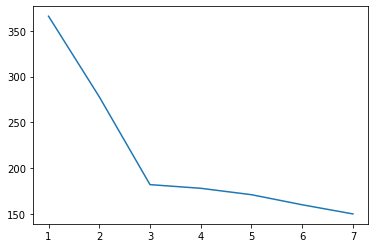

In [30]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [43]:
df_filecaching.head()

,statuscode,contenttype,uafamily,method,hour
2,404,application/octet-stream,21.0,GET,9
5,404,application/octet-stream,21.0,GET,10
9,404,application/octet-stream,21.0,GET,16
72,404,application/octet-stream,21.0,GET,8
201,404,application/octet-stream,21.0,GET,21


In [44]:
mpp = df_filecaching.copy()

In [45]:
mpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8978 entries, 2 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   8978 non-null   int64  
 1   contenttype  8978 non-null   object 
 2   uafamily     8978 non-null   float64
 3   method       8978 non-null   object 
 4   hour         8978 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 420.8+ KB


In [46]:
mpp.drop_duplicates(subset=None, keep='first', inplace=True)

In [47]:
mpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 202563
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   58 non-null     int64  
 1   contenttype  58 non-null     object 
 2   uafamily     58 non-null     float64
 3   method       58 non-null     object 
 4   hour         58 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ KB


In [49]:
mpp_1 = pd.get_dummies(mpp, columns = ['statuscode', 'contenttype', 'uafamily', 'method', 'hour'])
print(mpp_1)

        statuscode_401  statuscode_403  statuscode_404  statuscode_405  \
2                    0               0               1               0   
5                    0               0               1               0   
9                    0               0               1               0   
72                   0               0               1               0   
201                  0               0               1               0   
407                  0               0               1               0   
458                  0               0               1               0   
546                  0               0               1               0   
550                  0               0               1               0   
576                  0               0               1               0   
613                  0               0               1               0   
621                  0               0               1               0   
720                  0               0

For 2 clusters the average silhouette_score is : 0.3342541464266385
For 3 clusters the average silhouette_score is : 0.38876226265883657
For 4 clusters the average silhouette_score is : 0.3273086845129907
For 5 clusters the average silhouette_score is : 0.3058282808676793


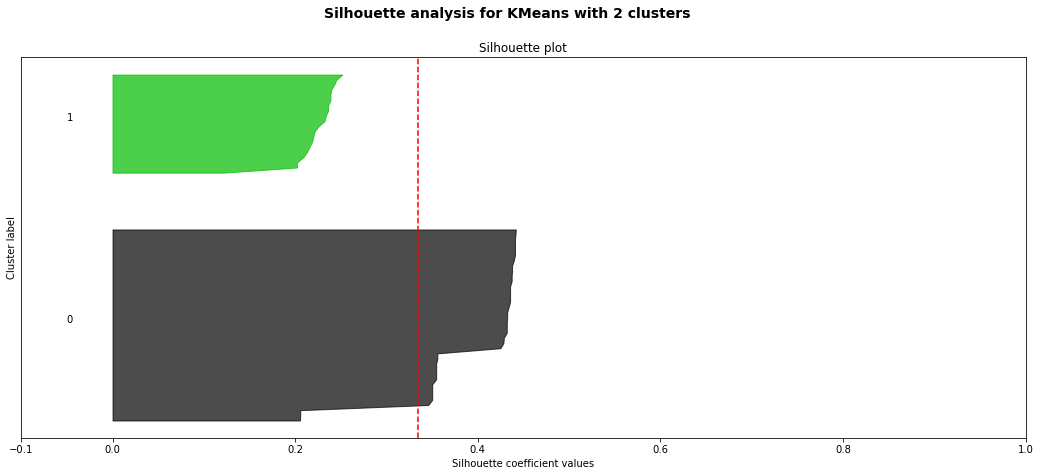

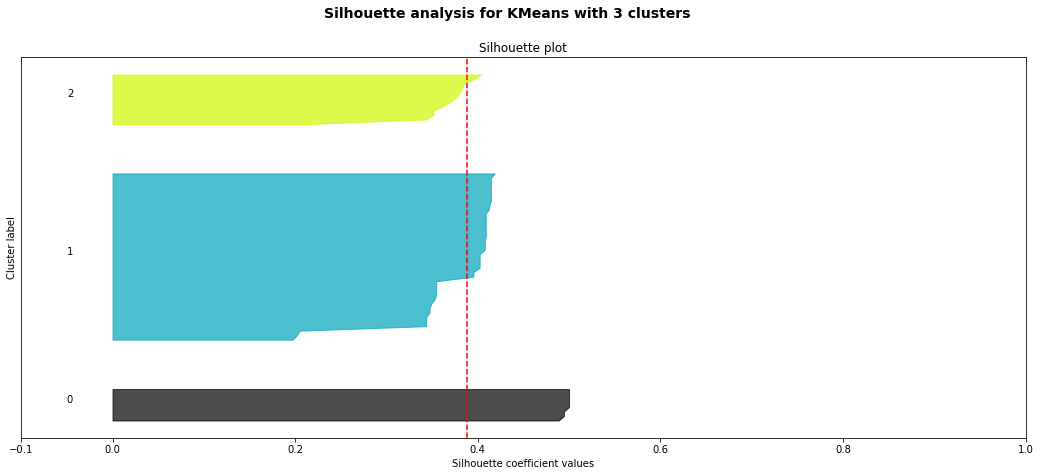

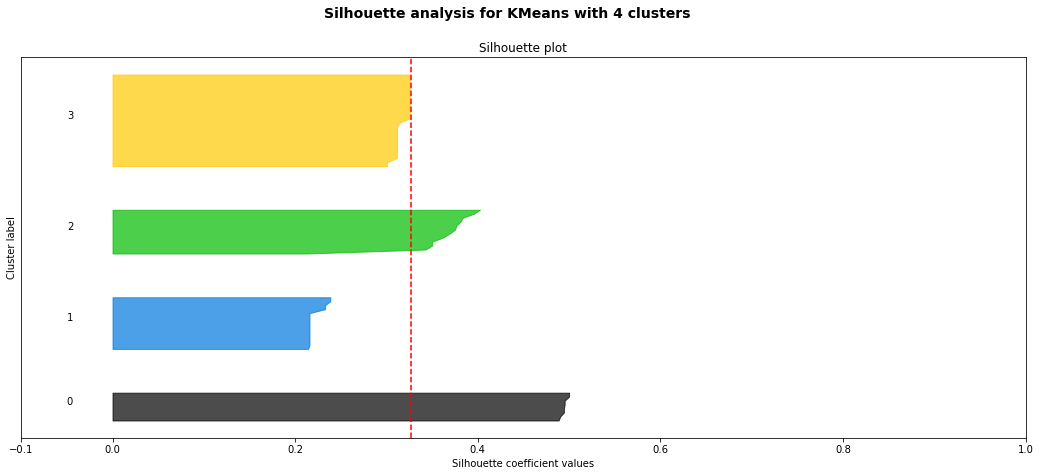

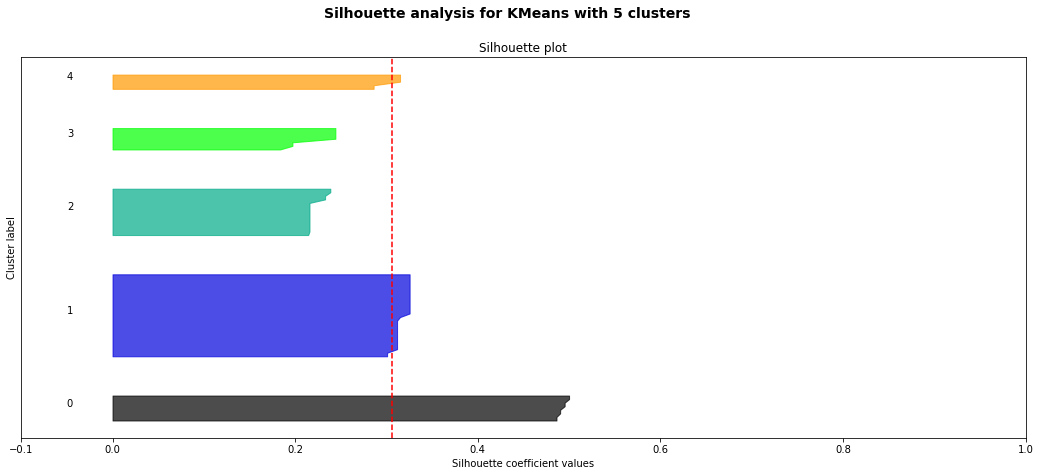

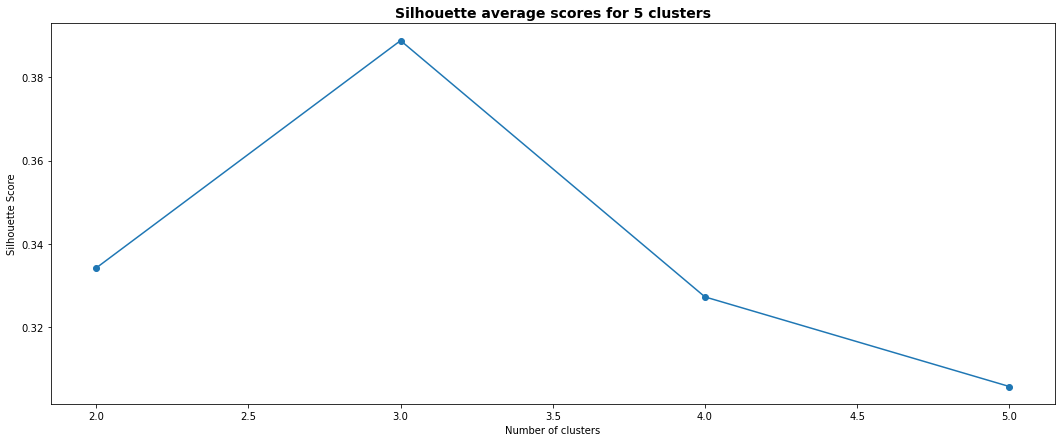

In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(mpp_1)

    labels_pred = kmeans.predict(mpp_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(mpp_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(mpp_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

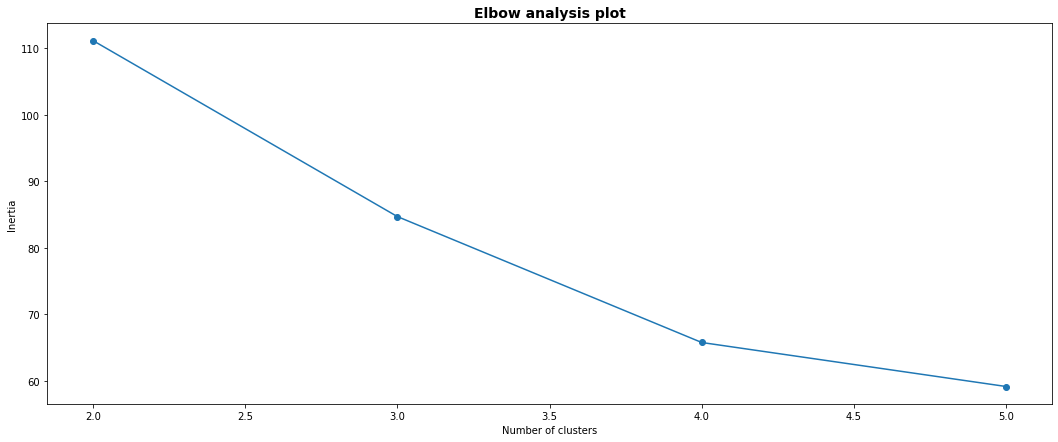

In [51]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [52]:
from kmodes.kmodes import KModes
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(mpp_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 162.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 92.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 70.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 60.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 57.0


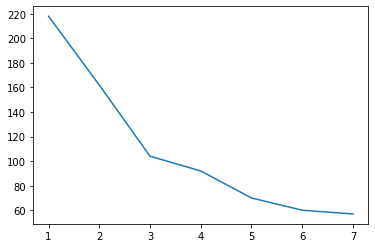

In [53]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [64]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 76 to 286567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1160 non-null   int64  
 1   contenttype  1160 non-null   object 
 2   uamajor      1001 non-null   float64
 3   uafamily     1160 non-null   float64
 4   hour         1160 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 54.4+ KB


In [65]:
npp = df_website.copy()

In [66]:
npp['uamajor']=npp['uamajor'].fillna(npp['uamajor'].mode()[0])

In [67]:
npp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 76 to 286567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1160 non-null   int64  
 1   contenttype  1160 non-null   object 
 2   uamajor      1160 non-null   float64
 3   uafamily     1160 non-null   float64
 4   hour         1160 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 54.4+ KB


In [68]:
npp.drop_duplicates(subset=None, keep='first', inplace=True)

In [69]:
npp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 76 to 284303
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   340 non-null    int64  
 1   contenttype  340 non-null    object 
 2   uamajor      340 non-null    float64
 3   uafamily     340 non-null    float64
 4   hour         340 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.9+ KB


In [70]:
npp_1 = pd.get_dummies(npp, columns = ['statuscode', 'contenttype', 'uamajor', 'uafamily', 'hour'])
print(npp_1)

        statuscode_403  statuscode_405  contenttype_text/html  \
76                   1               0                      1   
623                  1               0                      1   
730                  1               0                      1   
743                  1               0                      1   
757                  1               0                      1   
...                ...             ...                    ...   
277881               1               0                      1   
278741               1               0                      1   
278847               1               0                      1   
279014               1               0                      1   
284303               1               0                      1   

        contenttype_text/html; charset=utf-8  uamajor_0.0  uamajor_1.0  \
76                                         0            0            0   
623                                        0            0            0 

For 2 clusters the average silhouette_score is : 0.24471935782109816
For 3 clusters the average silhouette_score is : 0.06580919168783946
For 4 clusters the average silhouette_score is : 0.09699212560655558
For 5 clusters the average silhouette_score is : 0.11934445084841318


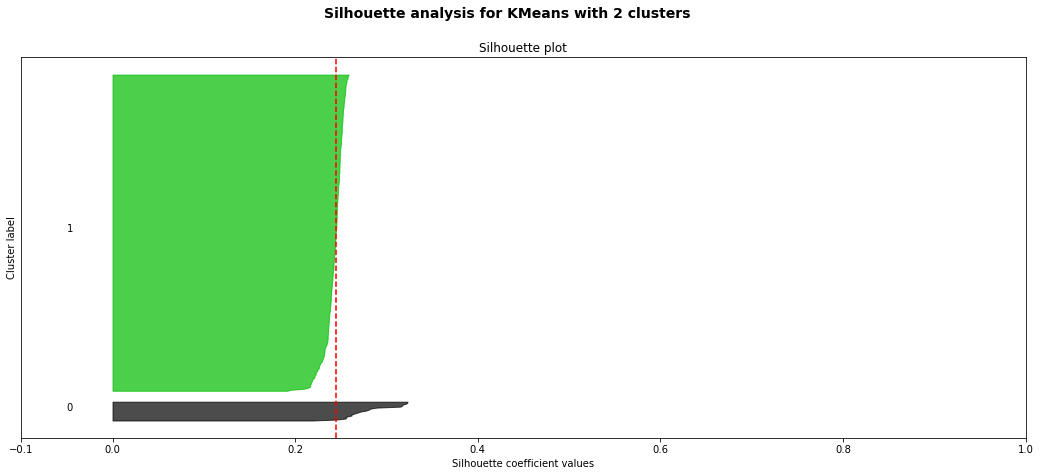

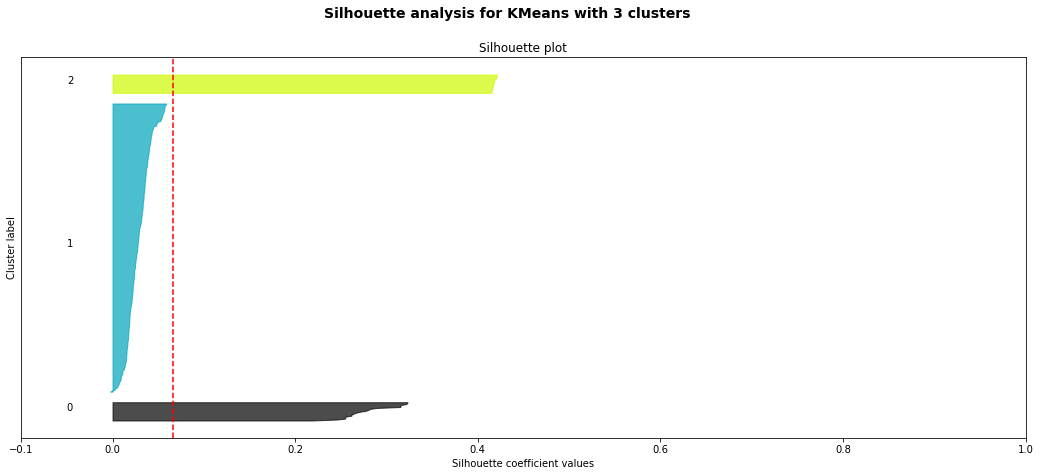

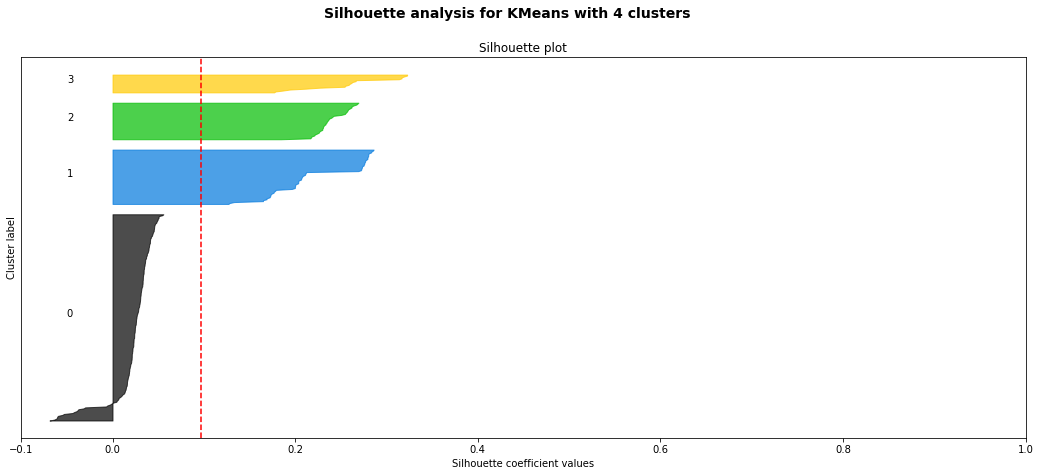

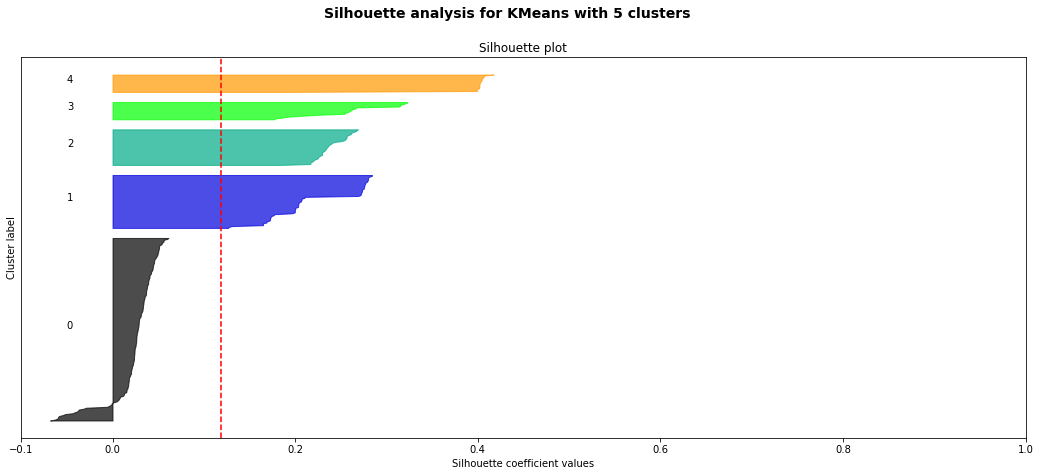

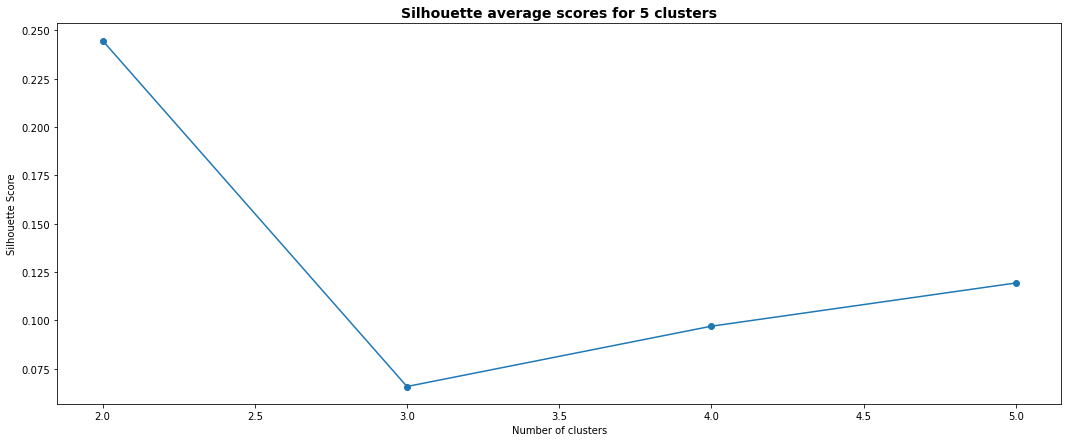

In [71]:
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 9
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(npp_1)

    labels_pred = kmeans.predict(npp_1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(npp_1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(npp_1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

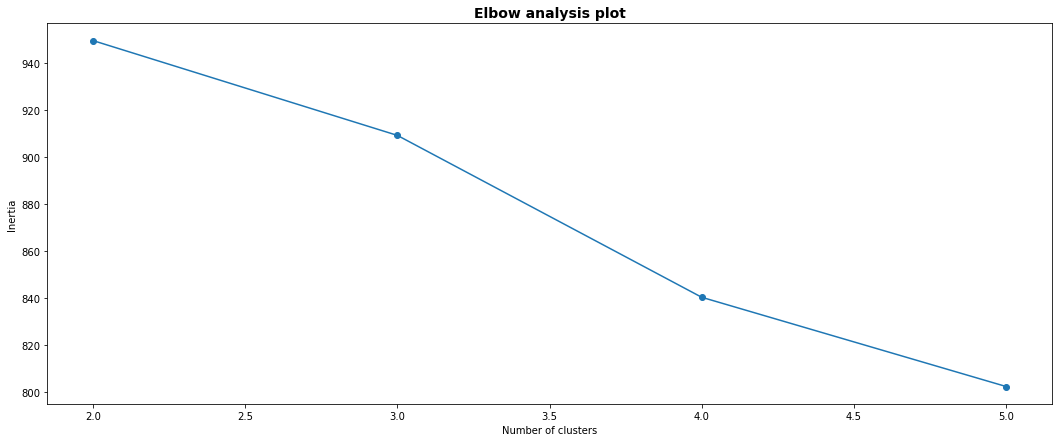

In [72]:
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, SSE, marker='o')
plt.title('Elbow analysis plot', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Inertia')
plt.show()

In [73]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(npp_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1100.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 1020.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 59, cost: 950.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 77, cost: 918.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 84, cost: 878.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 88, cost: 840.0


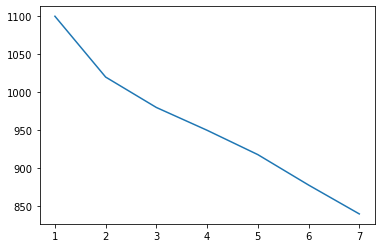

In [74]:
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)